## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market.

It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 The company wants to know:

    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.

 Also, determine the optimal value of lambda for ridge and lasso regression.

 <b> Business Goal </b>

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

## 1. Module Import, Data Read and Function Declarations

In [1]:
import numpy as np
import pandas as pd
import warnings as wrn


import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from seaborn import countplot
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import sklearn.metrics as met
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt


from sklearn.preprocessing import StandardScaler

wrn.filterwarnings('ignore')

In [2]:
## Read the csv file | Start ##
df=pd.read_csv('train.csv',sep=',',encoding='ISO-8859-1')
## Read the csv file | End ##

### Functions bay

In [3]:
## ***** Function to define the creation of boxplots ***** | Start ## 
def plotbox(col,n):
    sns.set(style="darkgrid")
    sns.set_context('talk')
    sns.set(font_scale=3)
    plt.figure(figsize=(35,10))
    #plt.subplot(18,2,n)
    sns.boxplot(x=col,data=df_viz,palette=("viridis"))
    plt.title('Figure ' + str(n) +' -  '+ col)
    plt.show()
## ***** Function to define the creation of boxplots ***** | End ##        

## Get the percentage of Nulls | Start
def getNullperc(df):
    perdf = (df.isna().sum()/len(df)*100).to_frame()[0].sort_values(ascending=False).rename(columns={0:'Percentage'})
    return perdf
## Get the percentage of Nulls | End

## Sales Price Binning | Start
def salesBinning(x):
    if(x<129975):
        return 'Low'
    elif(x>=129975 and x<=214000):
        return 'Normal'
    else:
        return 'High'
## Sales Price Binning | End

## Plotting bar | Start
def plotbar(col,lx,ly,title):
    plt.figure(figsize=(20,10))
    ax = (col).plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel(ly, fontsize=16)
    ax.set_xlabel(lx, fontsize=16)
    plt.title(title)
    x_offset = -0.10
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:+.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.show()
## Plotting bar | Start

## Remodelling status function | Start
def remod(YrBlt,YrRemod):
    if(YrBlt - YrRemod == 0):
        return 'No'
    else:
        return 'Yes'
## Remodelling status function | End  


## **** Function for the model ***** | Start 
def modelFit(X_train,lm,y_train):
    X_train=sm.add_constant(X_train)
    lm=sm.OLS(y_train,X_train).fit()
    print(lm.summary())
    
## **** Function for the model ***** | End 

## **** Function for getting the VIF ***** | Start 
def getVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
## **** Function for getting the VIF ***** | End

## 2. Data Cleaning and Preparation

In [4]:
## Check the data from the imported file | Start ##
df.head()
## Check the data from the imported file | End ##

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
## Check the shape of the dataset | Start
df.shape
## Check the shape of the dataset | End

(1460, 81)

In [6]:
## Check the dataset based on the columns | Start 
df.info()
## Check the dataset based on the columns | End 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
## Check the Nulls in the dataset | Start
getNullperc(df)
## Check the Nulls in the dataset | End

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

<b>  There are few columns which have high percentage of Nulls in the dataset. <br> </b>
    <ul>
    <li><b> PoolQC </b> - 100%</li>
        <li><b> MiscFeature </b> - 96%</li>
        <li><b> Alley </b> - 94%</li>
        <li><b> Fence </b> - 81%</li>
        <li><b> FireplaceQu </b> - 47%</li>
    </ul>
    <br>
    As these columns have such high percentage of Nulls <b> we can proceed to delete </b> them from dataset

In [8]:
## Drop the columns with high percentage of Nulls | Start
df_clean = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
## Drop the columns with high percentage of Nulls | End

In [9]:
## Check the percentage Nulls in the dataset | Start
getNullperc(df_clean)
## Check the percentage Nulls in the dataset | End

LotFrontage      17.739726
GarageFinish      5.547945
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
RoofStyle         0.000000
RoofMatl          0.000000
SalePrice         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
BldgType          0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
Condition2        0.000000
Condition1        0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

<b>We will handle the Nulls for the below columns <br>
1. LotFrontage      18.0 <br>
2. GarageType        6.0 <br>
3. GarageFinish      6.0 <br>
4. GarageCond        6.0 <br>
5. GarageQual        6.0 <br>
6. BsmtFinType2      3.0 <br>
7. BsmtExposure      3.0 <br>
8. BsmtCond          3.0 <br>
9. BsmtQual          3.0 <br>
10.BsmtFinType1      3.0 <br>
11.MasVnrArea        1.0 <br>
12.MasVnrType        1.0
</b>

In [10]:
colList = ['LotFrontage','GarageType','GarageFinish','GarageCond','GarageQual','BsmtFinType2',
          'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1','MasVnrArea','MasVnrType','Electrical']
for col in colList:
    if (df_clean[col].dtype == 'int64' or df_clean[col].dtype == 'float64'):
        colMean = df_clean[col].mean()
        df_clean[col] = df_clean[col].fillna(colMean)
    else:
        colUD = 'Not Defined'
        df_clean[col] = df_clean[col].fillna(colUD)


In [11]:
## Check the percentage Nulls in the dataset | Start
getNullperc(df_clean)
## Check the percentage Nulls in the dataset | End

GarageYrBlt      5.547945
ExterQual        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
SalePrice        0.000000
YearBuilt        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
ExterCond        0.000000
OverallCond      0.000000
BsmtUnfSF        0.000000
OverallQual      0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
                   ...   
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold      

<b> <center>So we have removed the Nulls in all the columns except one column which we will handle later in the code.</center></b>

In [12]:
## Get the value counts of the columns | Start 
for cols in df_clean.columns:
    if df_clean[cols].dtype == 'object':
        print("Column Name:" +cols+"\n")
        print(df_clean[cols].value_counts())
## Get the value counts of the columns | End 

Column Name:MSZoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Column Name:Street

Pave    1454
Grvl       6
Name: Street, dtype: int64
Column Name:LotShape

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Column Name:LandContour

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Column Name:Utilities

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Column Name:LotConfig

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Column Name:LandSlope

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Column Name:Neighborhood

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU     

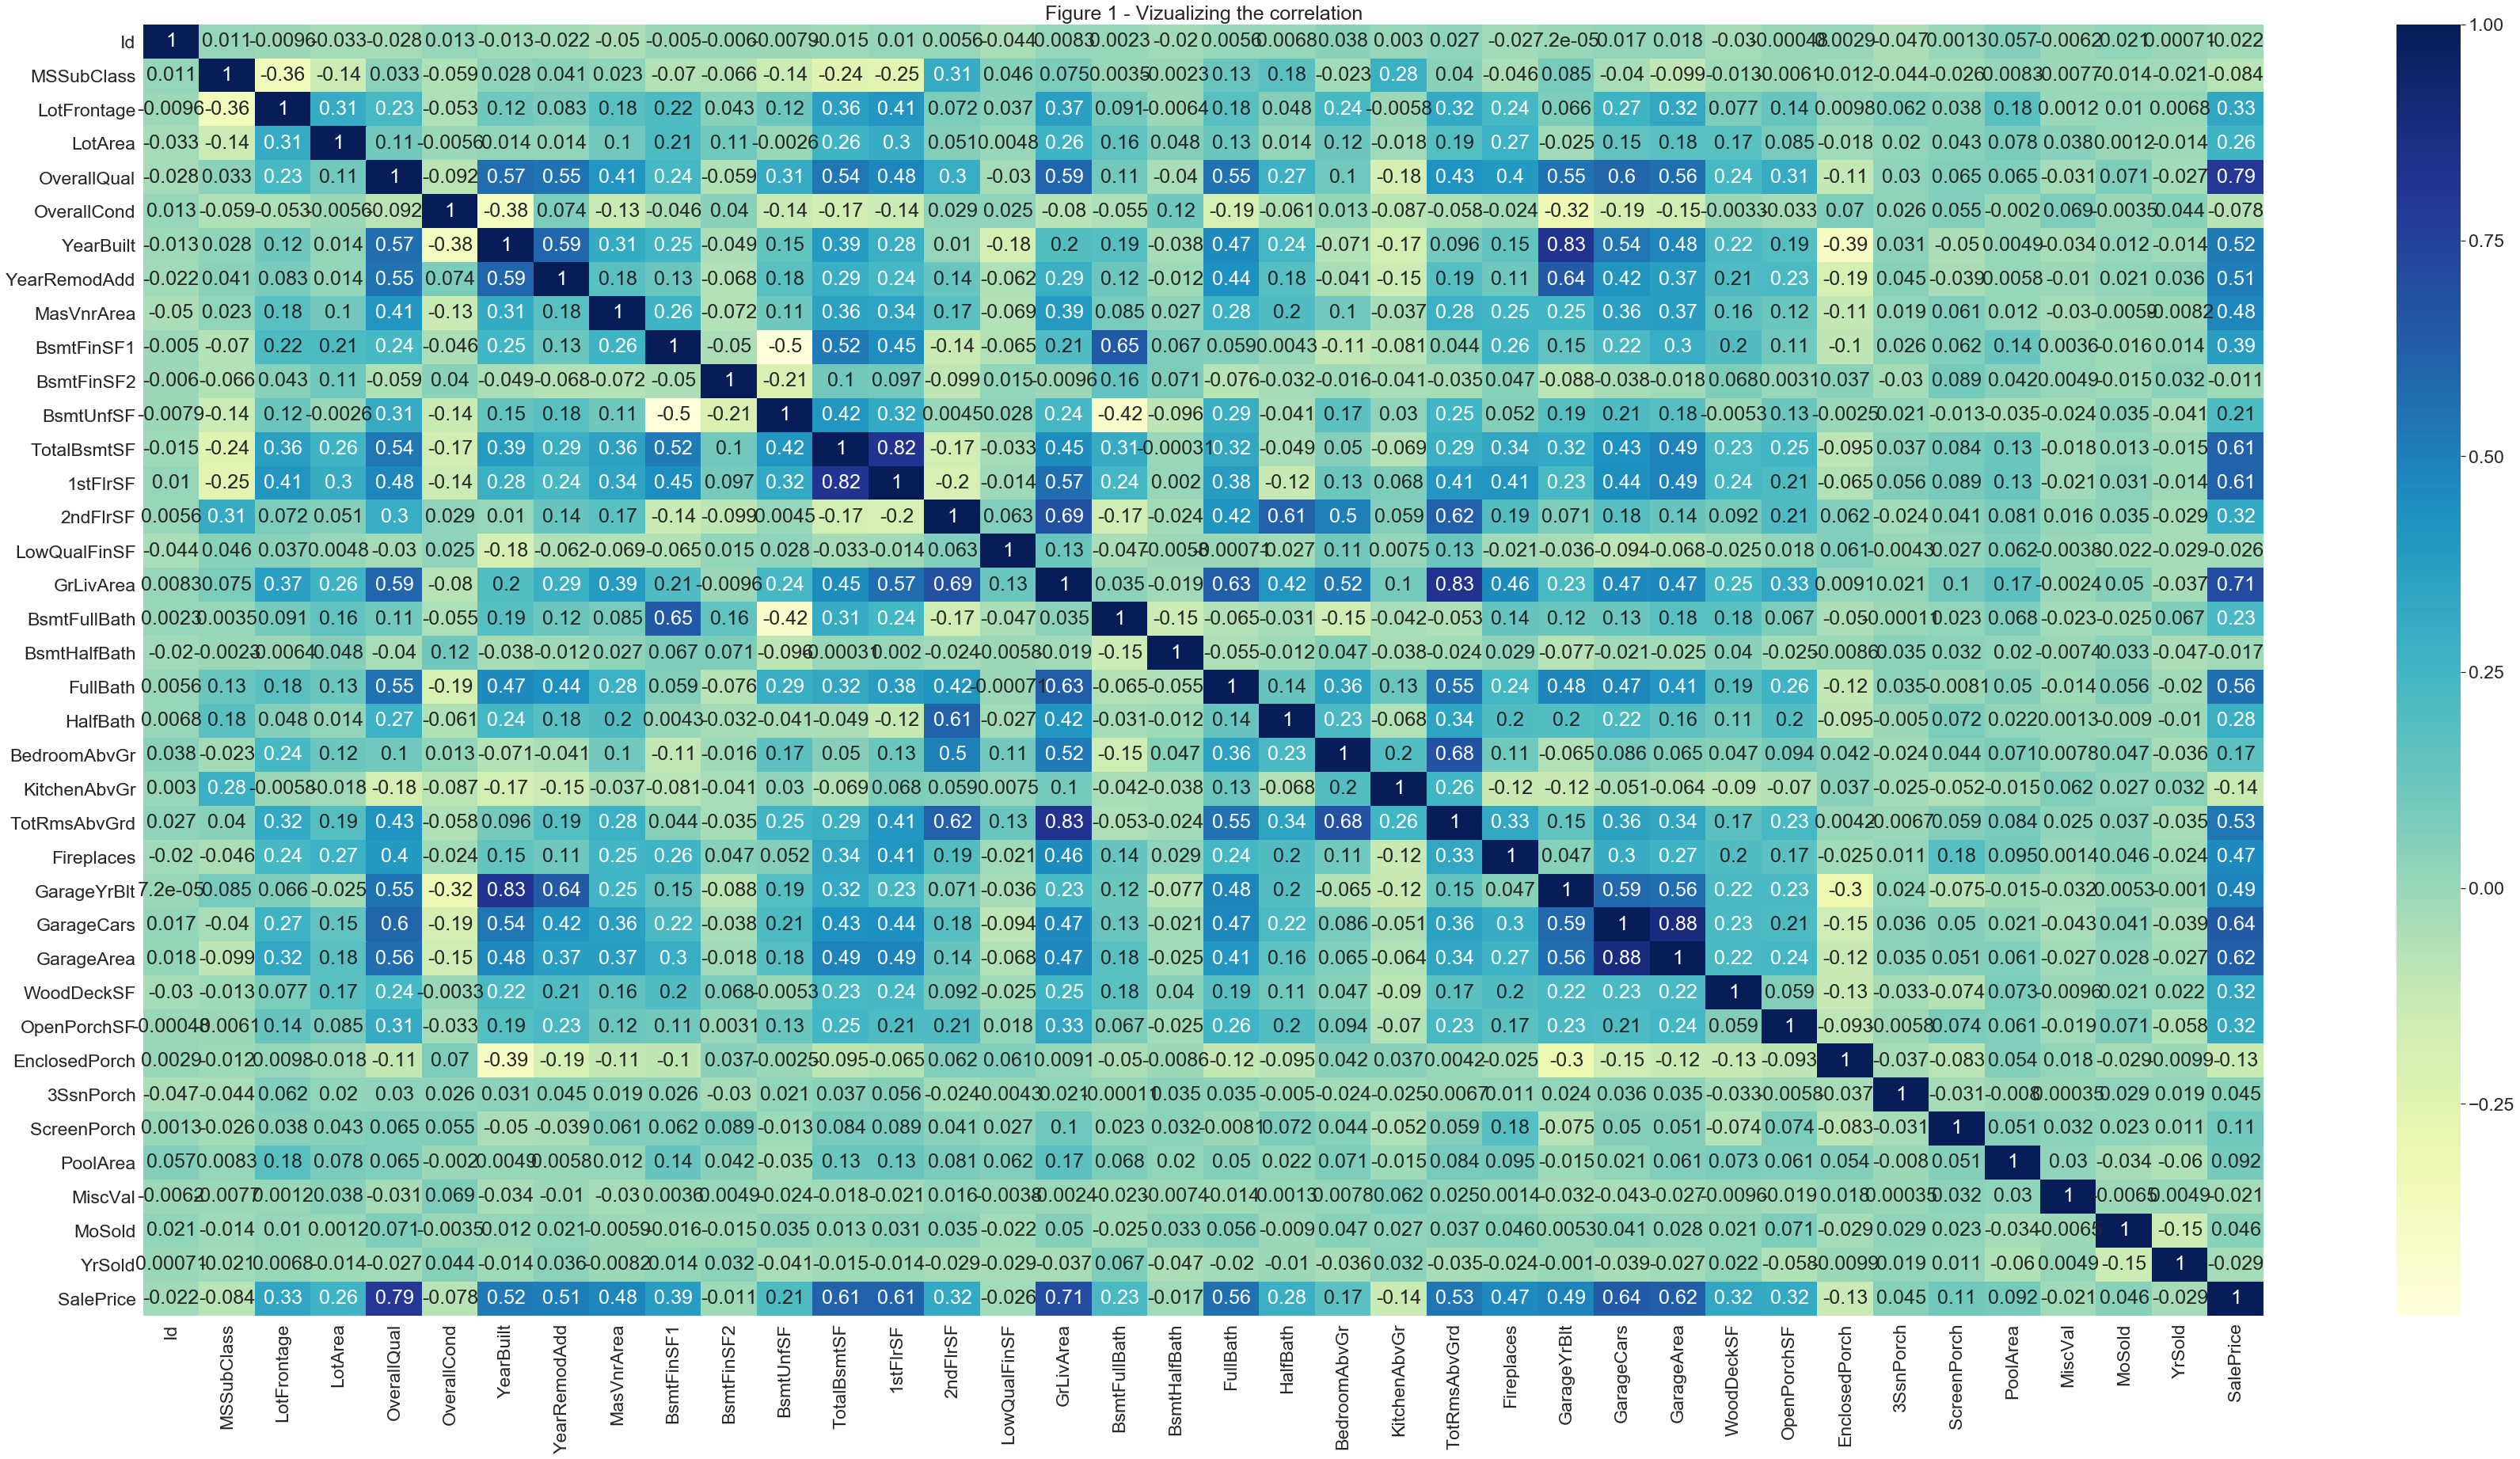

In [13]:
## Check the heatmap of the dataset | Start
plt.figure(figsize=(60,30))
sns.set(style="darkgrid")
sns.set(font_scale=2.1)
plt.title('Figure 1 - Vizualizing the correlation')
sns.heatmap(df_clean.corr(),cmap='YlGnBu',annot=True)
plt.show()
## Check the heatmap of the dataset | End

This is a very useful graph for us as we can see that there are some parameters which are highly correlated with each other and we can remove them before proceeding further. <br>
Following are the columns that have a high correlation:
1. GarageYrBlt and YearBuilt - 0.83
2. 1stFlrSF and TotalBsmtSF - 0.82
3. GarageArea and GarageCars - 0.88
4. TotRmsAbvGrd and GrLivArea - 0.83
<br> <b> So we can remove one of the columns and we will be able to descibe the data using the other columns </b>

In [14]:
## Drop the columns with high co-relation | Start
df_clean = df_clean.drop(['GarageYrBlt','1stFlrSF','GarageCars','TotRmsAbvGrd','BsmtFinSF1'],axis=1)
## Drop the columns with high co-relation | End

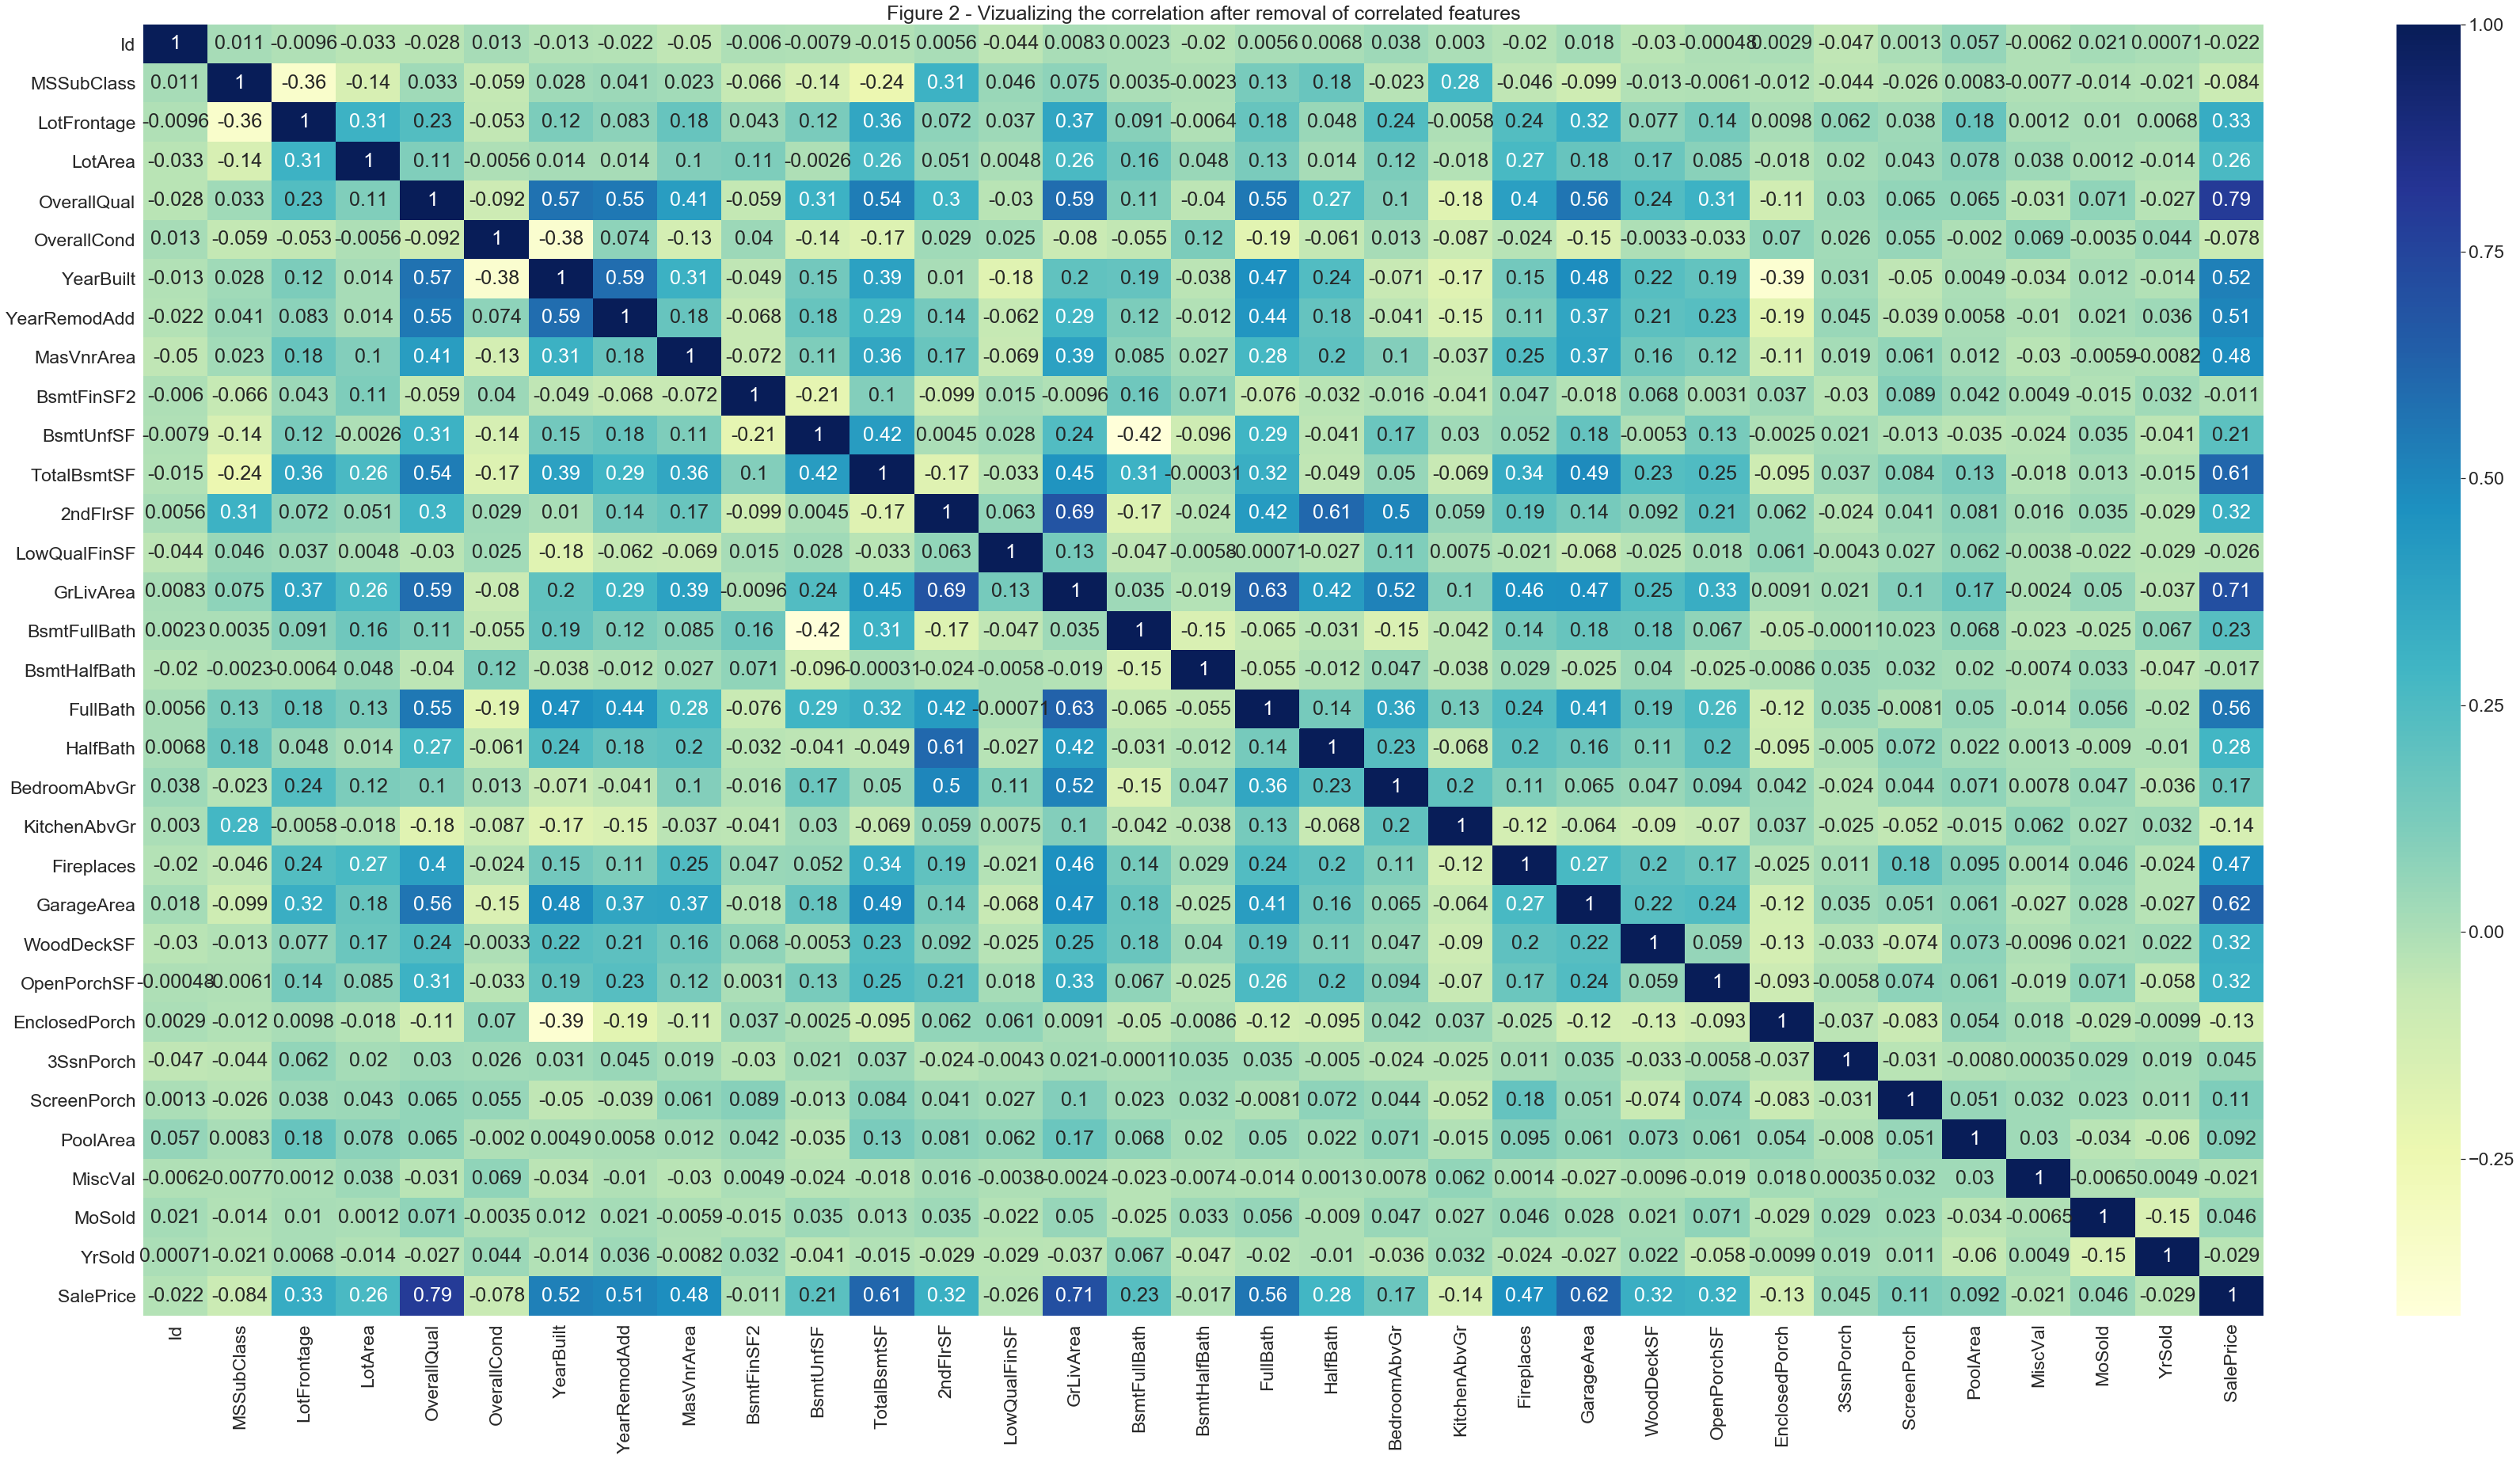

In [15]:
## Check the heatmap of the dataset | Start
plt.figure(figsize=(60,30))
sns.set(style="darkgrid")
sns.set(font_scale=2.1)
plt.title('Figure 2 - Vizualizing the correlation after removal of correlated features')
sns.heatmap(df_clean.corr(),cmap='YlGnBu',annot=True)
plt.show()
## Check the heatmap of the dataset | End

<center> We have removed the highly correlated features from the heatmap though there are other correlated columns but we will proceed with the set of columns for now and later we will handle these columns which are correlated with the SalesPrice</center>

In [16]:
## Make a copy of the dataset for the vizualization | Start
df_viz=df_clean.copy()
## Make a copy of the dataset for the vizualization | End

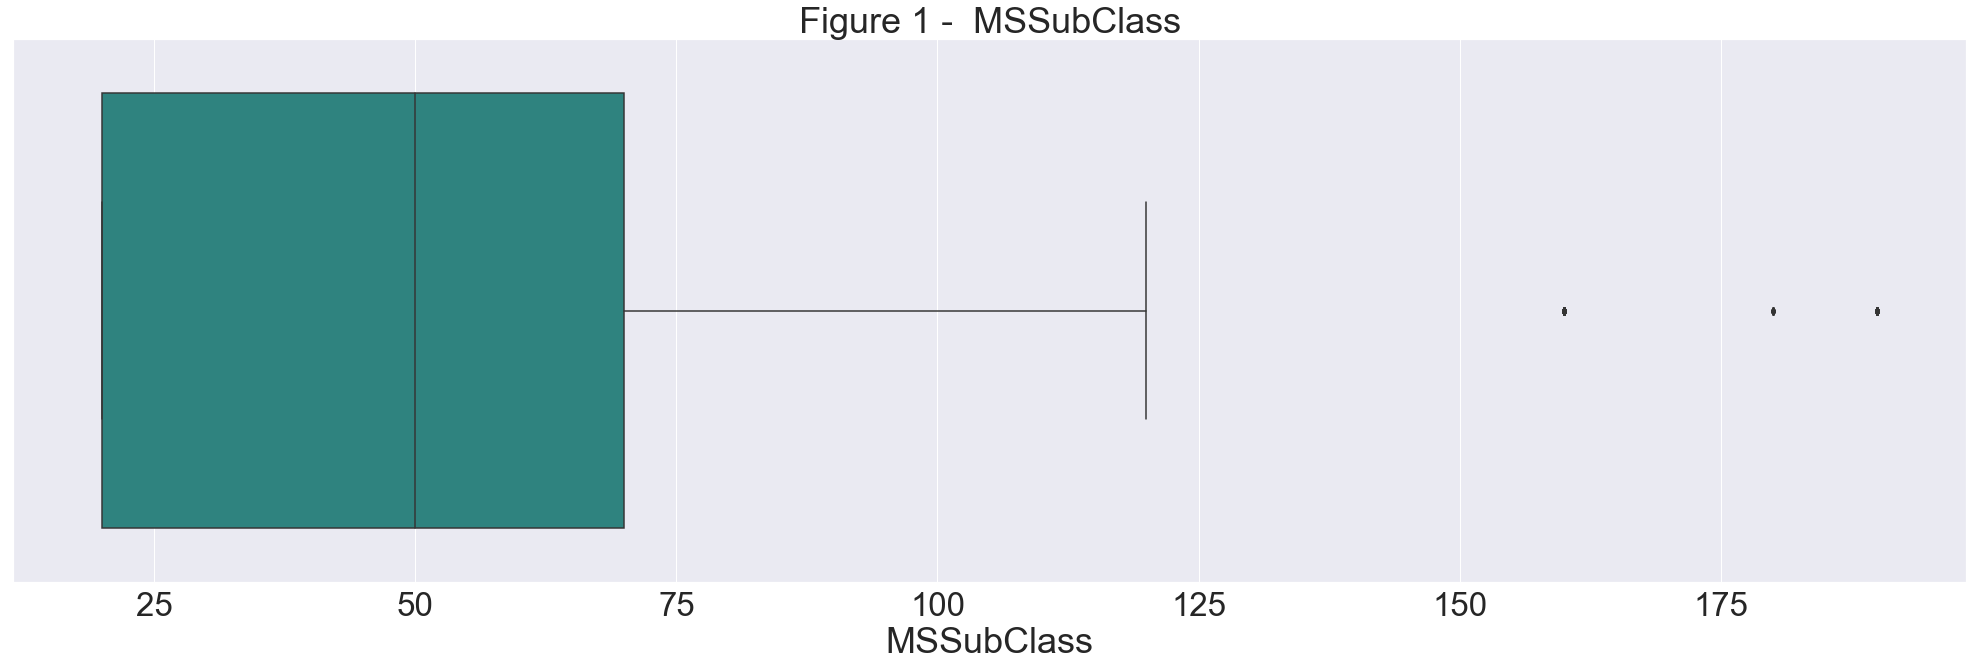

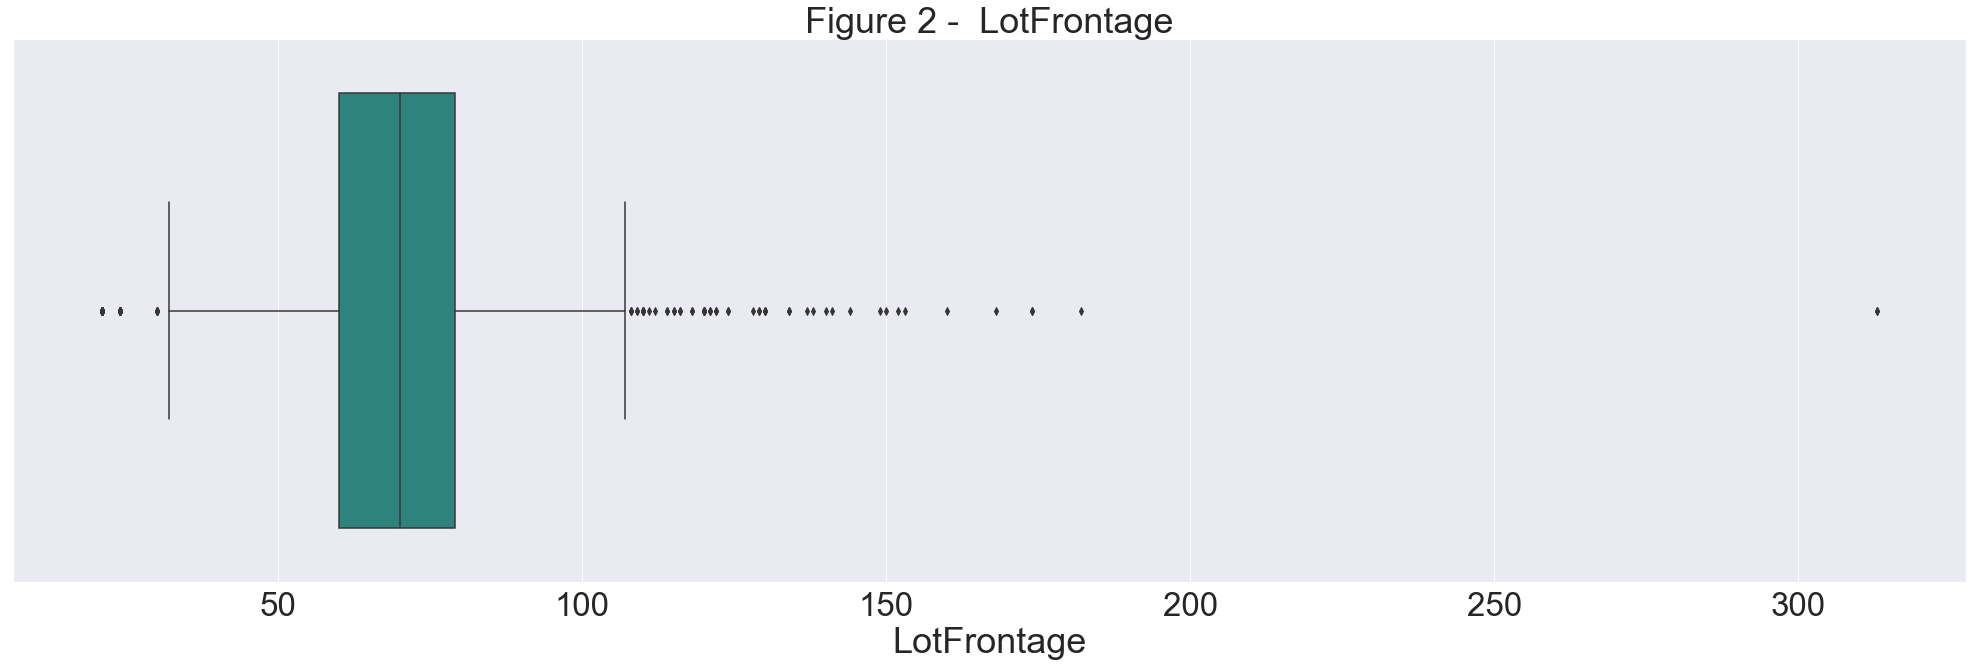

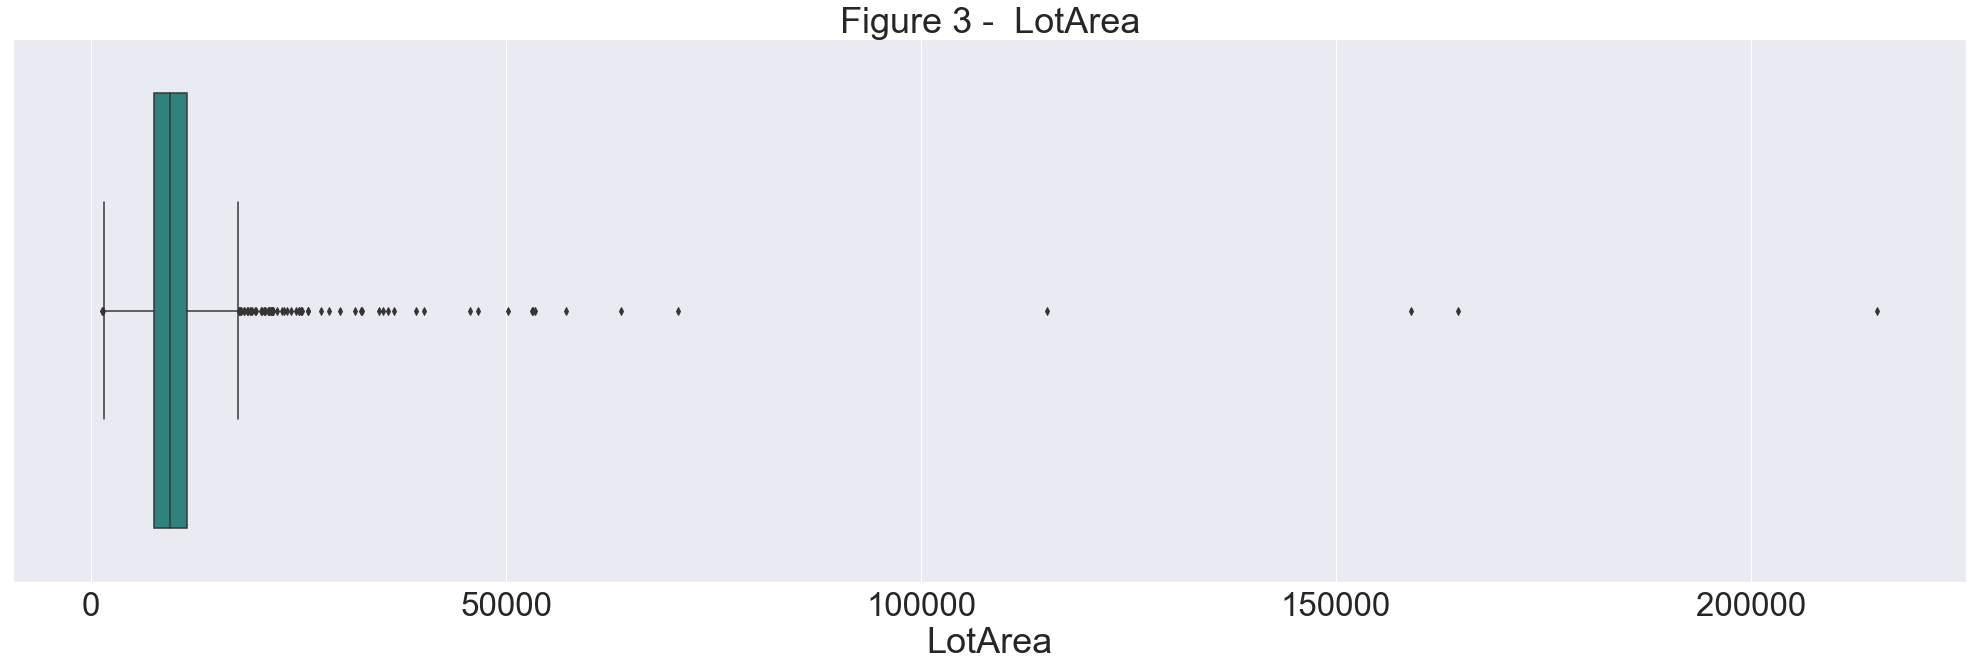

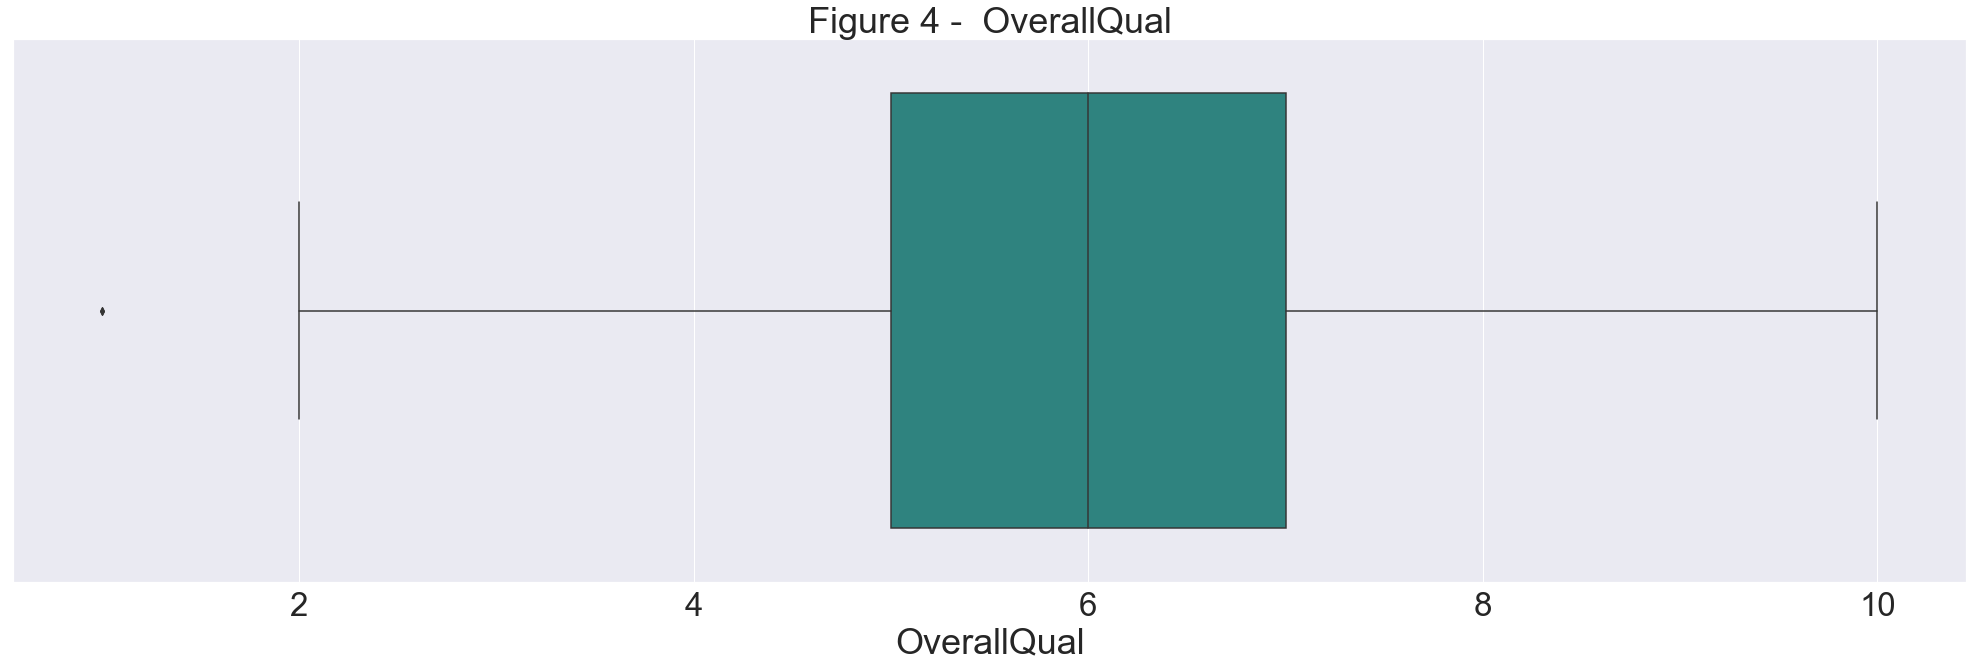

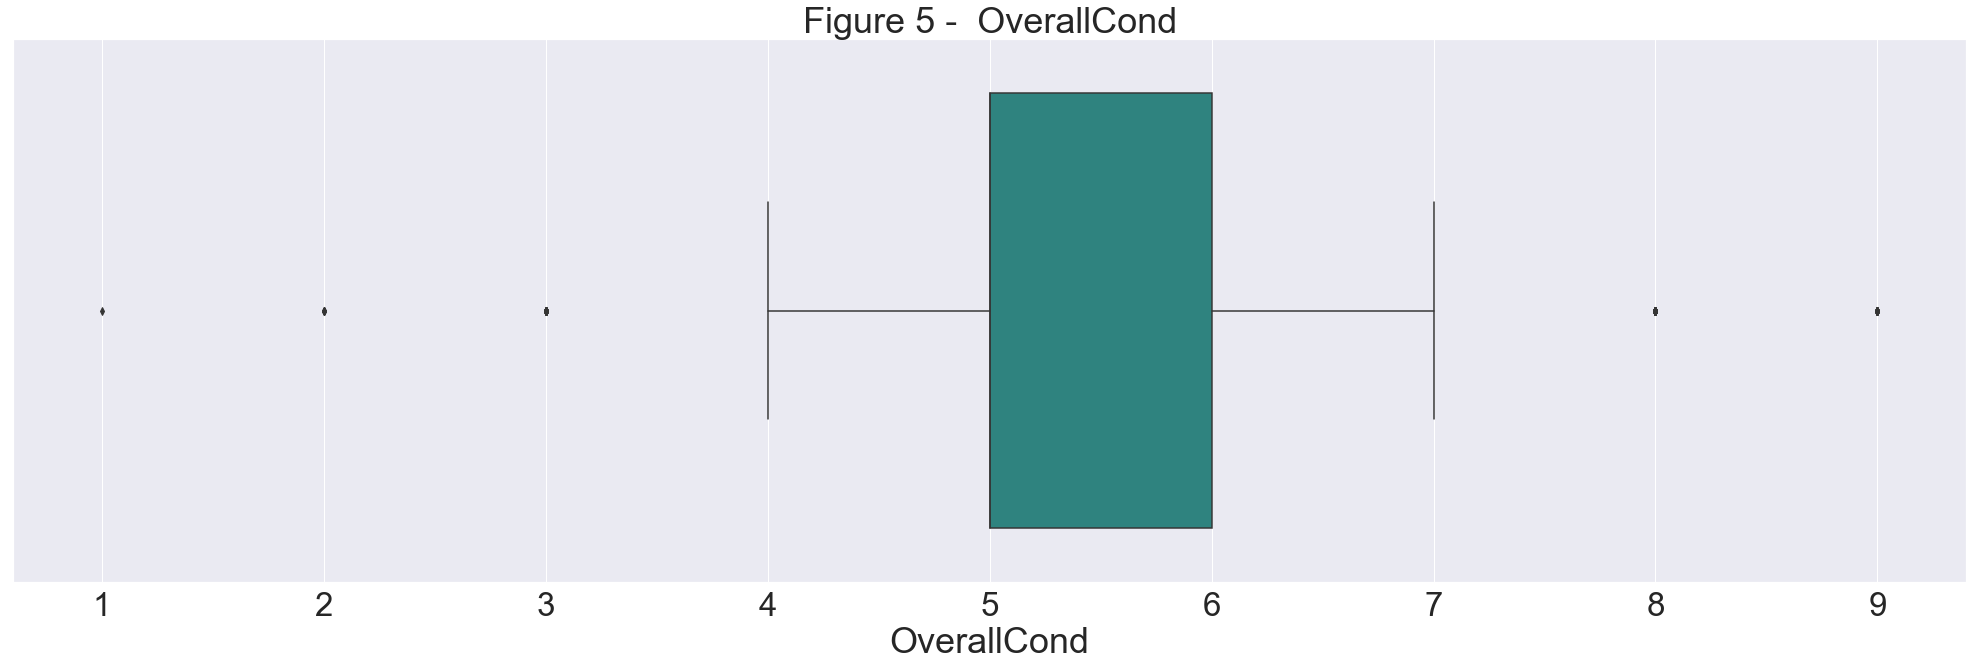

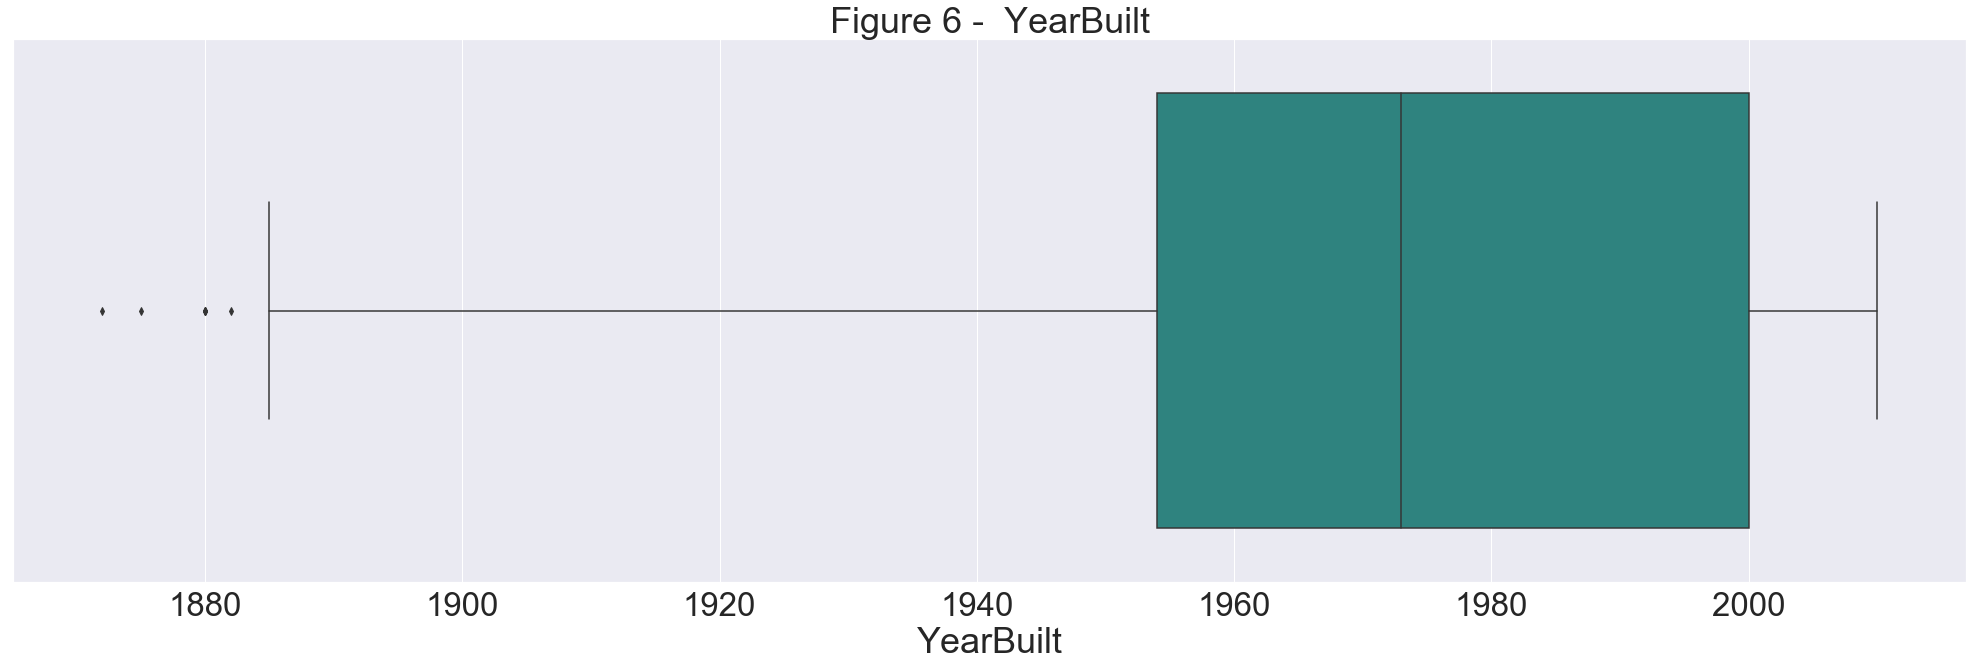

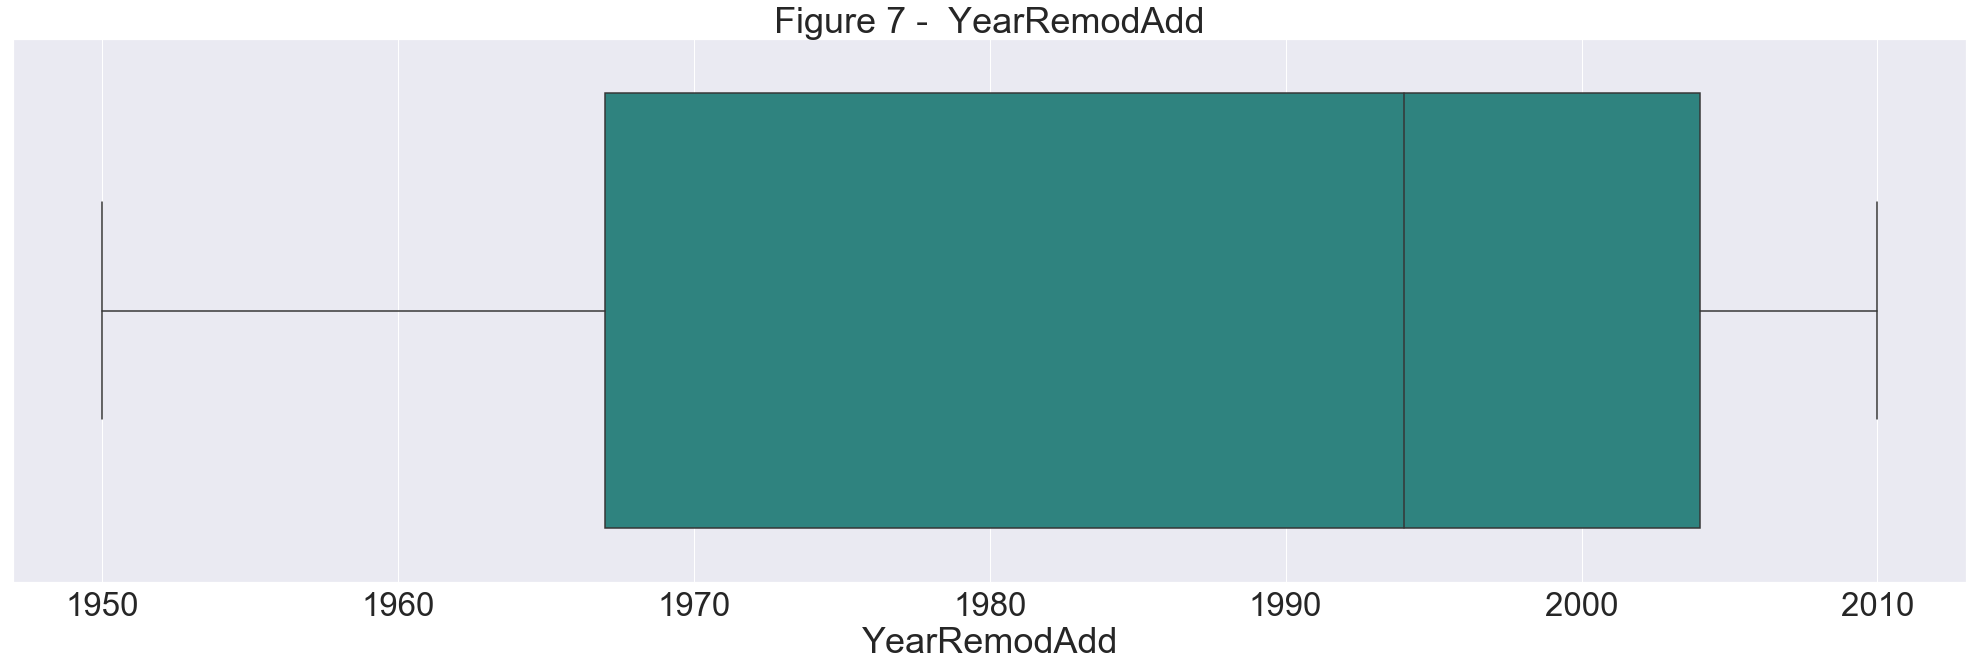

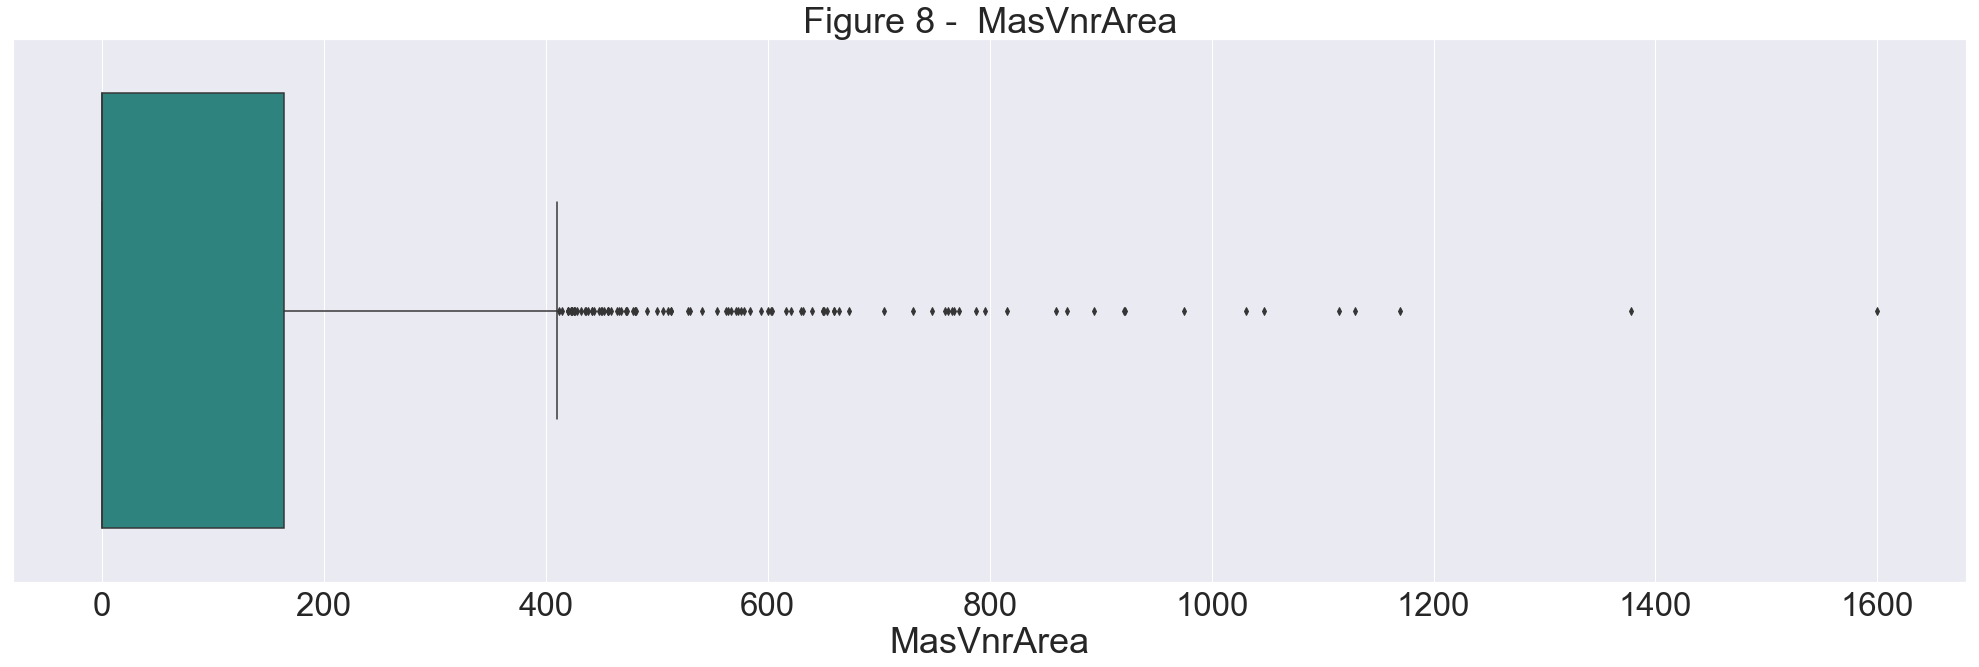

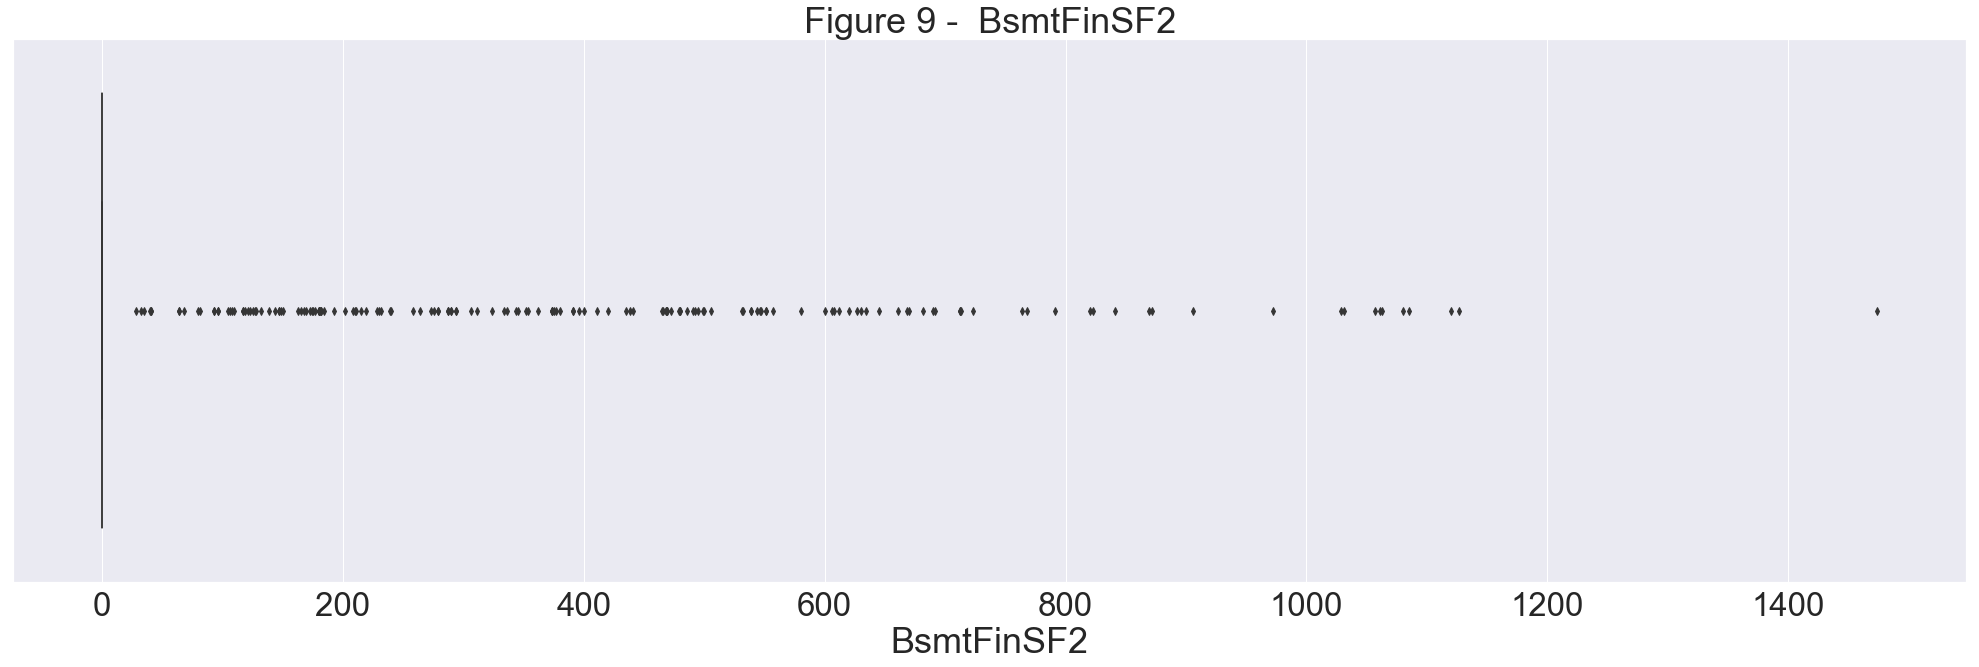

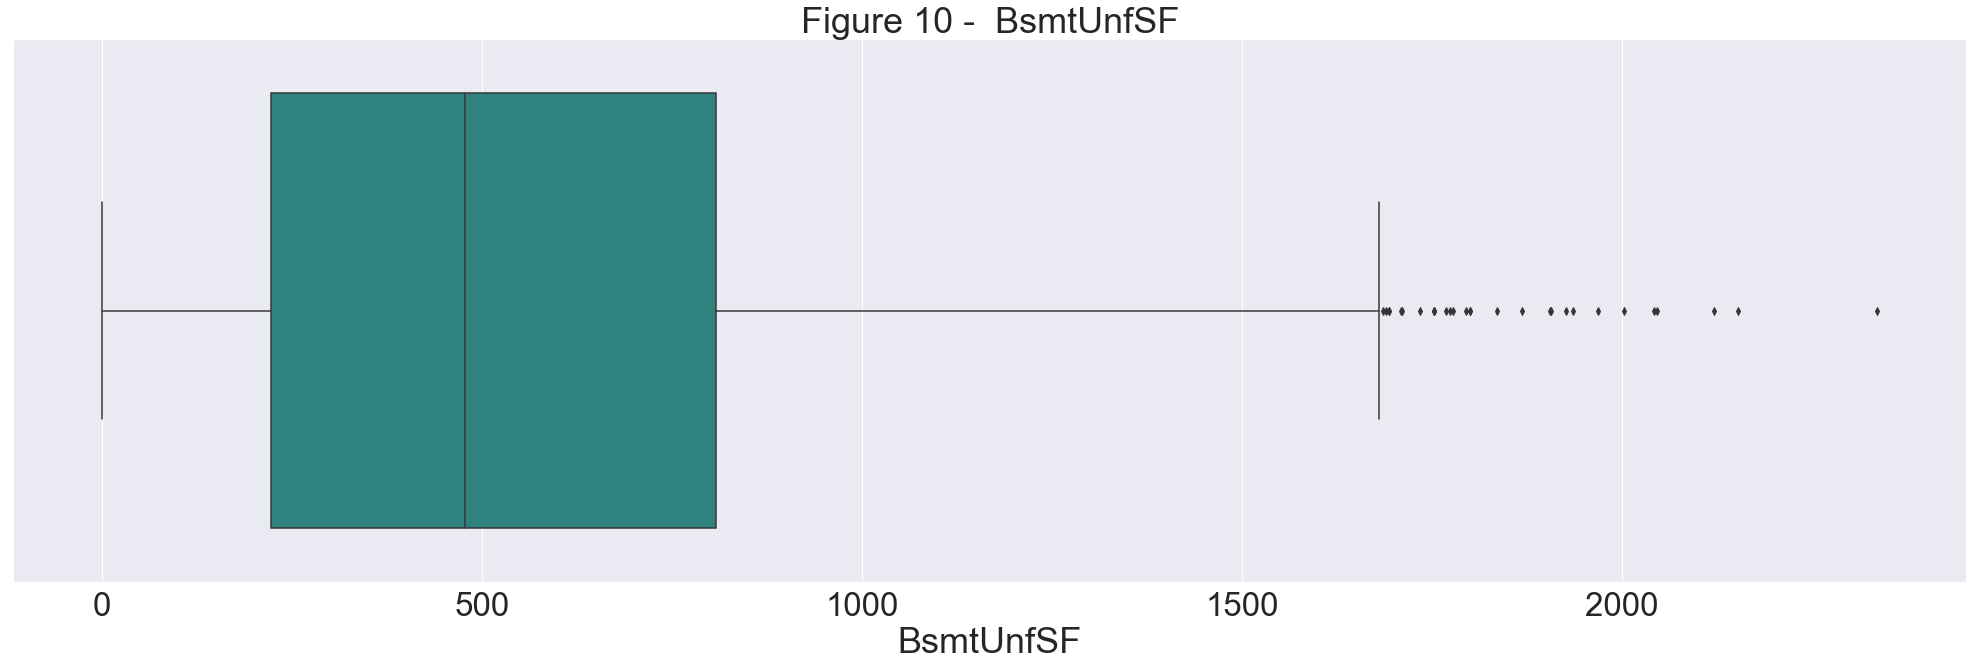

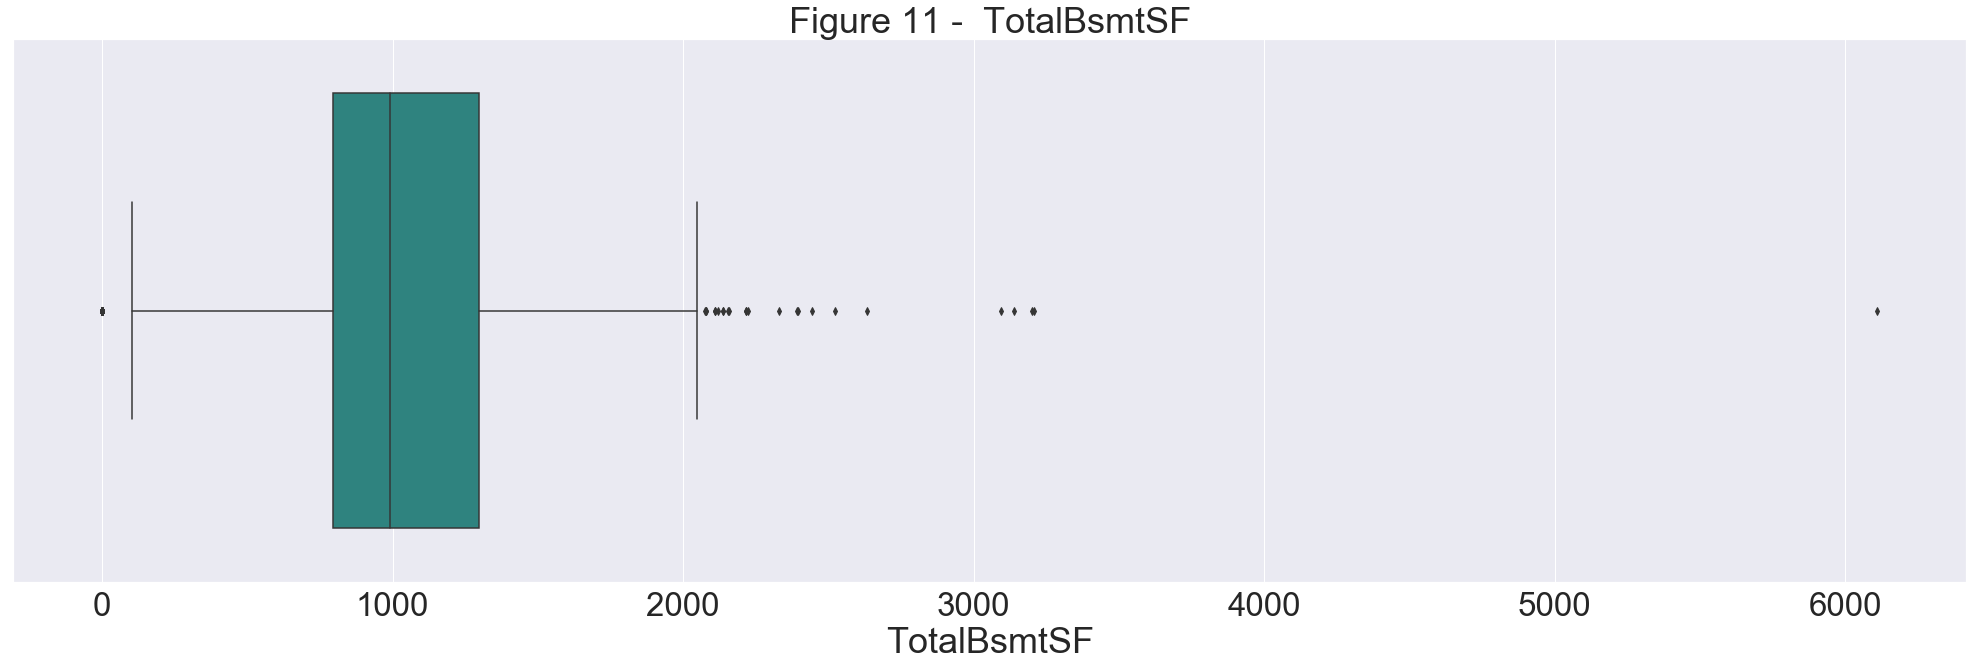

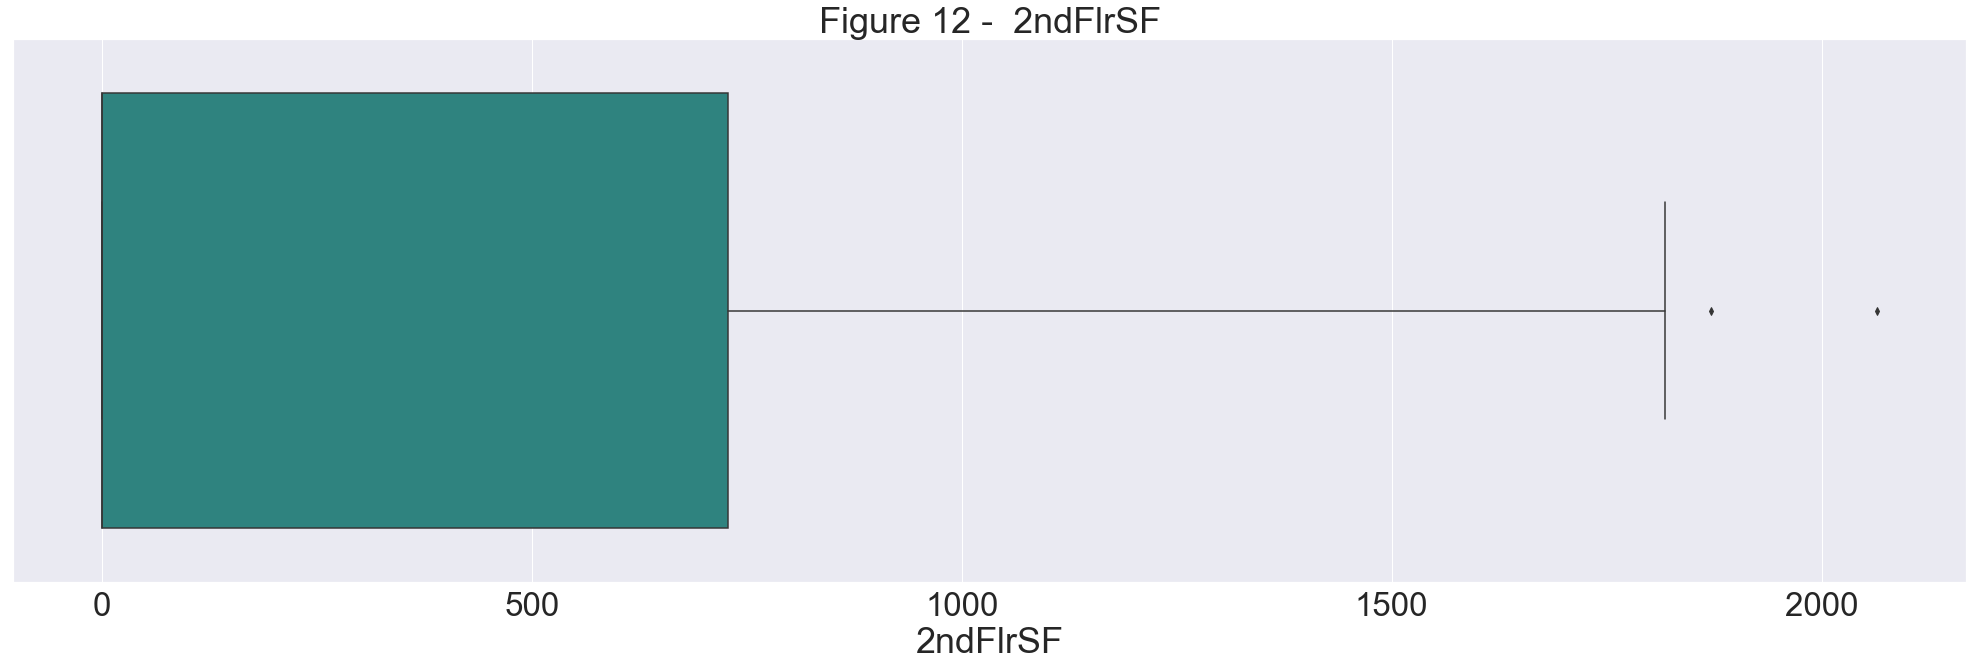

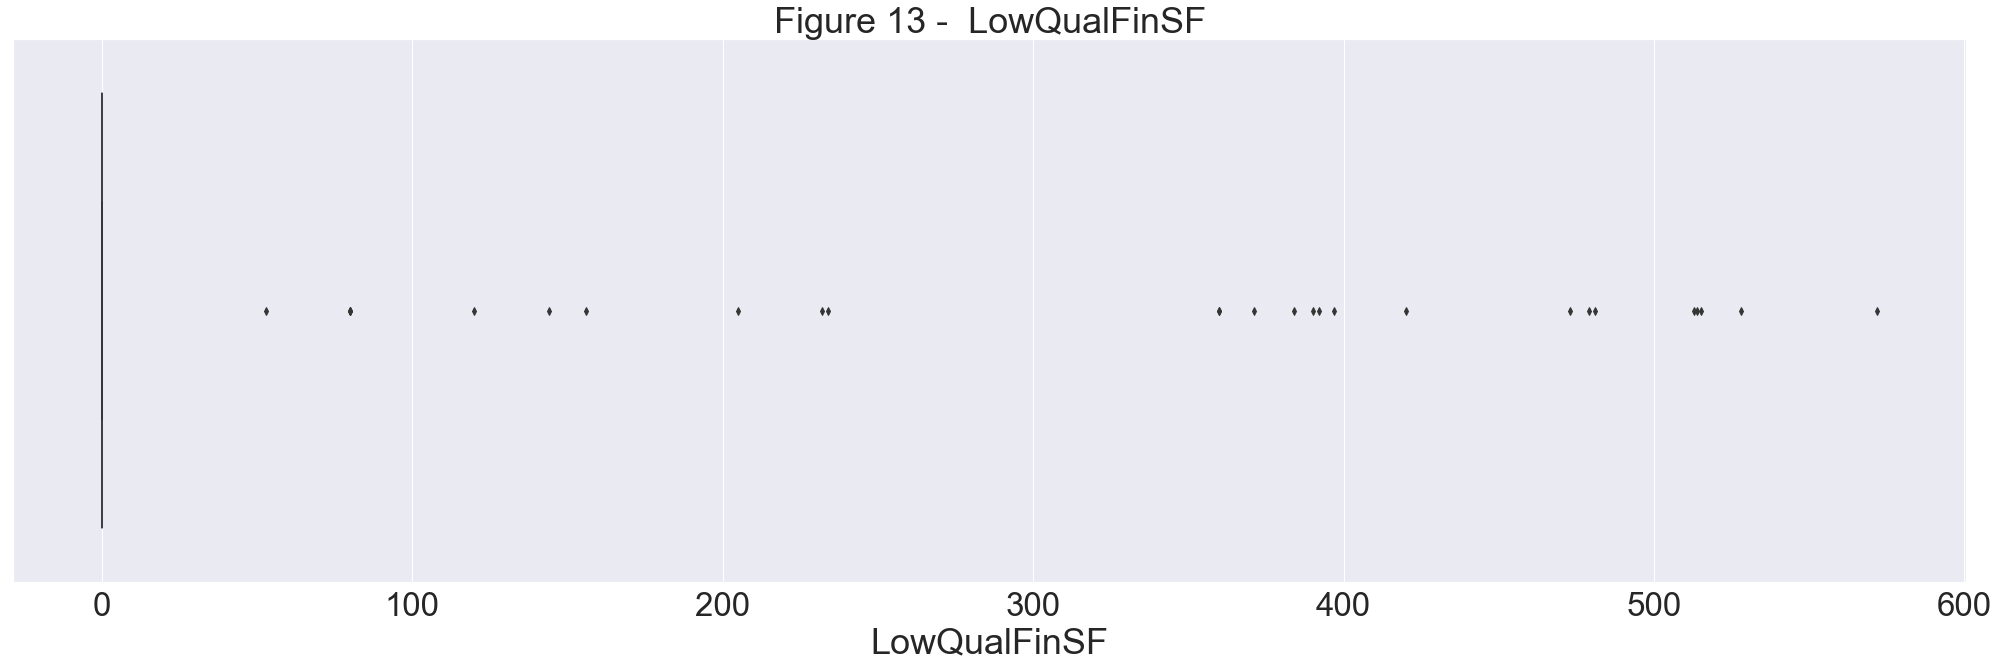

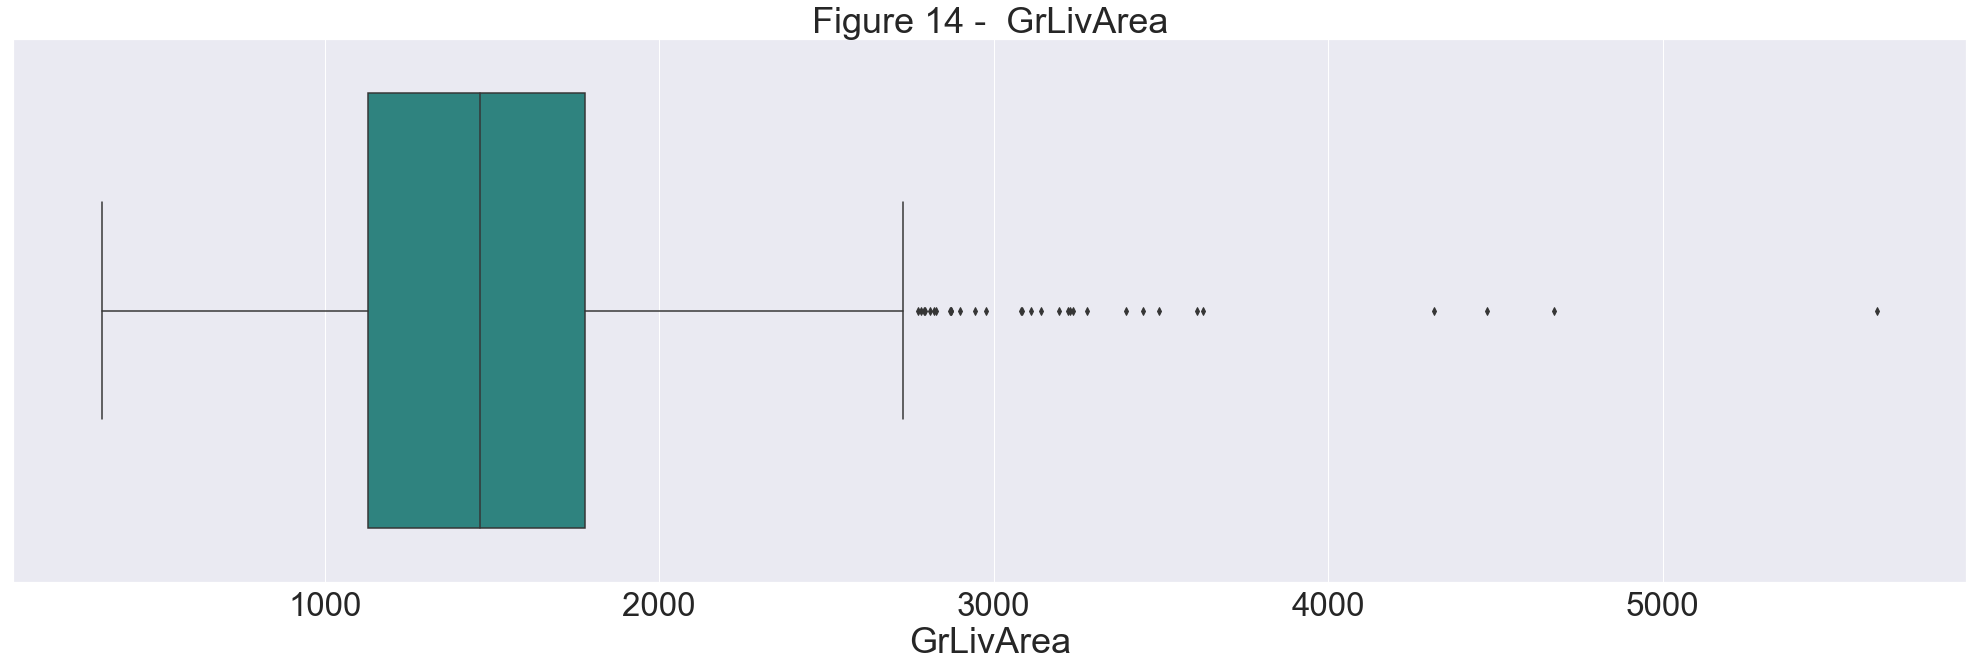

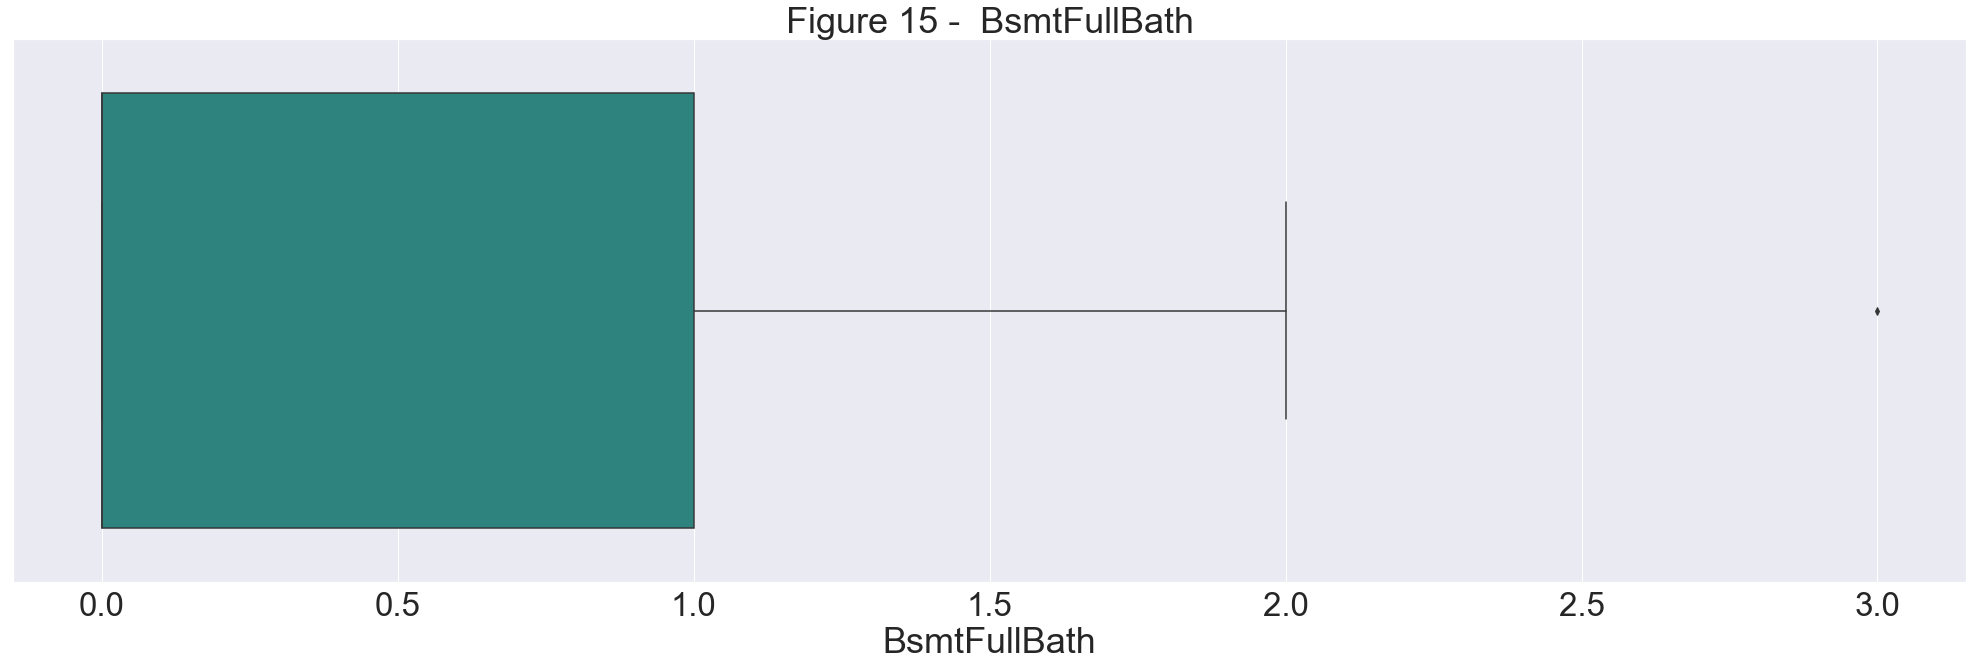

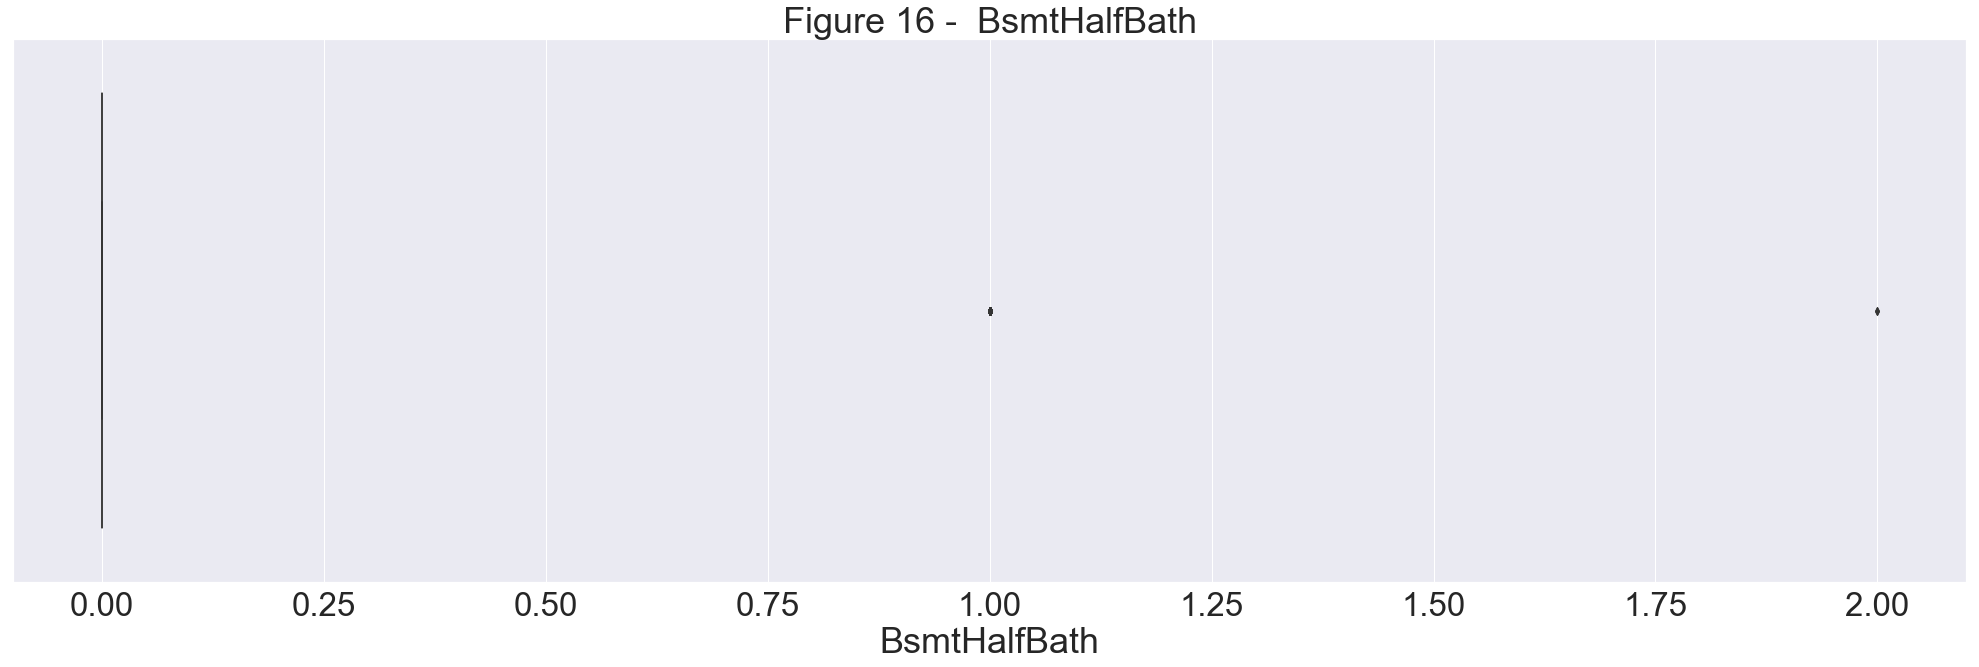

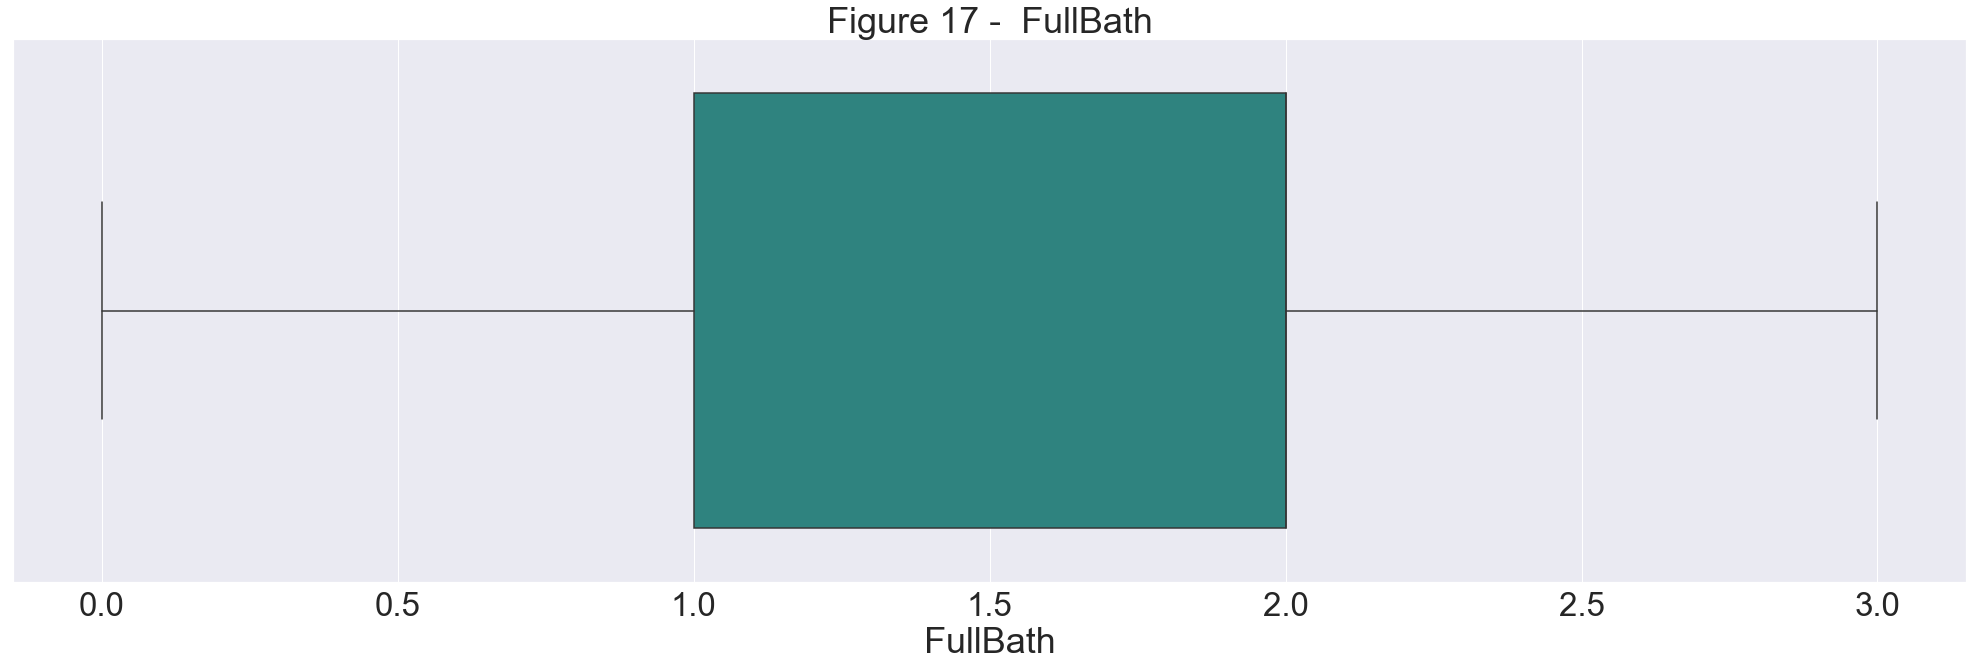

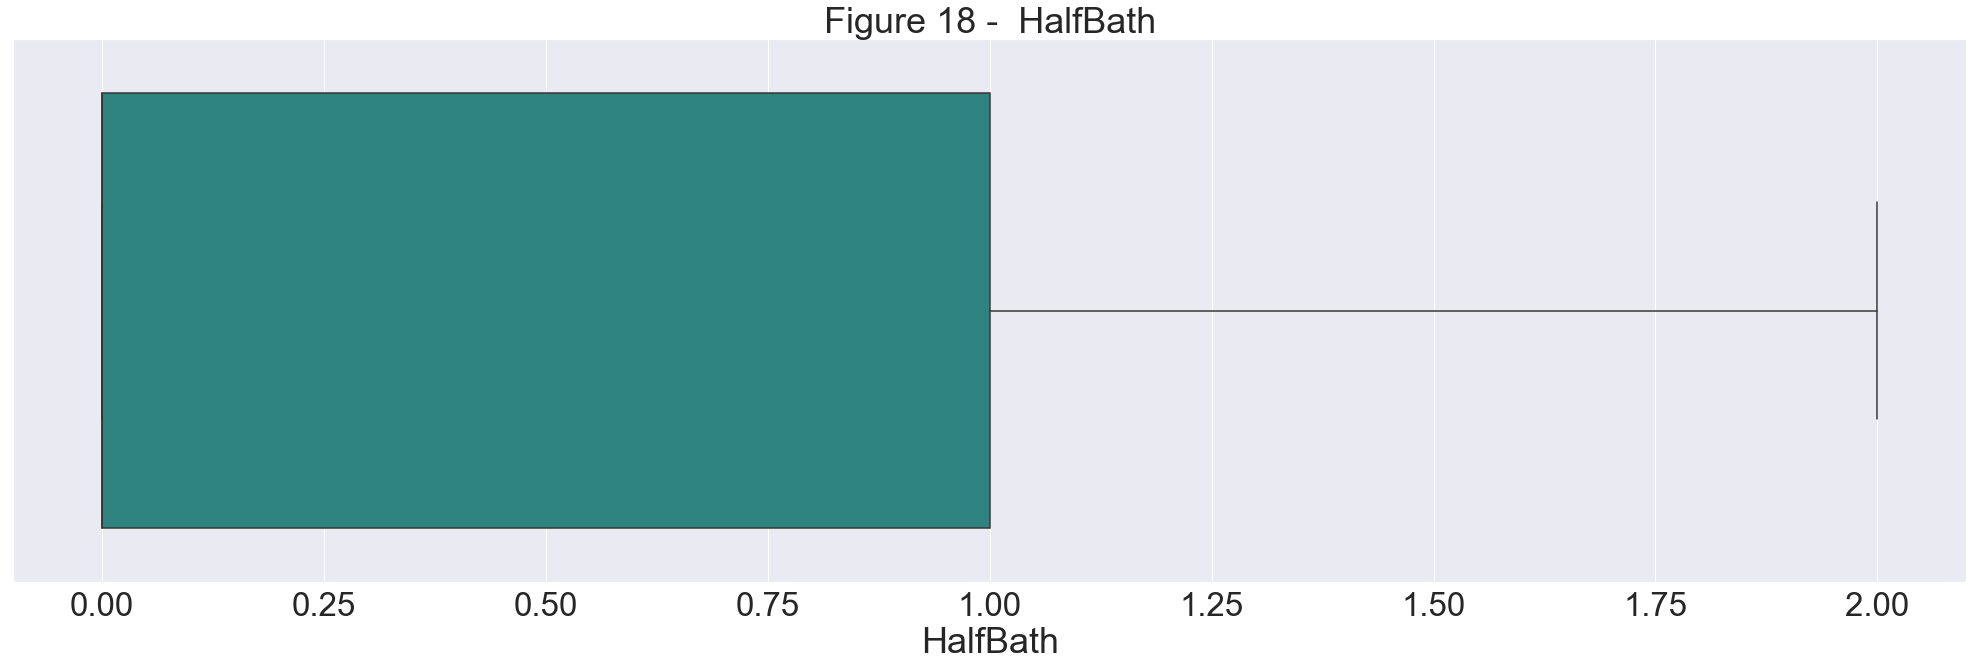

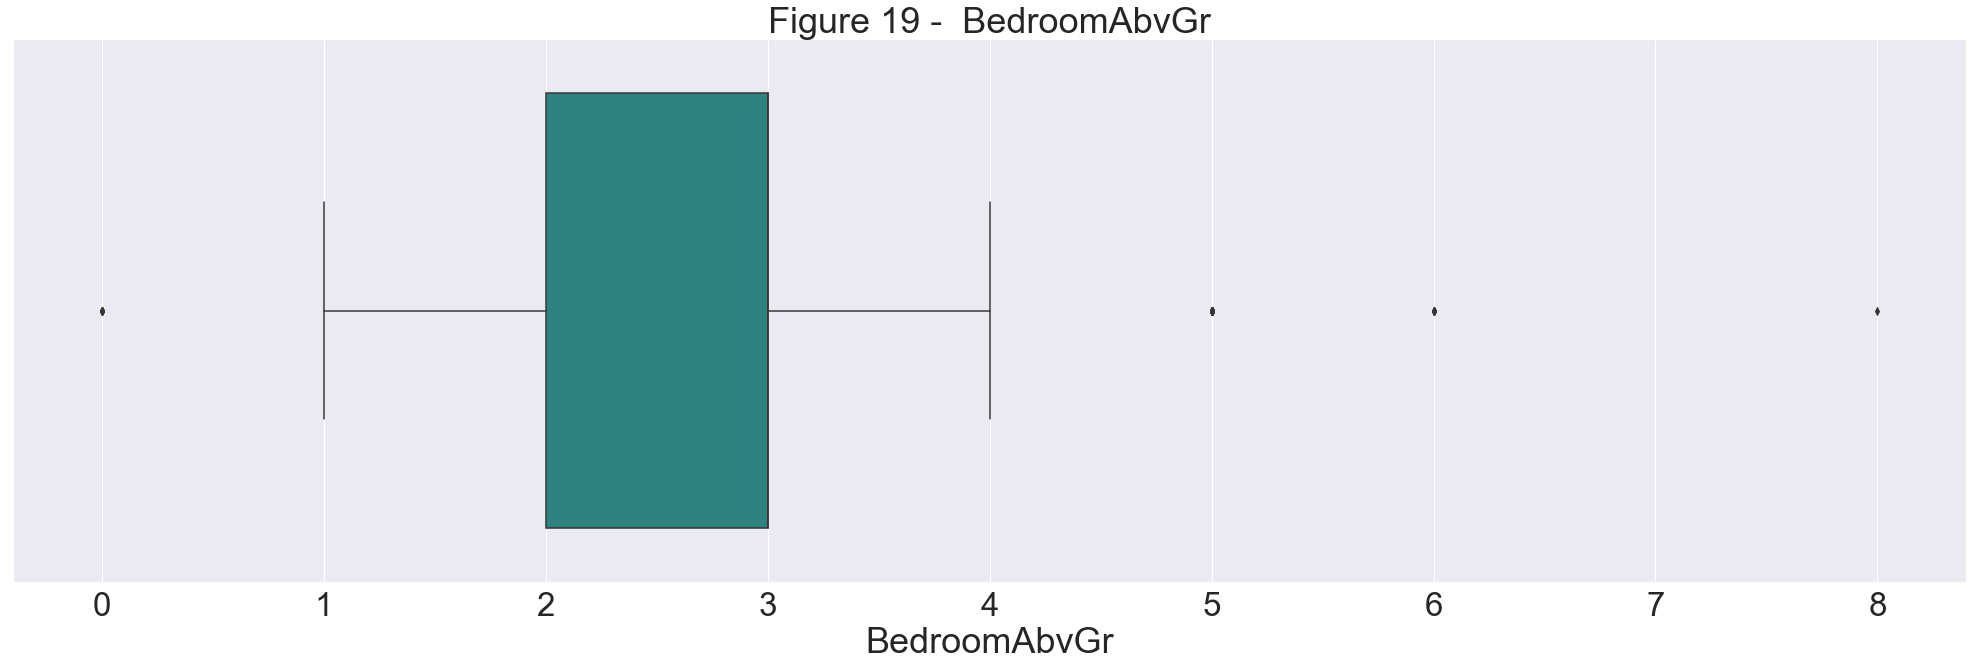

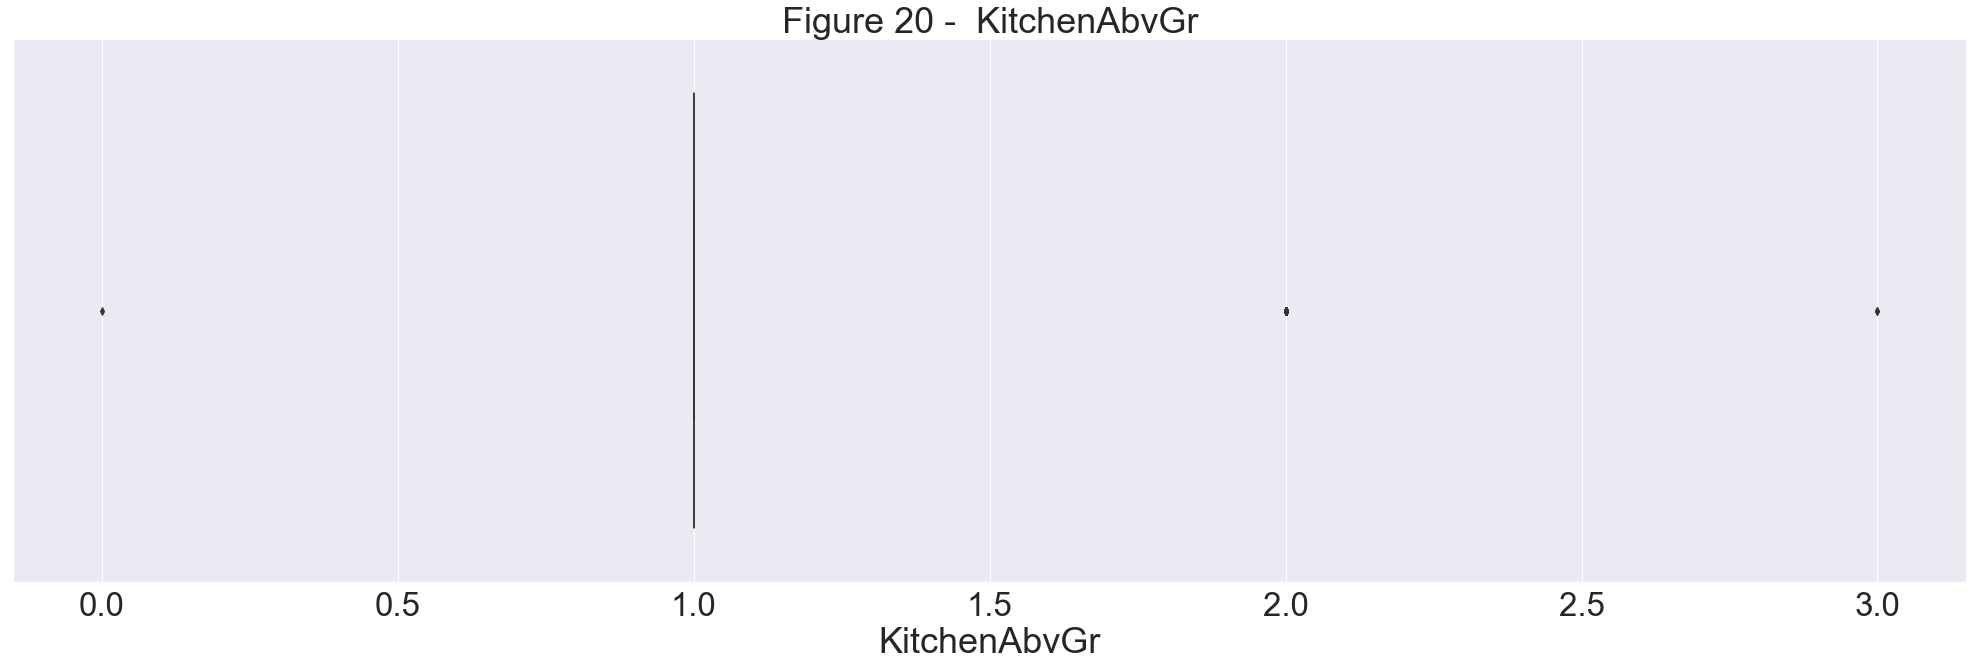

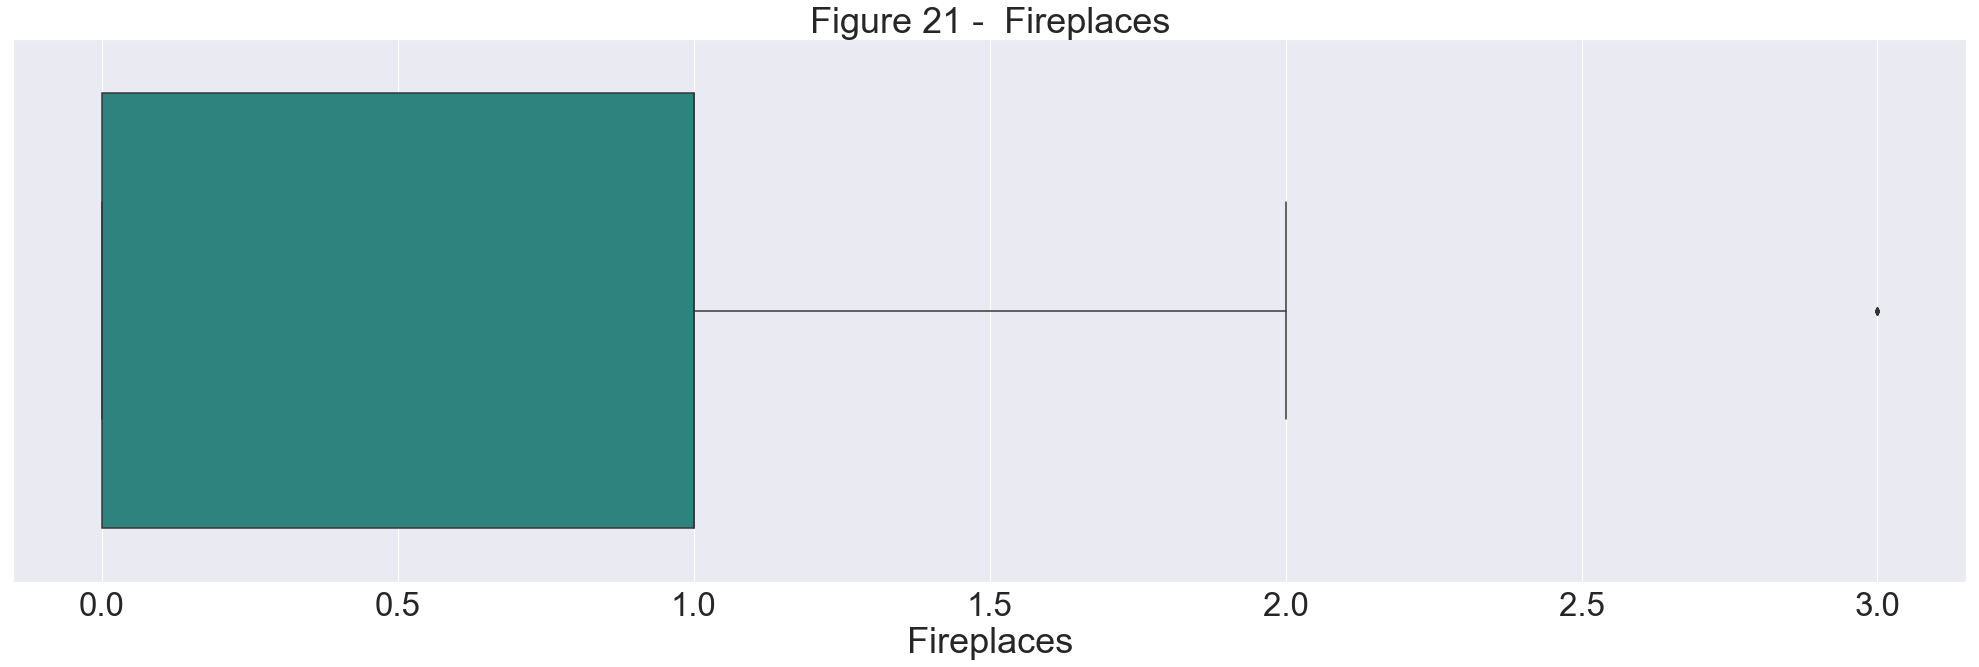

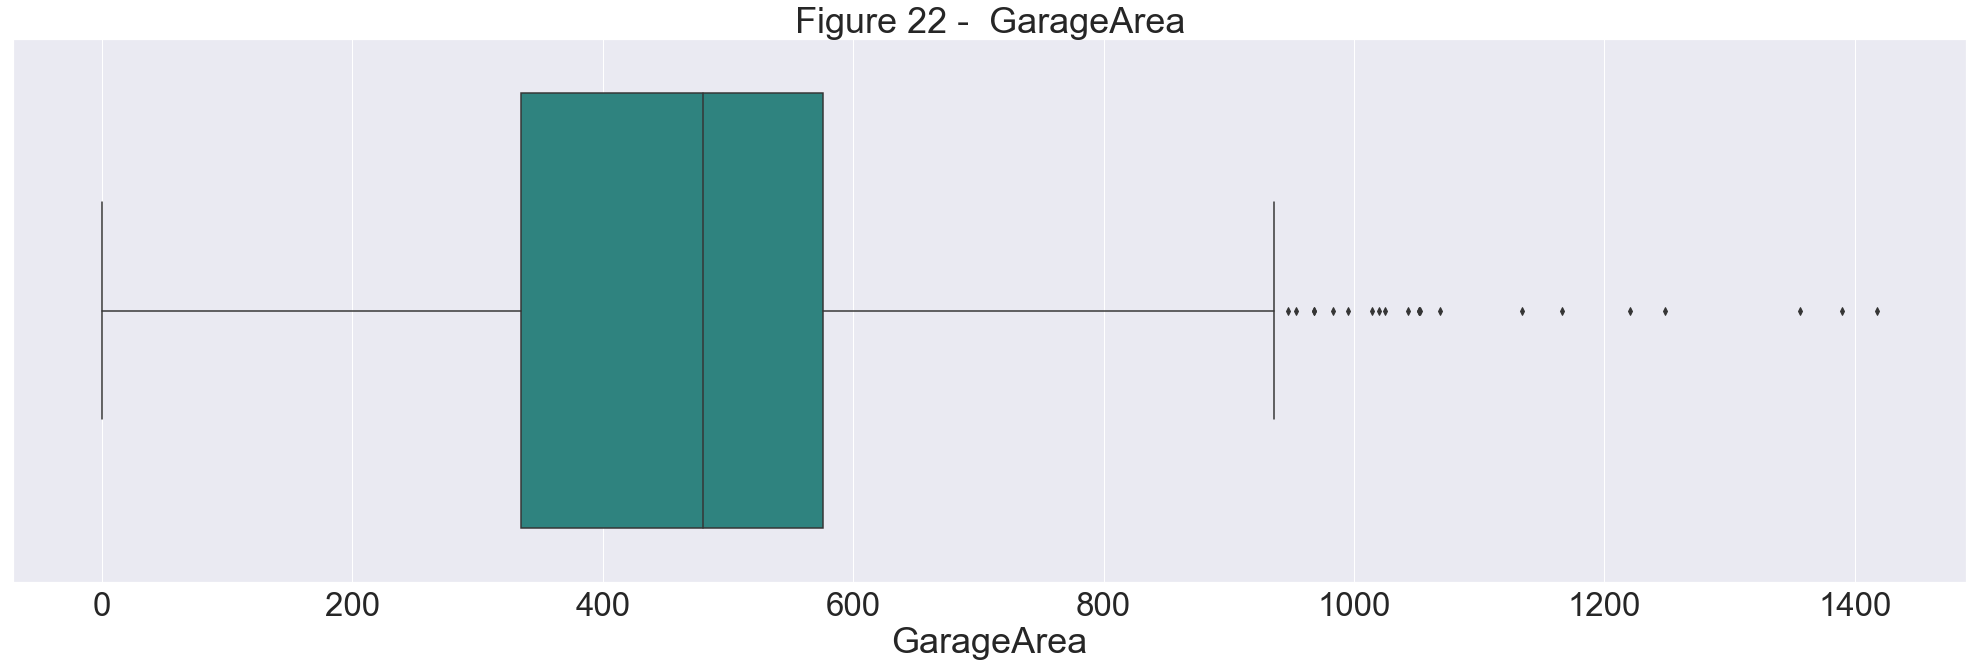

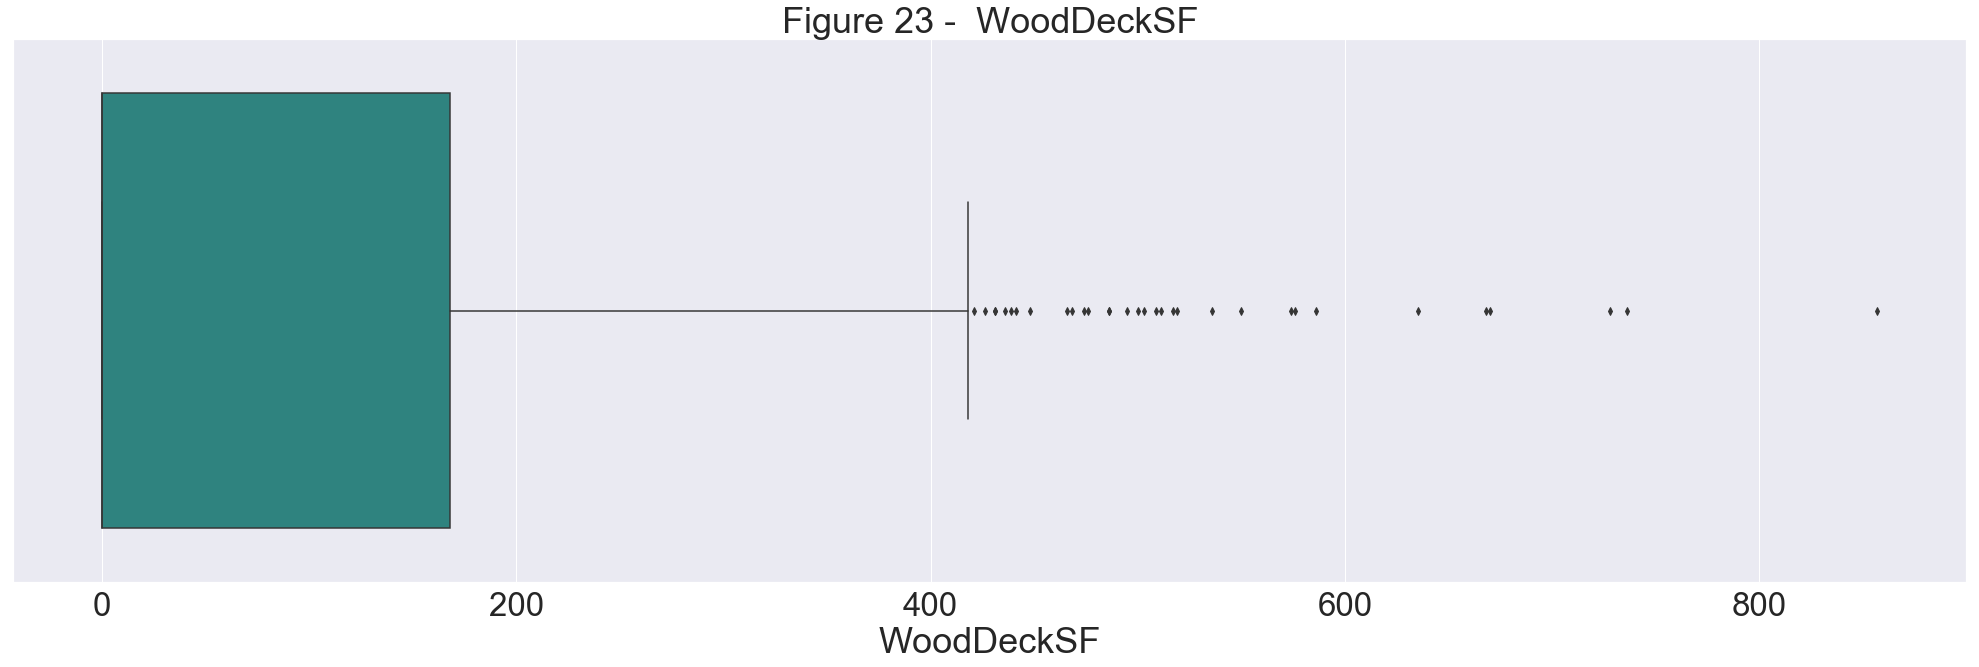

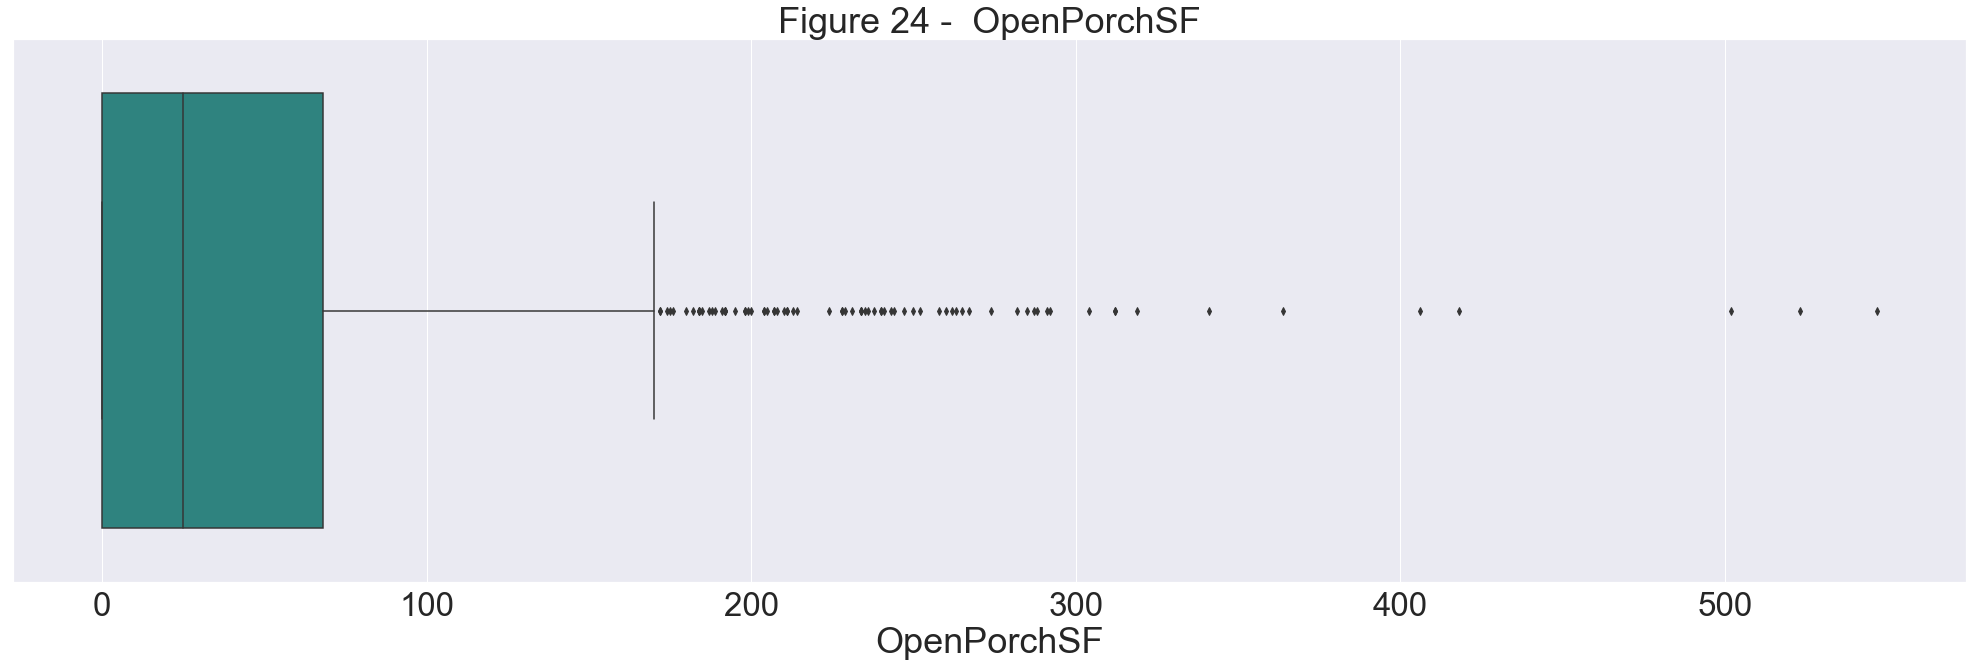

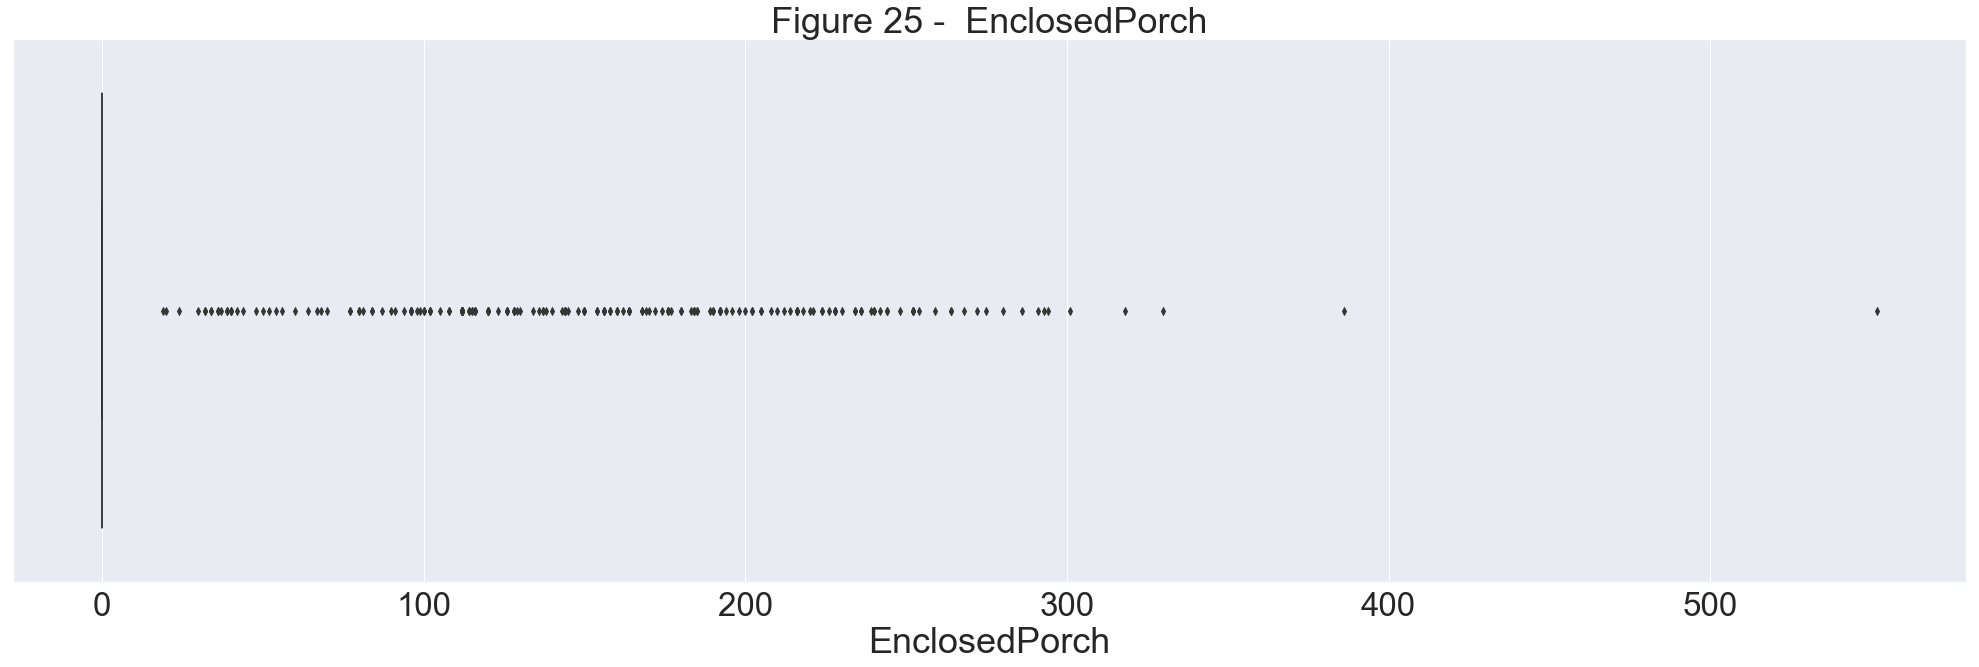

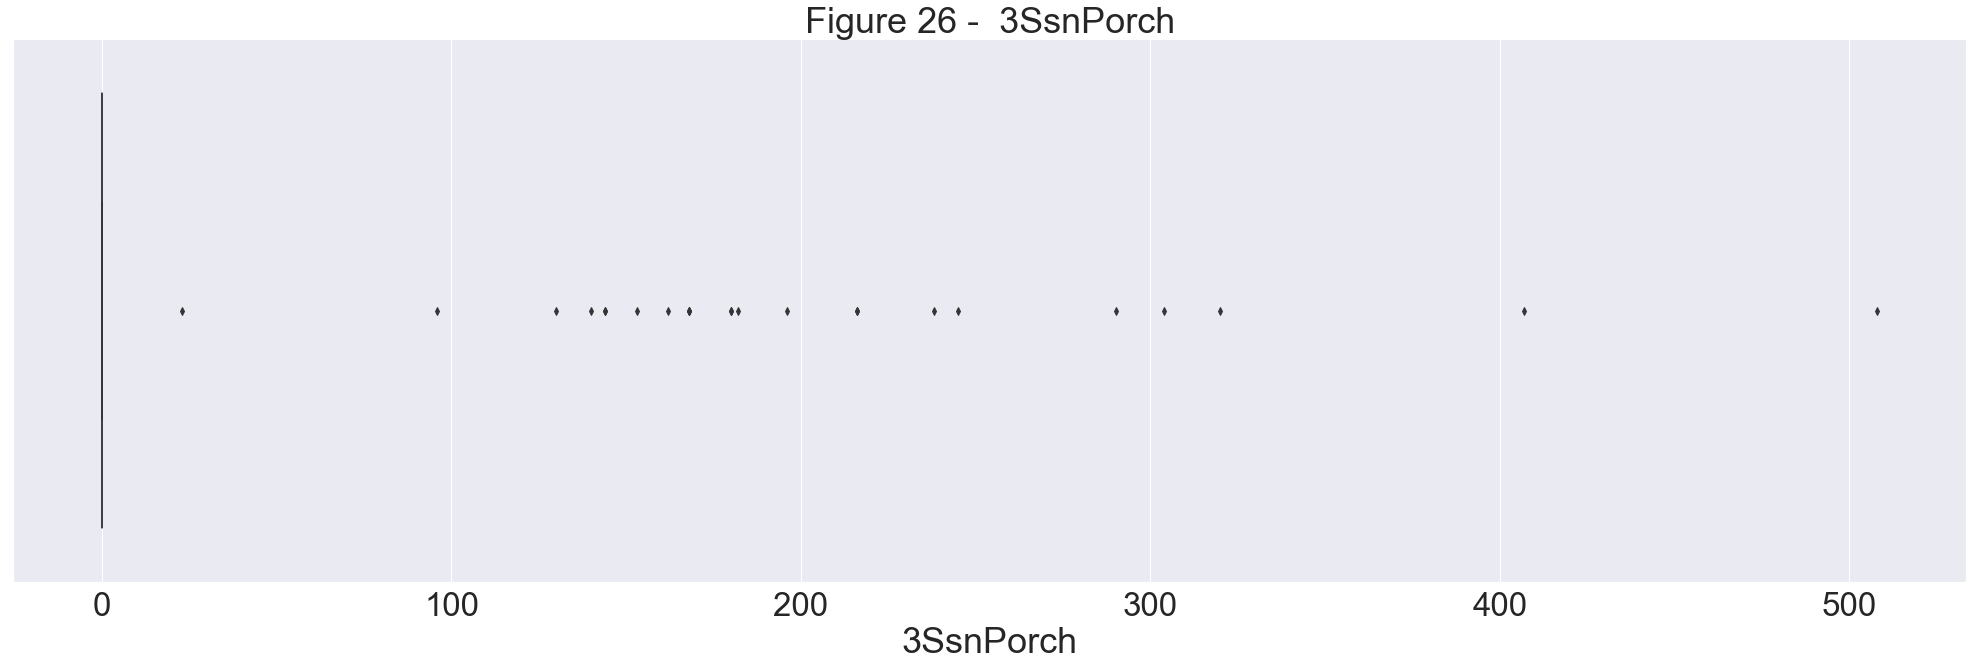

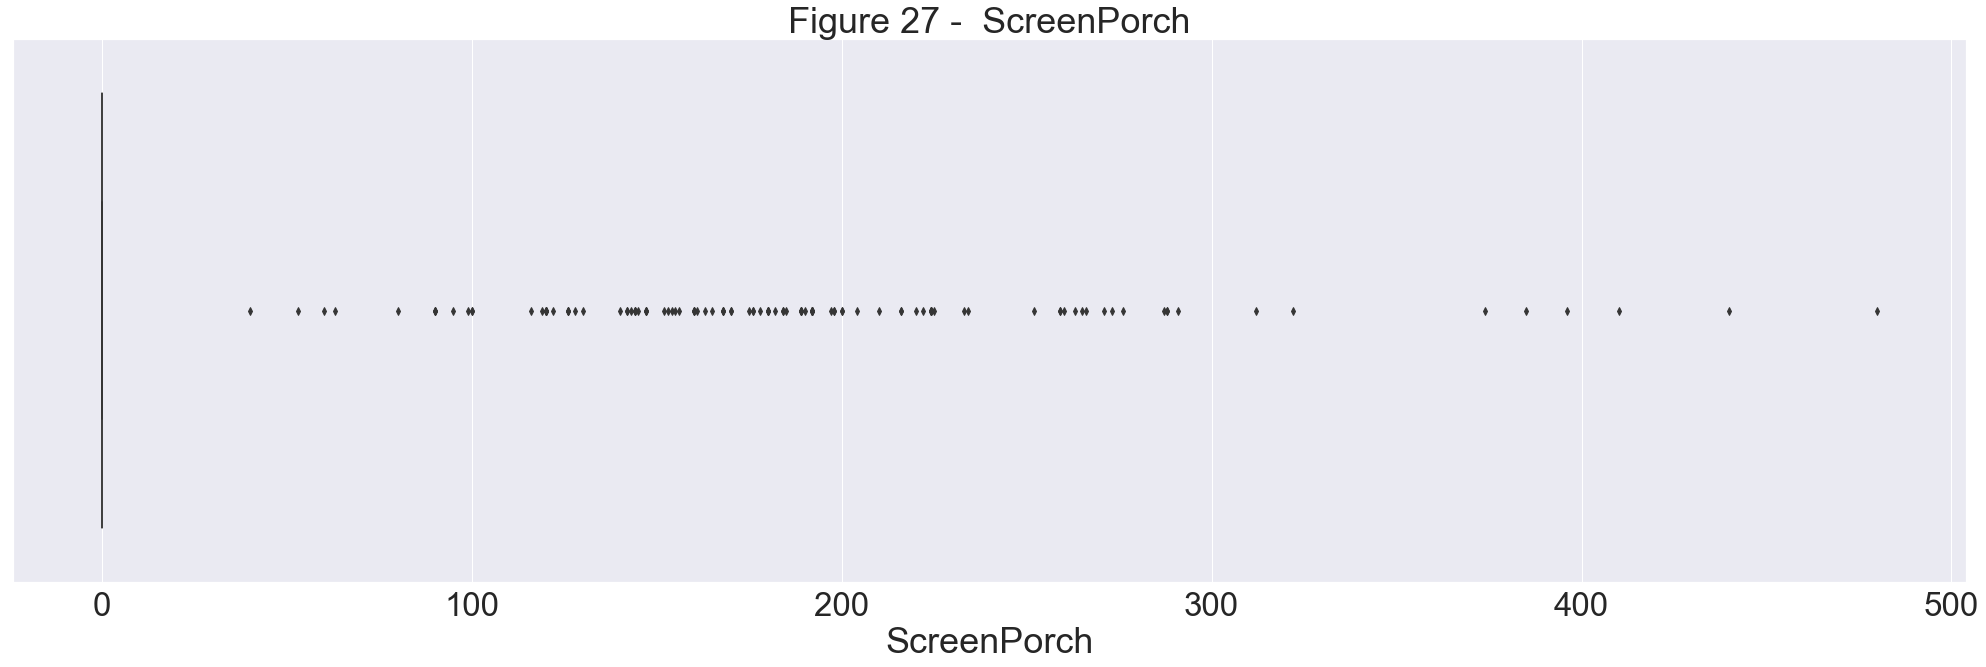

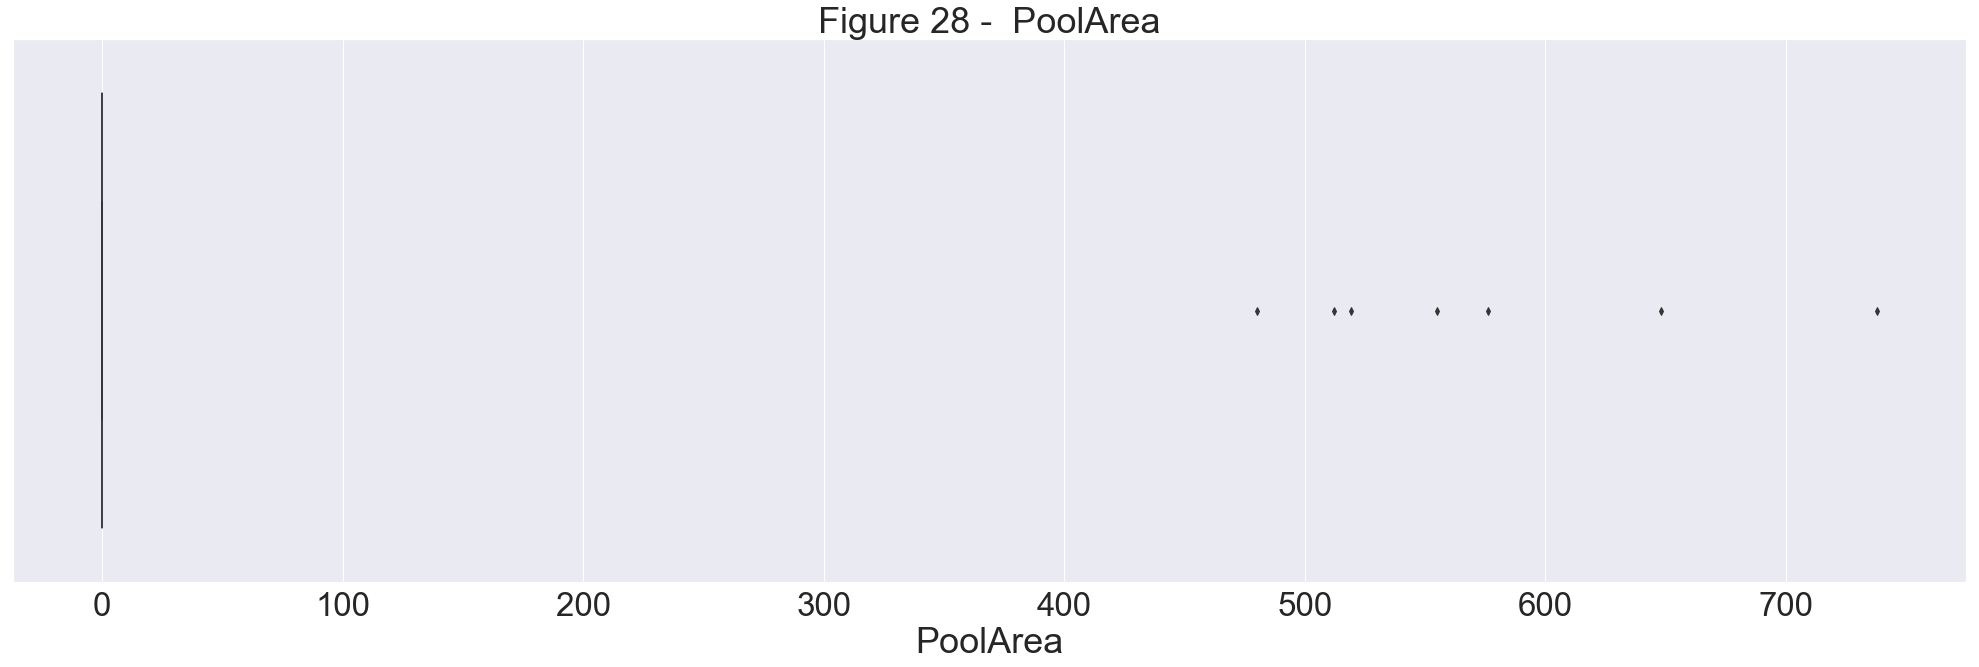

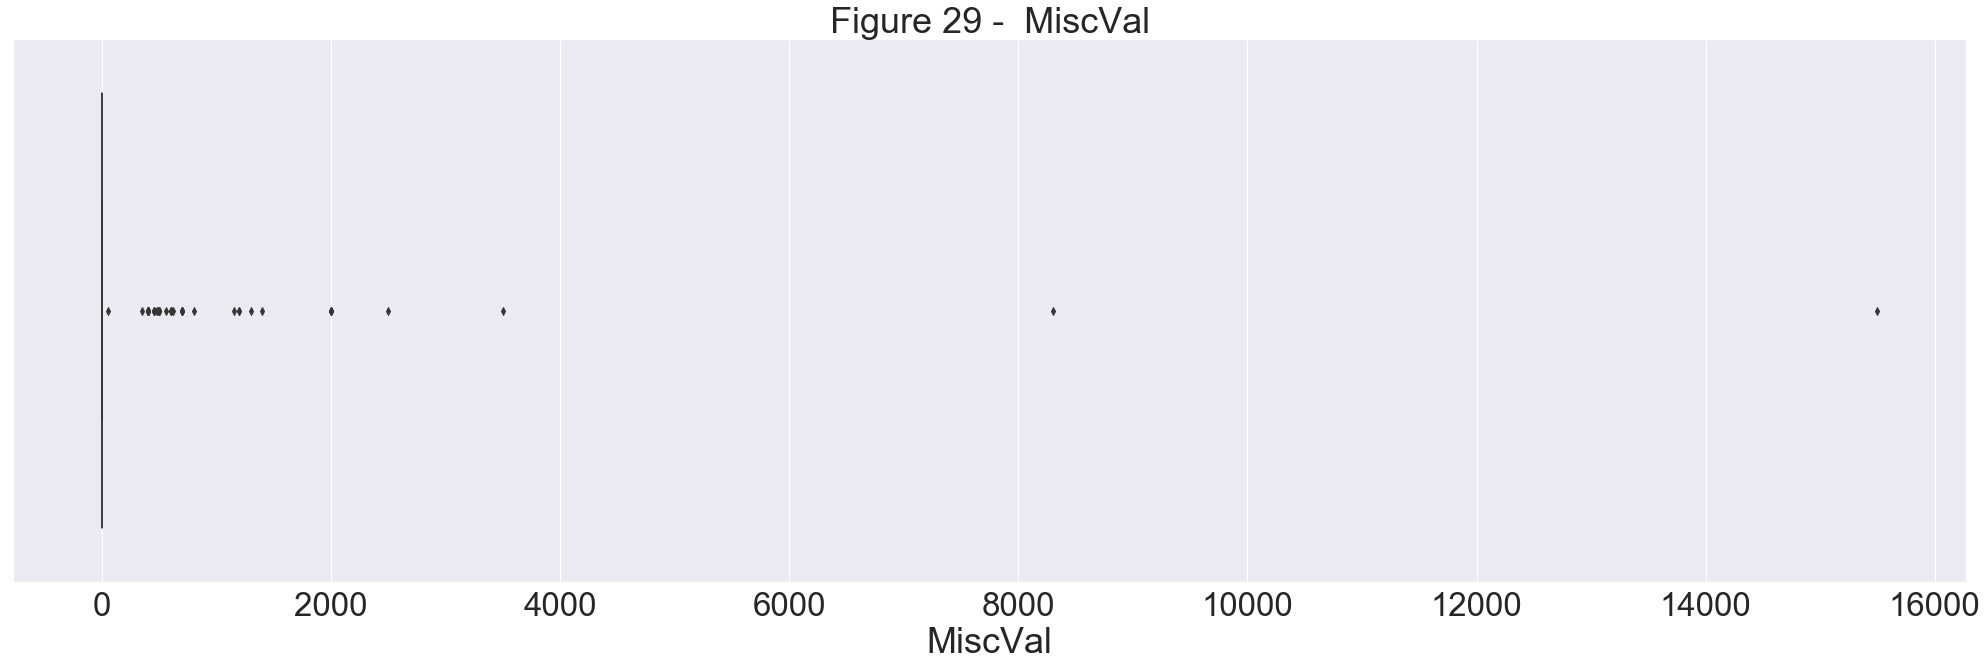

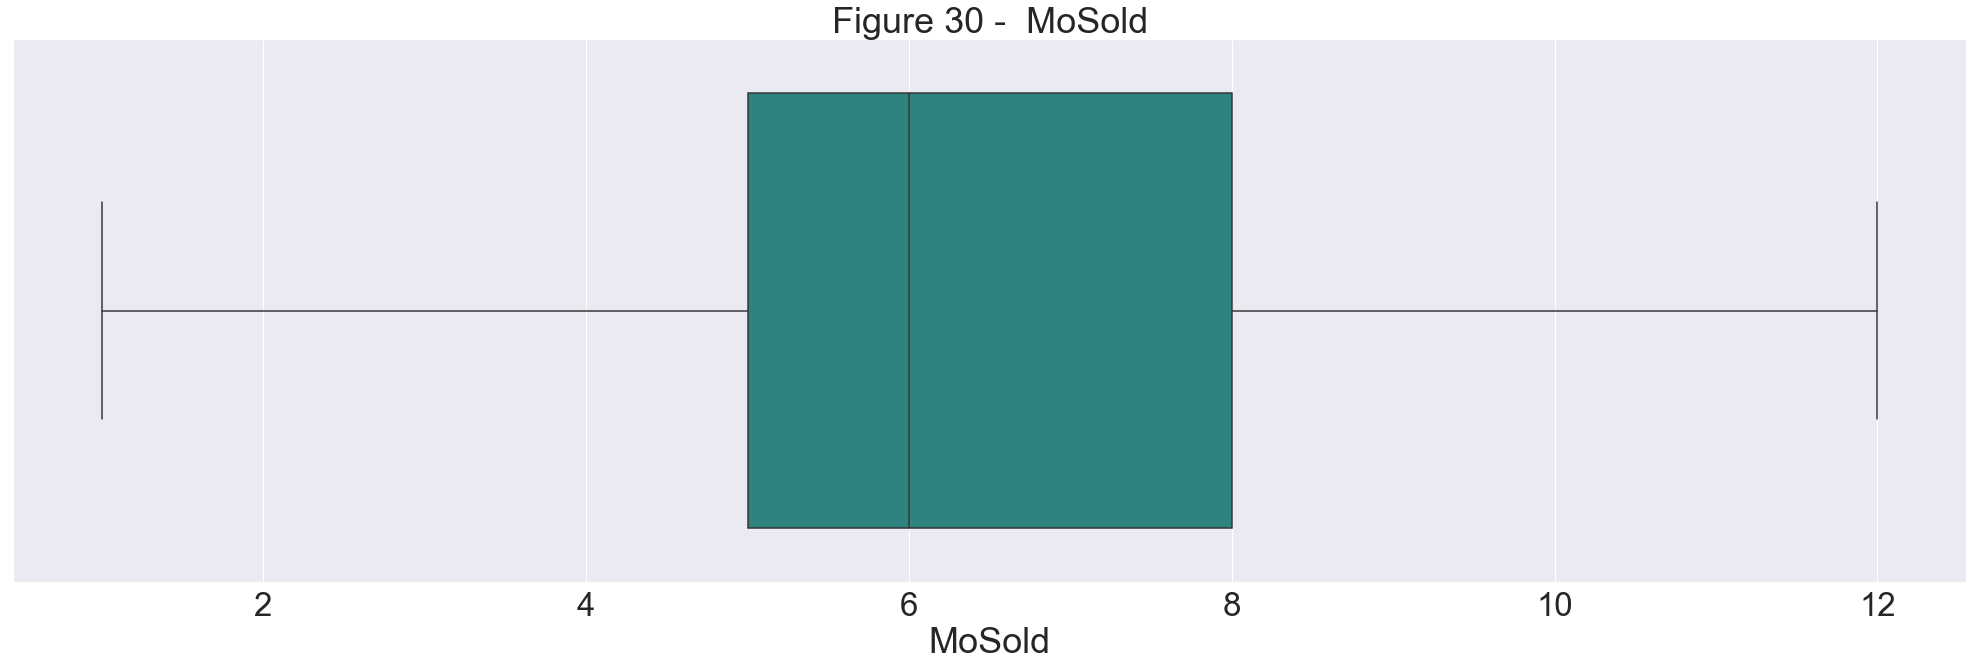

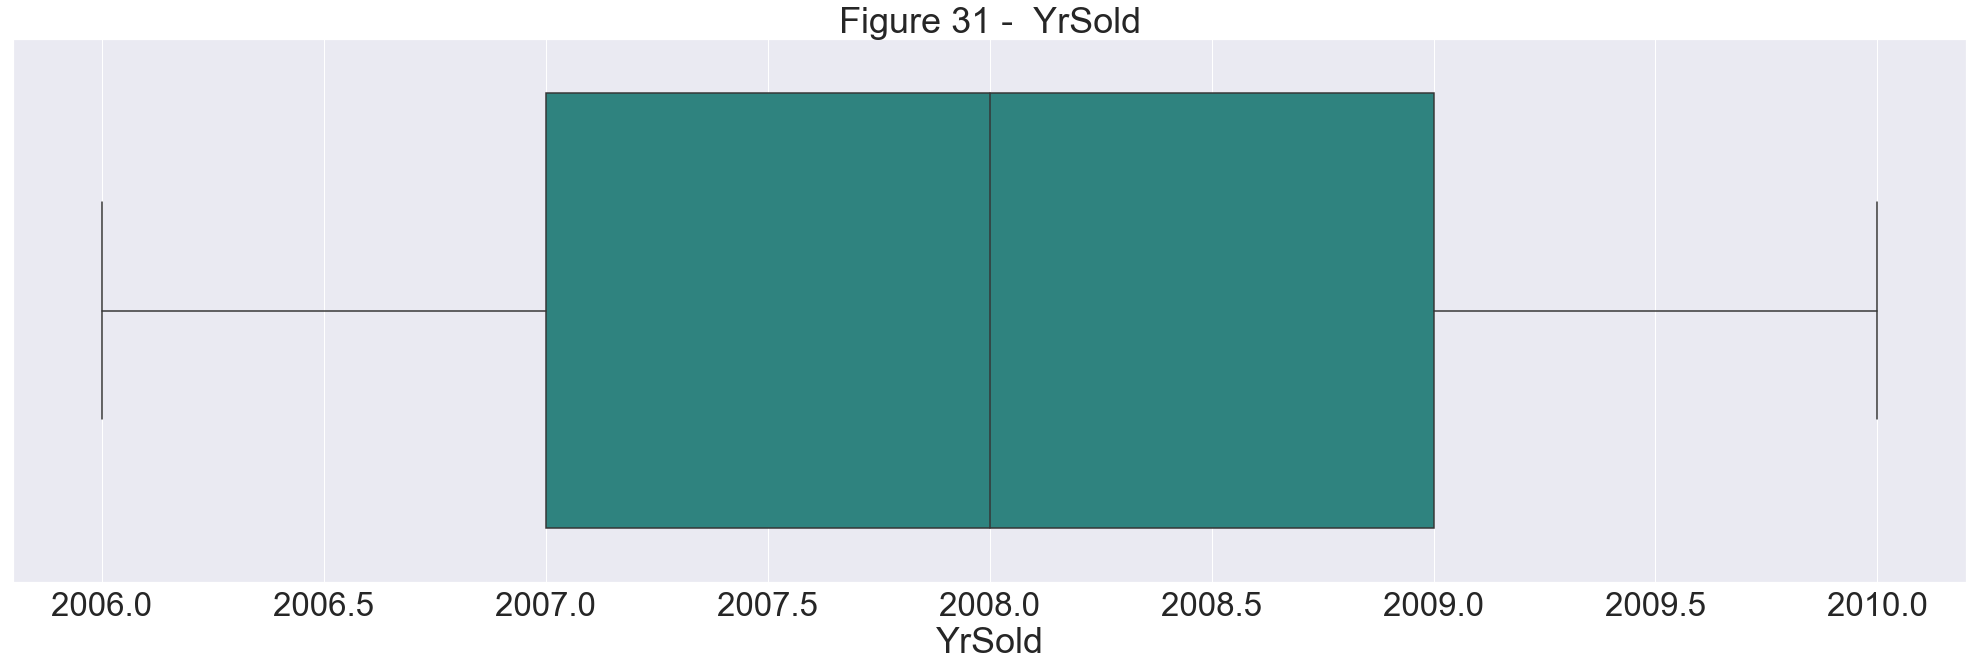

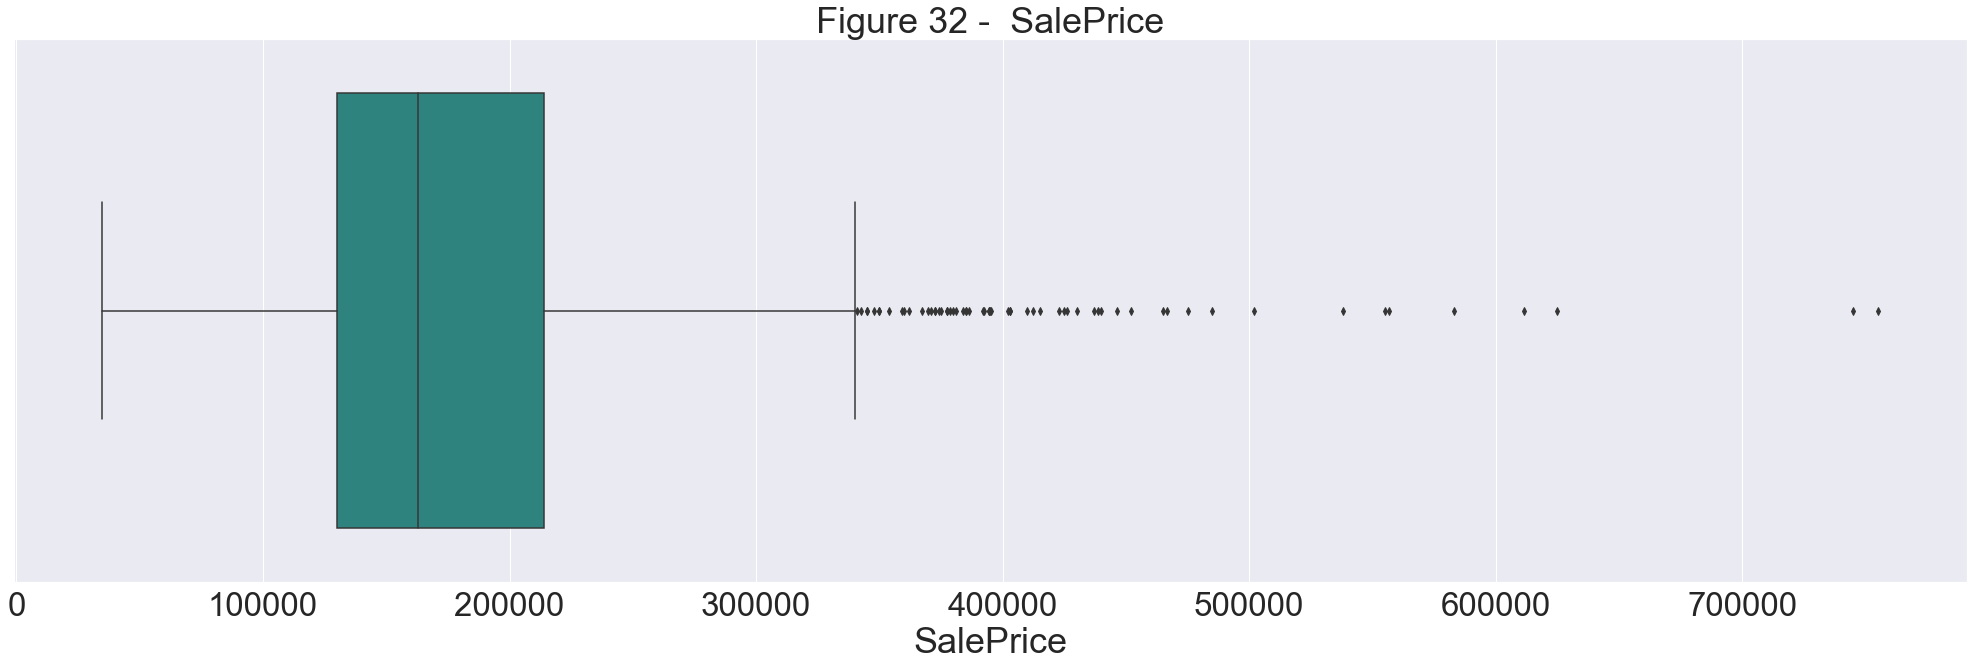

In [17]:
# Plot the box plot to check the outliers | Start 
i=1
for col in (df_viz.columns):
    if((df_viz[col].dtype == 'int64' or df_viz[col].dtype == 'float64') and col!='Id'):
        plotbox(col,i)
        i+=1
    
# There are multiple box plots (figure 1 to 33) created below

The boxplots for the columns shows the presence of outliers for each of the columns we will handle the outliers. The columns like <b> MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, KitchenAbvGr, BsmtHalfBath, LowQualFinSF, BsmtFinSF2 </b> have no data distribution but filled with outliers (as viewed from the dataset uisng boxplots), so lets check these columns first

In [18]:
## Check the distribution of data accross quantils | Start

for col in ['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2']:
    print("******** "+col+" ********")
    print("Quantiles:-\n")
    print(df_viz[col].quantile([0.75,0.90,0.95,0.97,0.99,1]))
    print("*************************")

## Check the distribution of data accross quantils | End

******** MiscVal ********
Quantiles:-

0.75        0.0
0.90        0.0
0.95        0.0
0.97      400.0
0.99      700.0
1.00    15500.0
Name: MiscVal, dtype: float64
*************************
******** PoolArea ********
Quantiles:-

0.75      0.0
0.90      0.0
0.95      0.0
0.97      0.0
0.99      0.0
1.00    738.0
Name: PoolArea, dtype: float64
*************************
******** ScreenPorch ********
Quantiles:-

0.75      0.00
0.90      0.00
0.95    160.00
0.97    192.00
0.99    268.05
1.00    480.00
Name: ScreenPorch, dtype: float64
*************************
******** 3SsnPorch ********
Quantiles:-

0.75      0.0
0.90      0.0
0.95      0.0
0.97      0.0
0.99    168.0
1.00    508.0
Name: 3SsnPorch, dtype: float64
*************************
******** EnclosedPorch ********
Quantiles:-

0.75      0.00
0.90    112.00
0.95    180.15
0.97    216.00
0.99    261.05
1.00    552.00
Name: EnclosedPorch, dtype: float64
*************************
******** KitchenAbvGr ********
Quantiles:-

0.75    1.0

<center> <b> We can see that 90-97% of the data has value as Zero in the features: LowQualFinSF,BsmtHalfBath,3SsnPorch,ScreenPorch,PoolArea,MiscVal and thus these columns will not help me to capture much of the variations in the data. He will go ahead to remove these columns from dataset </b></center>

In [19]:
## Drop the columns from the dataset which are not capturing variation in the data | Start
df_viz=df_viz.drop(['LowQualFinSF','BsmtHalfBath','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1)
## Drop the columns from the dataset which are not capturing variation in the data  | End

In [20]:
df_viz.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='ob

### <b><center> Handling the Outliers </center> </b>
    Handling the outliers is necessary for better prediction, which will definitely impact the accuracy of the prediction

In [21]:
## **** As there are outliers present in the SalePrice Column, we filter out till 99% percentile | Start ******
print(df_viz.SalePrice.quantile([0.5,0.75,0.90,0.95,0.97,0.99,1]))
df_viz=df_viz[df_viz.SalePrice<=round(df_viz.SalePrice.quantile(0.99),2)]
## **** As there are outliers present in the SalePrice Column, we filter out till 99% percentile | End ******
df_viz.shape

0.50    163000.00
0.75    214000.00
0.90    278000.00
0.95    326100.00
0.97    374230.00
0.99    442567.01
1.00    755000.00
Name: SalePrice, dtype: float64


(1445, 65)

In [22]:
## **** As there are outliers present in the BsmtFinSF2 Column, we filter out till 99% percentile | End ******
df_viz=df_viz[df_viz.BsmtFinSF2<=round(df_viz.BsmtFinSF2.quantile(0.99),2)]
## **** As there are outliers present in the BsmtFinSF2 Column, we filter out till 99% percentile | End ******
df_viz.shape

(1430, 65)

In [23]:
## **** As there are outliers present in the EnclosedPorch Column, we filter out till 99% percentile | End ******
df_viz=df_viz[df_viz.EnclosedPorch<=round(df_viz.EnclosedPorch.quantile(0.99),2)]
## **** As there are outliers present in the EnclosedPorch Column, we filter out till 99% percentile | End ******
df_viz.shape

(1415, 65)

In [24]:
df_viz=df_viz[df_viz.LotArea<=round(df_viz.LotArea.quantile(0.99),2)]
## **** As there are outliers present in the LotArea Column, we filter out till 99% percentile | End ******
df_viz=df_viz[df_viz.LotArea<=round(df_viz.LotArea.quantile(0.99),2)]
## **** As there are outliers present in the LotArea Column, we filter out till 99% percentile | End ******
df_viz.shape

(1386, 65)

In [25]:
print(df_viz.LotFrontage.quantile([0.5,0.75,0.90,0.95,0.97,0.99,1]))

0.50     70.049958
0.75     78.000000
0.90     90.000000
0.95    100.750000
0.97    110.000000
0.99    129.150000
1.00    182.000000
Name: LotFrontage, dtype: float64


In [26]:
df_viz=df_viz[df_viz.MasVnrArea<=round(df_viz.MasVnrArea.quantile(0.99),2)]
## **** As there are outliers present in the MasVnrArea Column, we filter out till 99% percentile | End ******
df_viz=df_viz[df_viz.MasVnrArea<=round(df_viz.MasVnrArea.quantile(0.99),2)]
## **** As there are outliers present in the MasVnrArea Column, we filter out till 99% percentile | End ******
df_viz.shape

(1358, 65)

In [27]:
df_viz=df_viz[df_viz.LotFrontage<=round(df_viz.LotFrontage.quantile(0.99),2)]
## **** As there are outliers present in the LotFrontage Column, we filter out till 99% percentile | End ******
df_viz=df_viz[df_viz.LotFrontage<=round(df_viz.LotFrontage.quantile(0.99),2)]
## **** As there are outliers present in the LotFrontage Column, we filter out till 99% percentile | End ******
df_viz.shape

(1335, 65)

<b> <center> There are some year columns we can change the column to calculate the years between current year </center></b>

In [28]:
yearCol = ['YrSold','YearBuilt', 'YearRemodAdd']

## ******* calculate the sold time from current year  *******  | Start ******* 
df_viz['SoldYr'] = df_viz['YrSold'].apply(lambda x: 2019 - x)
## ******* calculate the sold time from current year  *******  | End ******* 

## ******* calculate the built time from current year  *******  | Start ******* 
df_viz['BuiltTime'] = df_viz['YearBuilt'].apply(lambda x: 2019 - x)
## ******* calculate the built time from current year  *******  | End ******* 


## ******* calculate the if the house is rebuilt from rebuilt year  *******  | Start ******* 
df_viz['Remodelled'] = df_viz.apply(lambda x: remod(x.YearBuilt,x.YearRemodAdd),axis=1)
## ******* calculate the if the house is rebuilt from rebuilt year  *******  | End ******* 


## ******* Delete the year columns after the calculations | Start ******* 
df_viz = df_viz.drop(['YrSold','YearBuilt', 'YearRemodAdd'],axis=1)
## ******* Delete the year columns after the calculations | End ******* 

In [29]:
## Get the numeric columns and categorical columns | Start
numCol = []
catCol = []

for col in df_viz.columns:
    if df_viz[col].dtype == 'int64' or df_viz[col].dtype == 'float64':
        numCol.append(col)
    else:
        catCol.append(col)
# Get the numeric columns and categorical columns | Start

In [30]:
len(numCol)+len(catCol)

65

In [31]:
for col in numCol:
    print("******** "+col+" ********")
    print("Quantiles:-\n")
    print(df_viz[col].quantile([0.75,0.90,0.95,0.97,0.99,1]))
    print("*************************")

******** Id ********
Quantiles:-

0.75    1090.50
0.90    1313.60
0.95    1388.30
0.97    1415.98
0.99    1444.66
1.00    1460.00
Name: Id, dtype: float64
*************************
******** MSSubClass ********
Quantiles:-

0.75     70.0
0.90    120.0
0.95    160.0
0.97    160.0
0.99    190.0
1.00    190.0
Name: MSSubClass, dtype: float64
*************************
******** LotFrontage ********
Quantiles:-

0.75     77.00
0.90     88.00
0.95     96.00
0.97    101.00
0.99    111.66
1.00    120.00
Name: LotFrontage, dtype: float64
*************************
******** LotArea ********
Quantiles:-

0.75    11196.00
0.90    13356.00
0.95    14868.90
0.97    16320.28
0.99    19828.60
1.00    23595.00
Name: LotArea, dtype: float64
*************************
******** OverallQual ********
Quantiles:-

0.75     7.0
0.90     8.0
0.95     8.0
0.97     8.0
0.99     9.0
1.00    10.0
Name: OverallQual, dtype: float64
*************************
******** OverallCond ********
Quantiles:-

0.75    6.0
0.90    

In [32]:
df_viz.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   

  Utilities LotConfig  ... WoodDeckSF OpenPorchSF EnclosedPorch MoSold  \
0    AllPub    Inside  ...          0          61             0      2   
1    AllPub       FR2  ...        298           0             0      5   
2    AllPub    Inside  ...          0          42             0      9   
4    AllPub       FR2  ...        192          84             0     12   
5    AllPub    Inside  ...         40          30             0     10   

  SaleType SaleCondition  SalePrice  SoldYr BuiltTime Remodelled  
0       WD        Normal     208500      11        16         No  
1       WD        Normal     181500      12        43         No  
2       WD        Normal     223500      11        18        Yes  
4       WD        Normal     250000      11        19         No  
5       WD        Normal     143000      10        26        Yes  

[5 rows x 65 columns]

## 3. Data Visualization

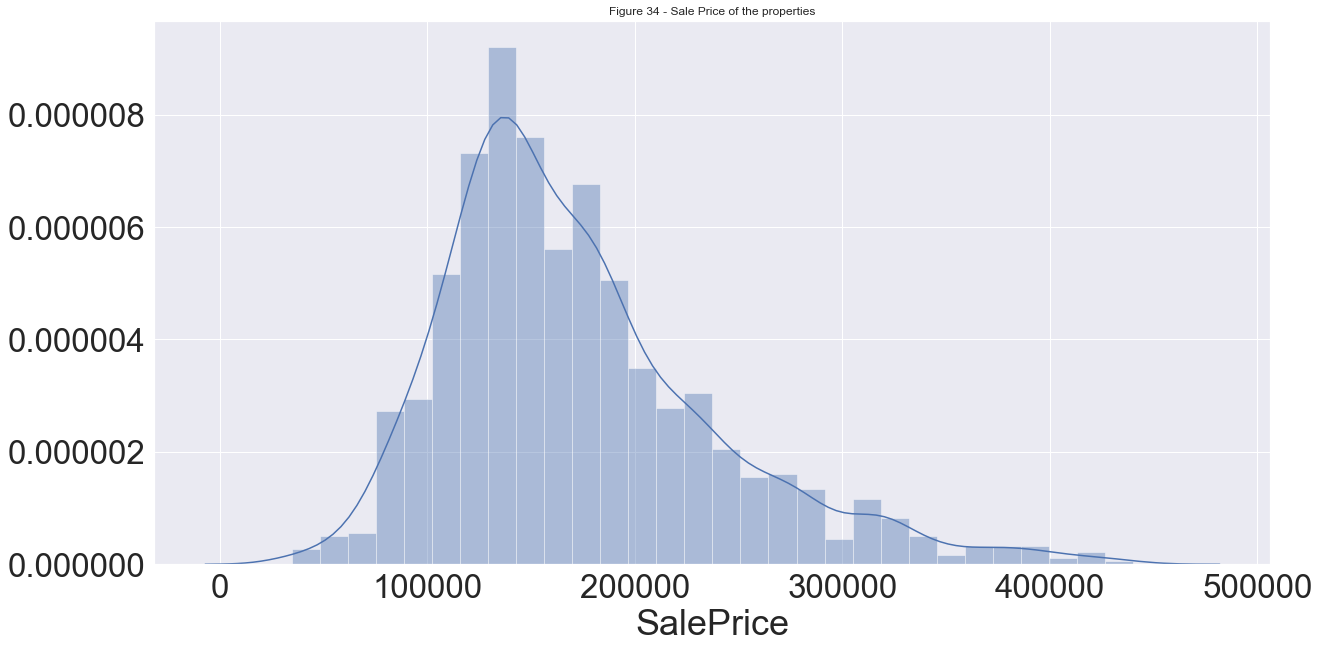

In [33]:
#### Plotting sales price | Start ####
plt.figure(figsize=(20,10))
sns.distplot(df_viz.SalePrice)
sns.set(font_scale=1)
plt.title("Figure 34 - Sale Price of the properties")
plt.show()
#### Plotting sales price | End ####

##### <center> We can definitely see that there are some outliers in the Sales Price distribution and skewed to the right </center>

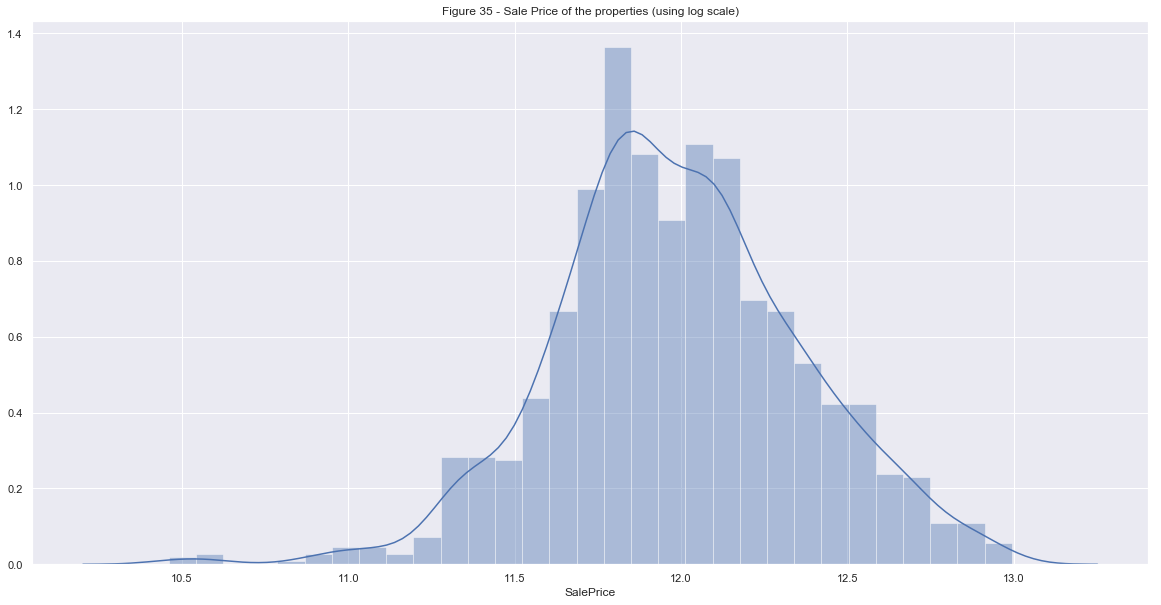

In [34]:
#### Plotting sales price (log) | Start ####
plt.figure(figsize=(20,10))
sns.distplot(np.log(df_viz.SalePrice))
sns.set(font_scale=1)
plt.title("Figure 35 - Sale Price of the properties (using log scale)")
plt.show()
#### Plotting sales price (log) | End ####

In [35]:
## Check the quantiles of Sales Price | Start
df_viz['SalePrice'].quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.97,1])
## Check the quantiles of Sales Price | End

0.10    105000.00
0.25    128000.00
0.50    158000.00
0.75    203000.00
0.90    264389.40
0.95    310000.00
0.97    325617.52
1.00    440000.00
Name: SalePrice, dtype: float64

In [36]:
df_viz['SalePrice_bin']=df_viz.SalePrice.apply(lambda x: salesBinning(x))

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

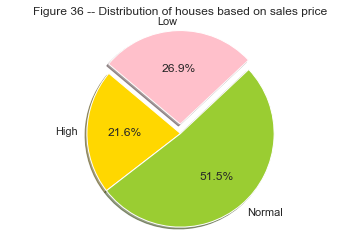

In [37]:
## ***** Check the distribution of houses against sales price | Start **********
labels = ['High','Normal','Low']
sizes = [df_viz[(df_viz.SalePrice_bin=='High')].Id.count(),df_viz[(df_viz.SalePrice_bin=='Normal')].Id.count(),df_viz[(df_viz.SalePrice_bin=='Low')].Id.count()]
colors = ['gold', 'yellowgreen','pink']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140,explode=[0.0,0.,0.1])
plt.axis('equal')
plt.title('Figure 36 -- Distribution of houses based on sales price')
plt.plot
## ***** Check the distribution of houses against sales price | End **********

<b> Comments: </b> <center> The number of houses with Normal sales price is around 50% and rest is divided among High and Low priced houses

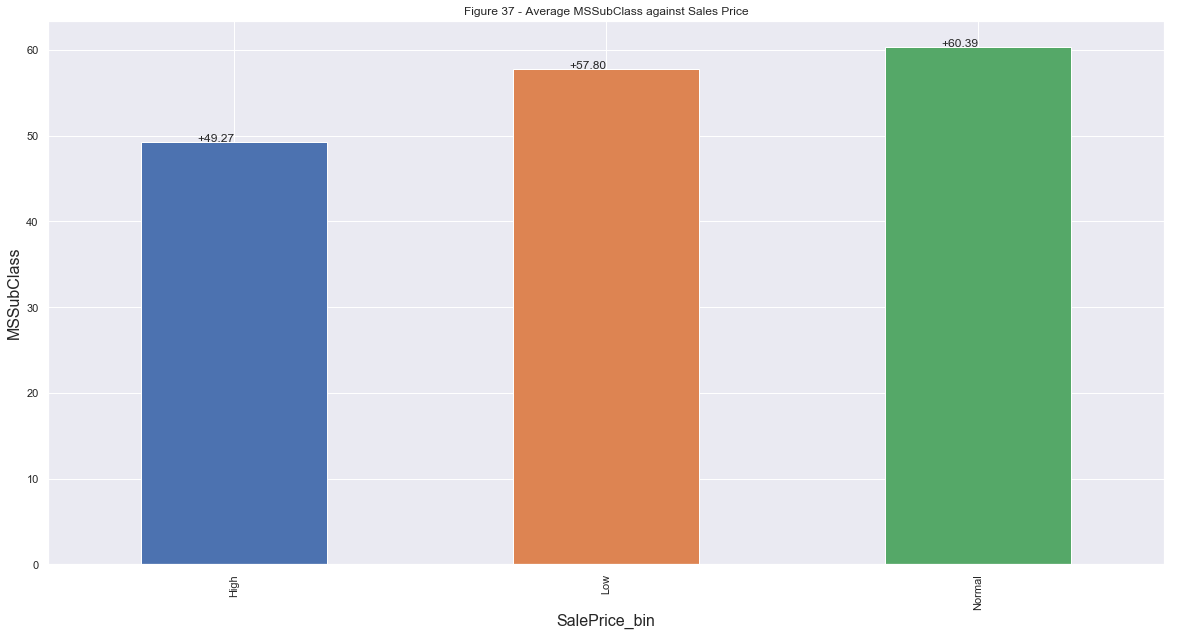

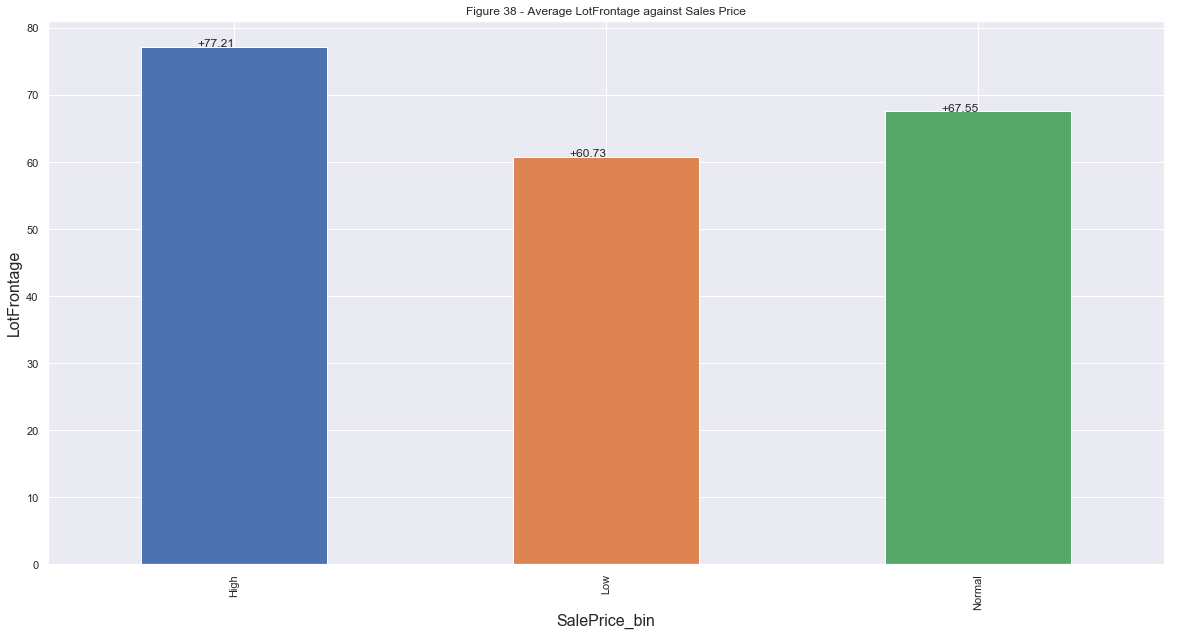

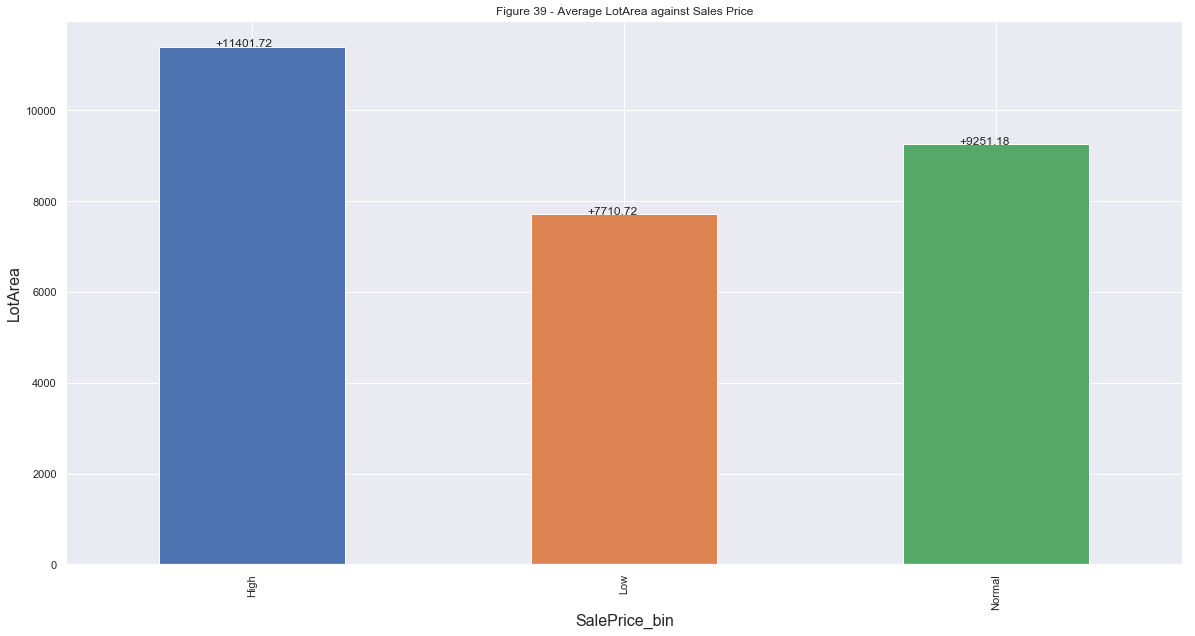

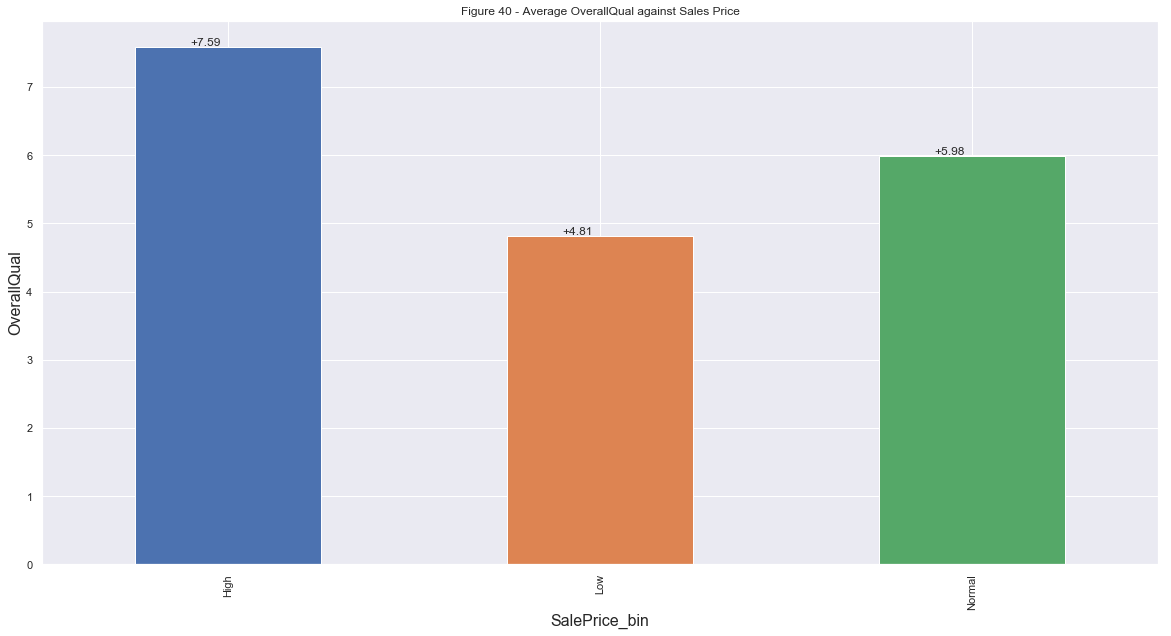

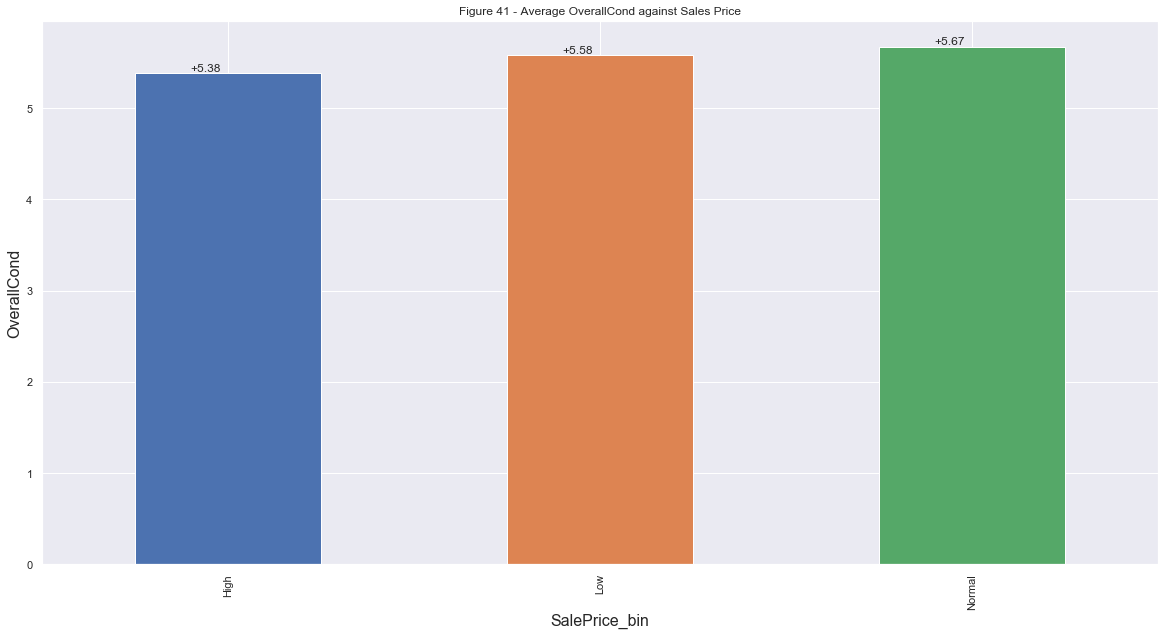

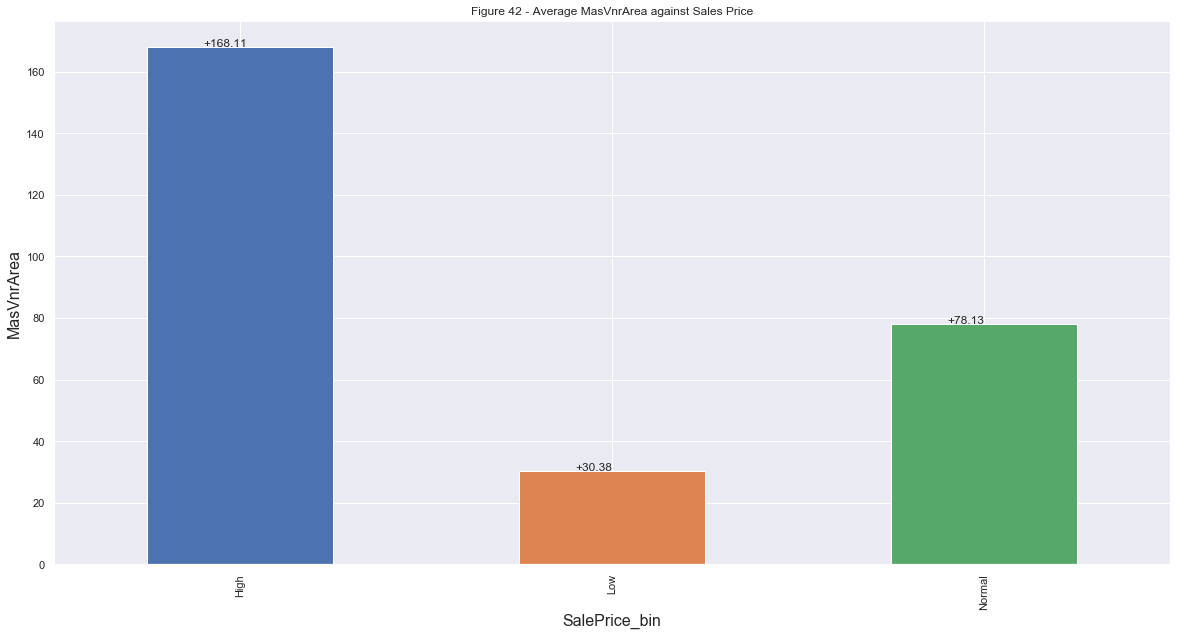

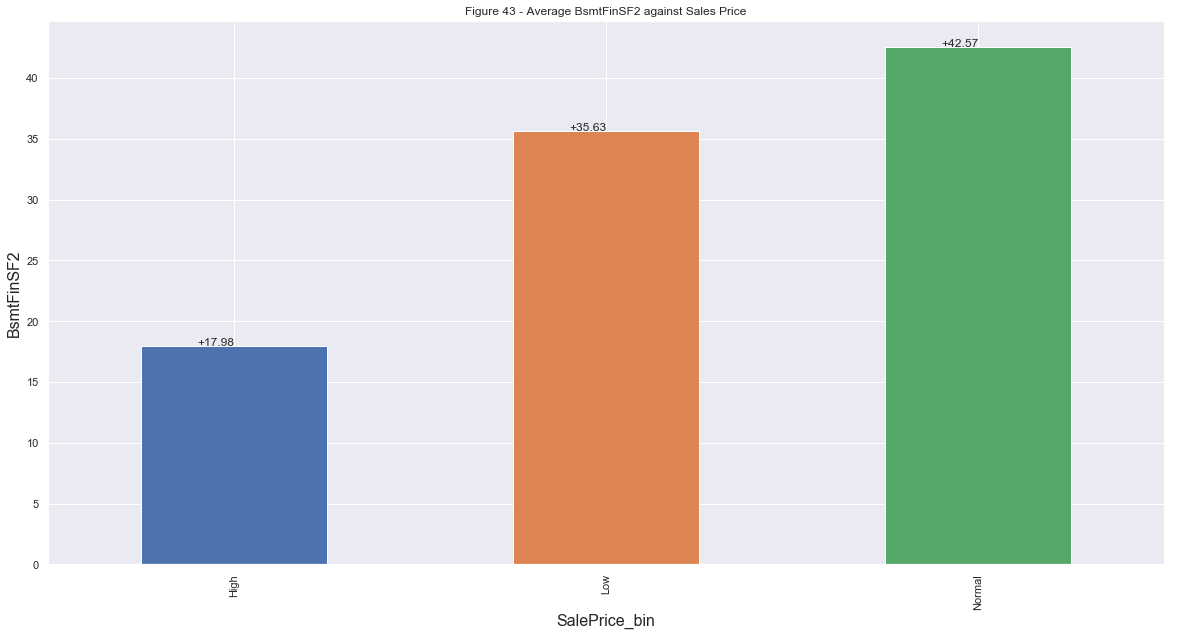

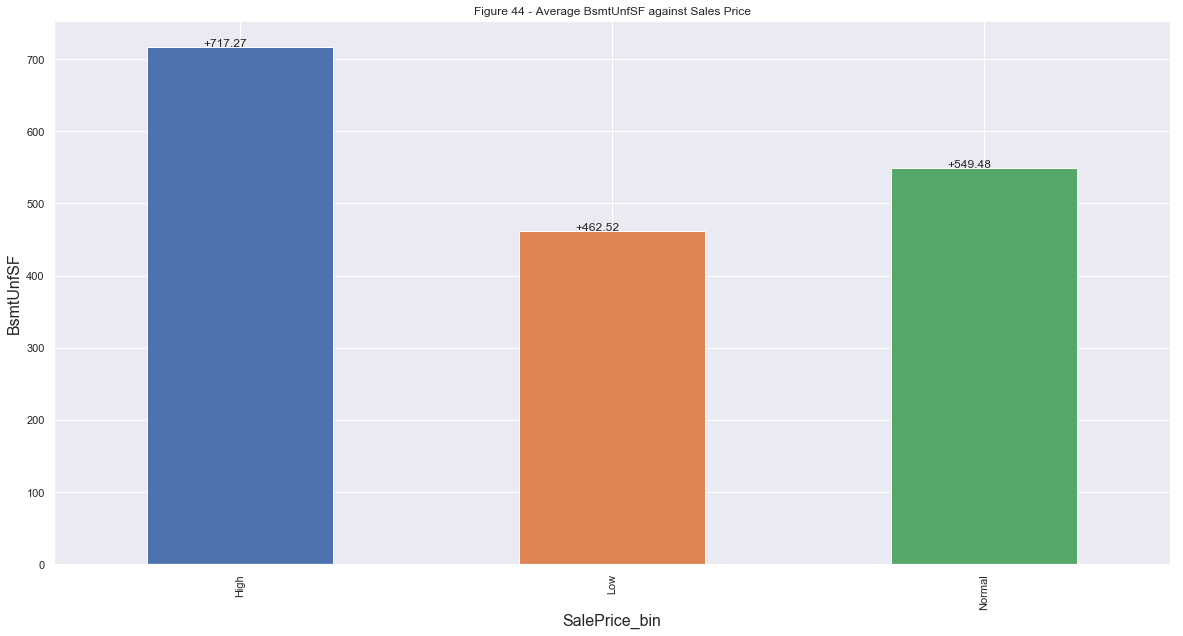

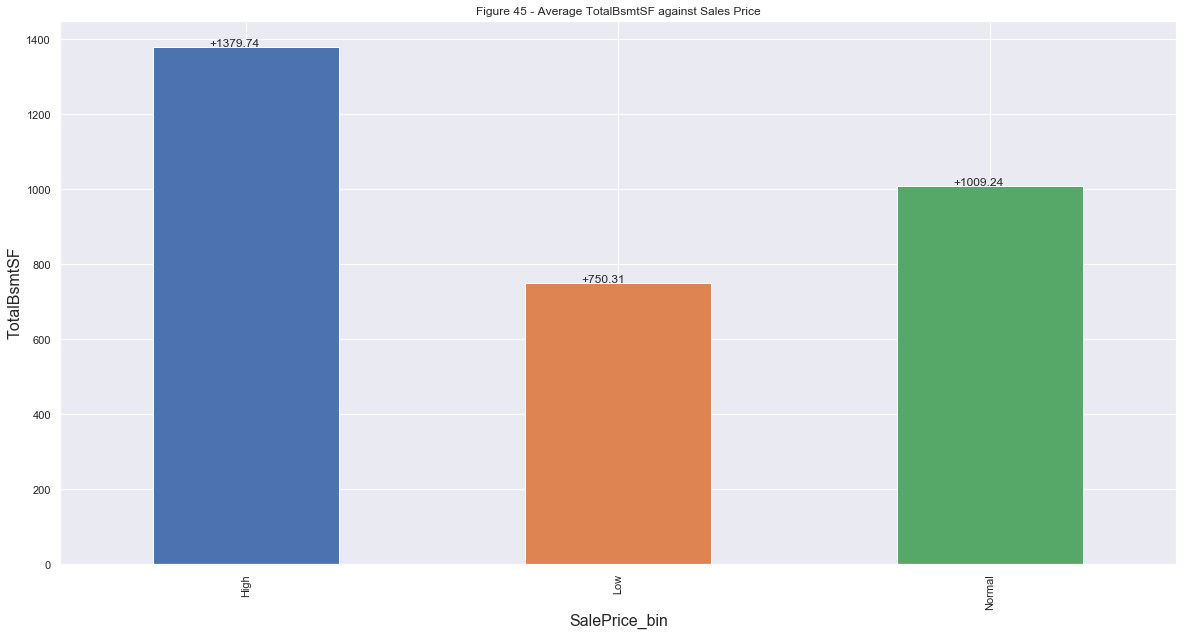

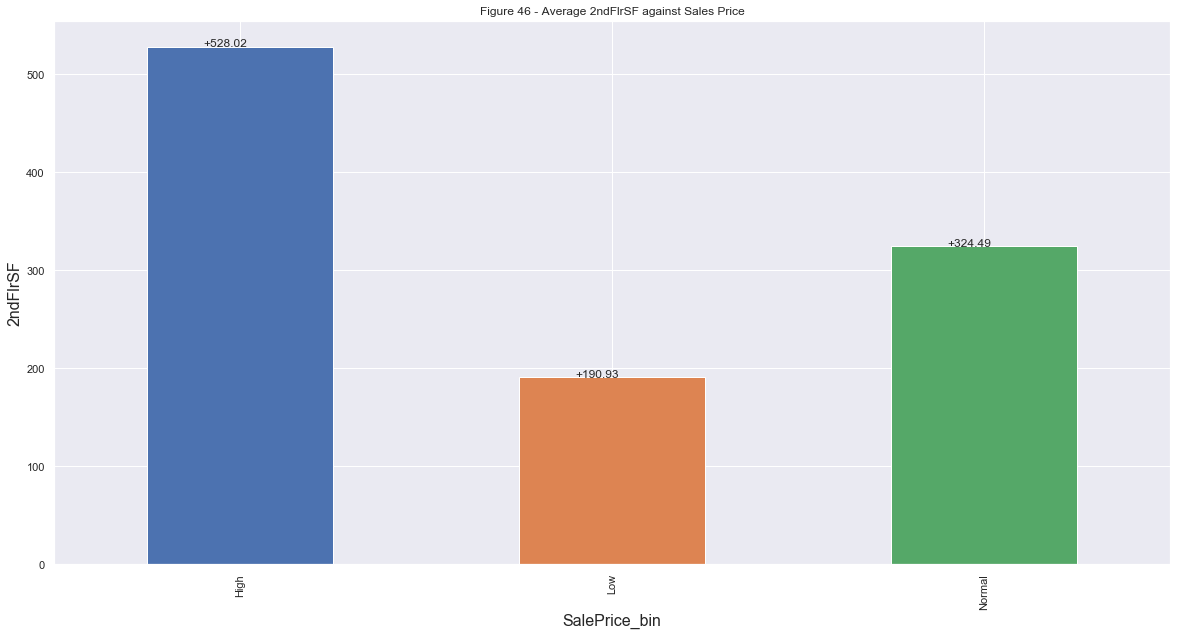

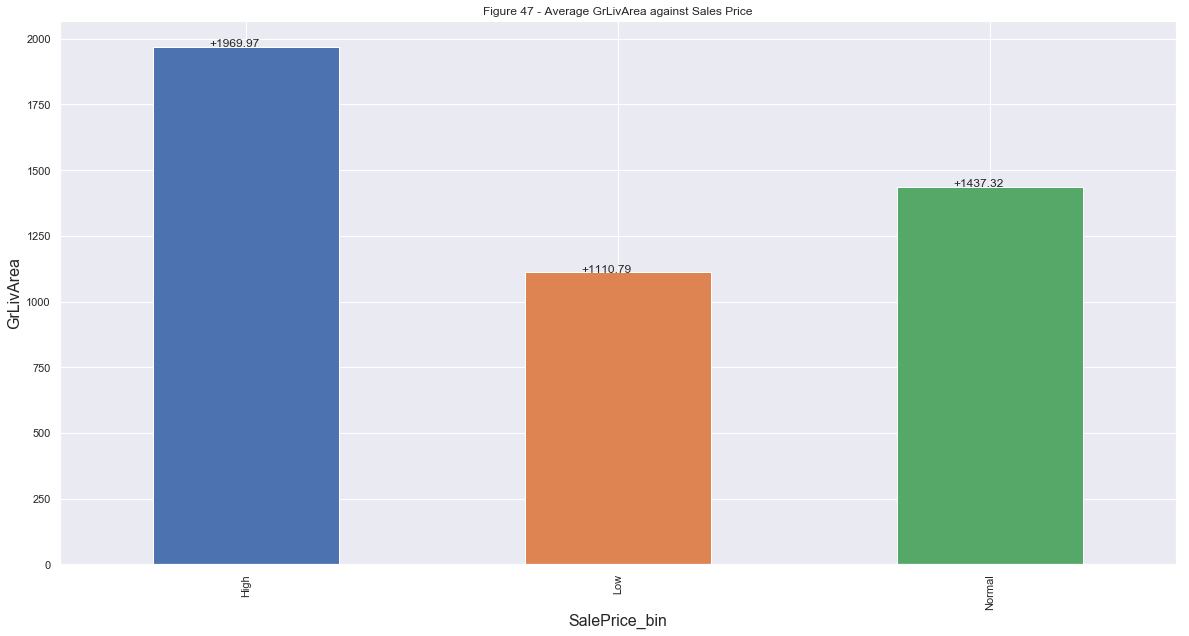

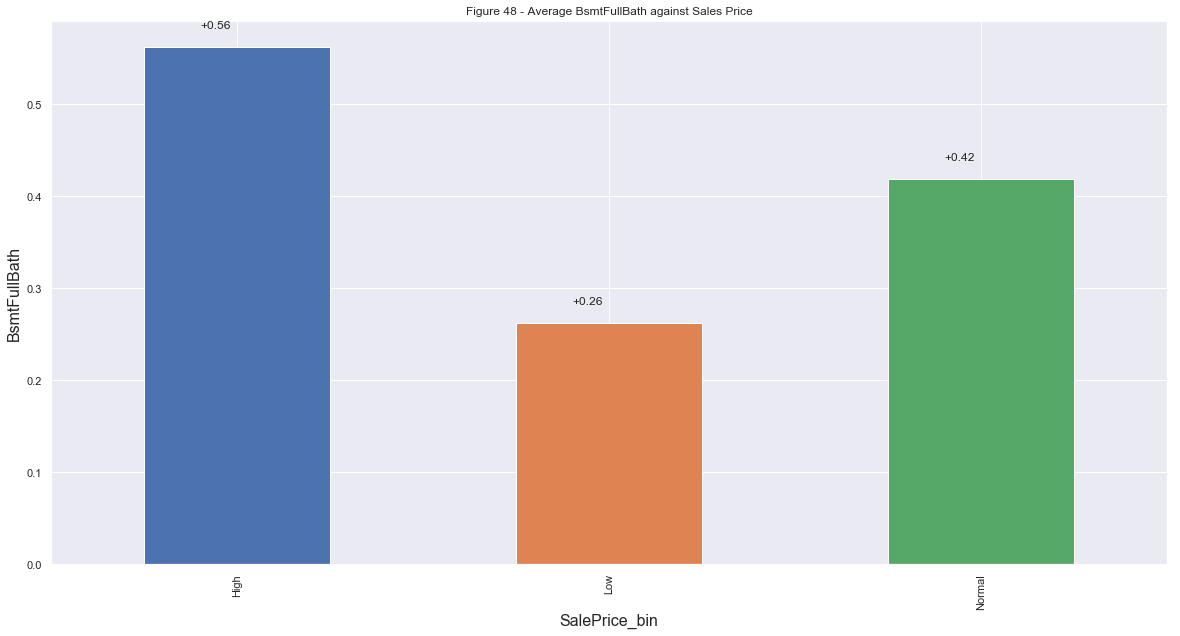

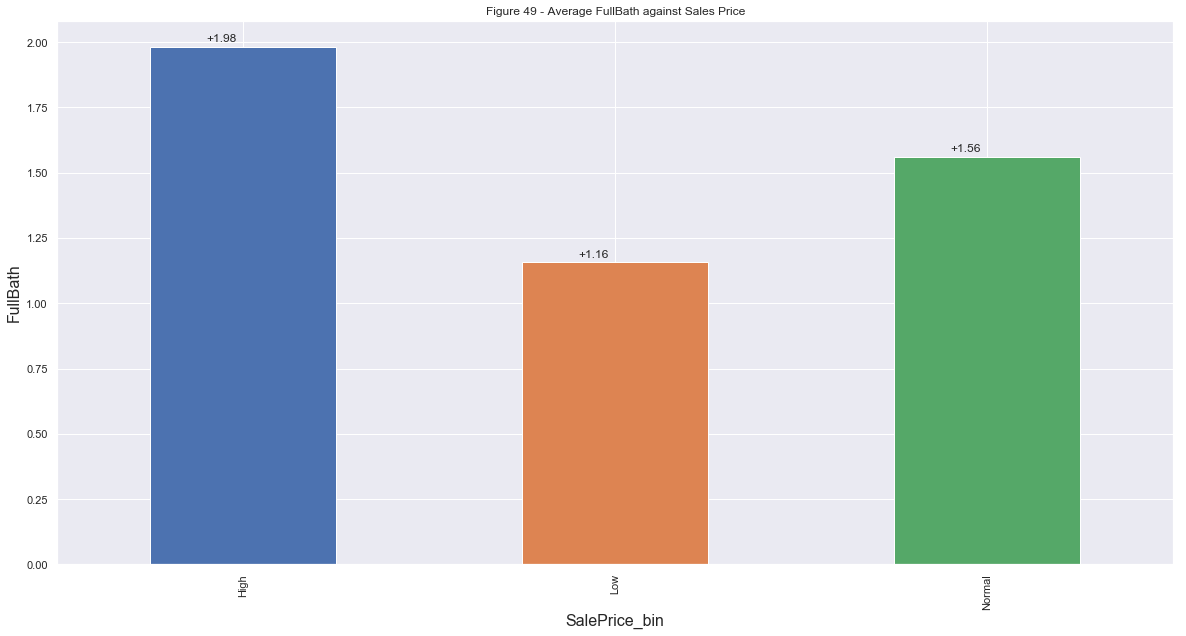

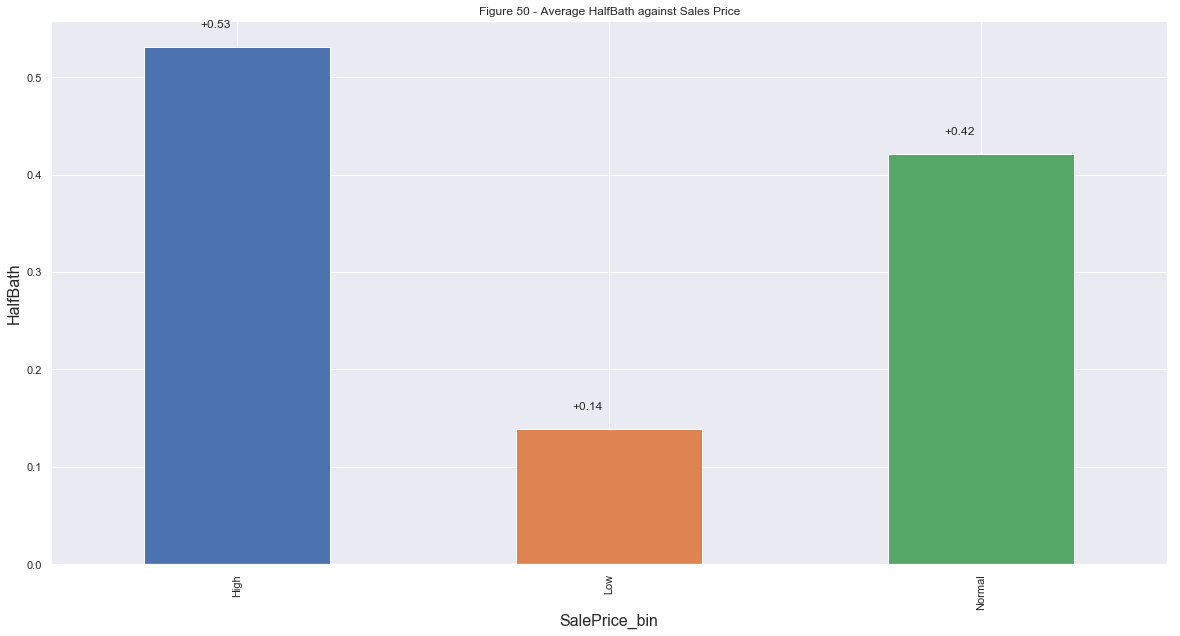

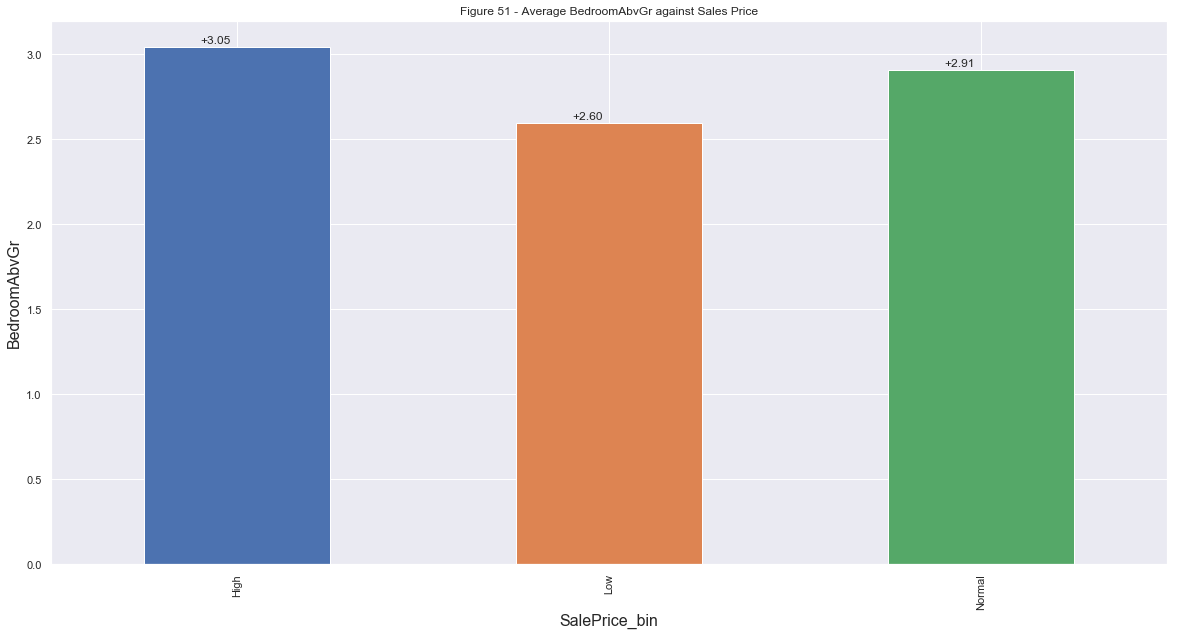

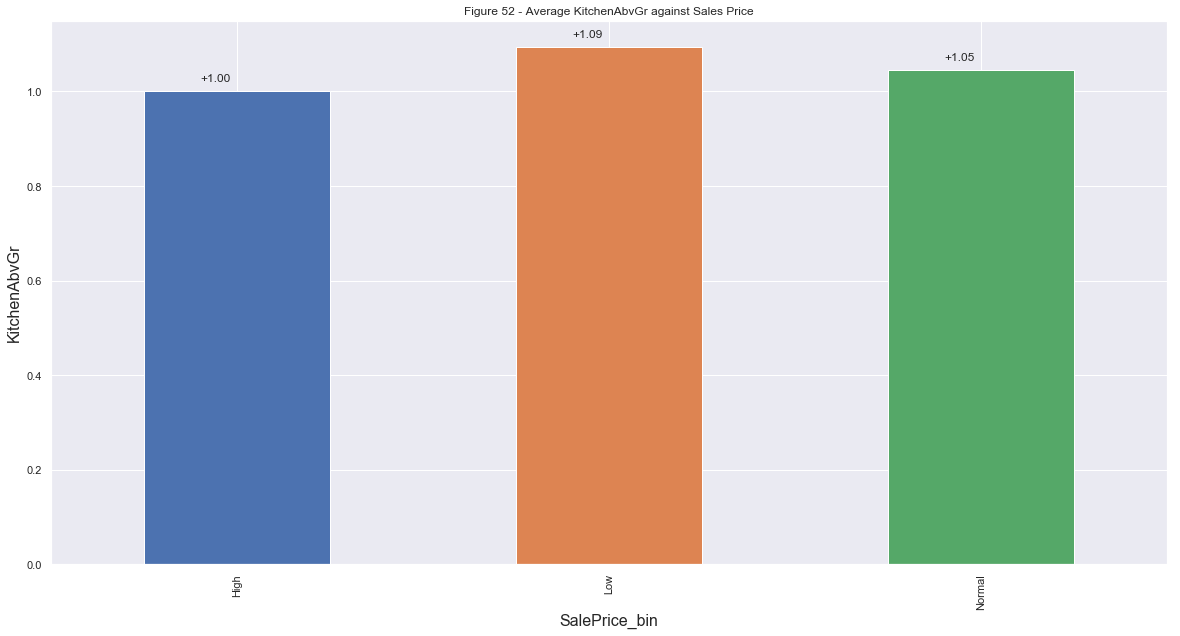

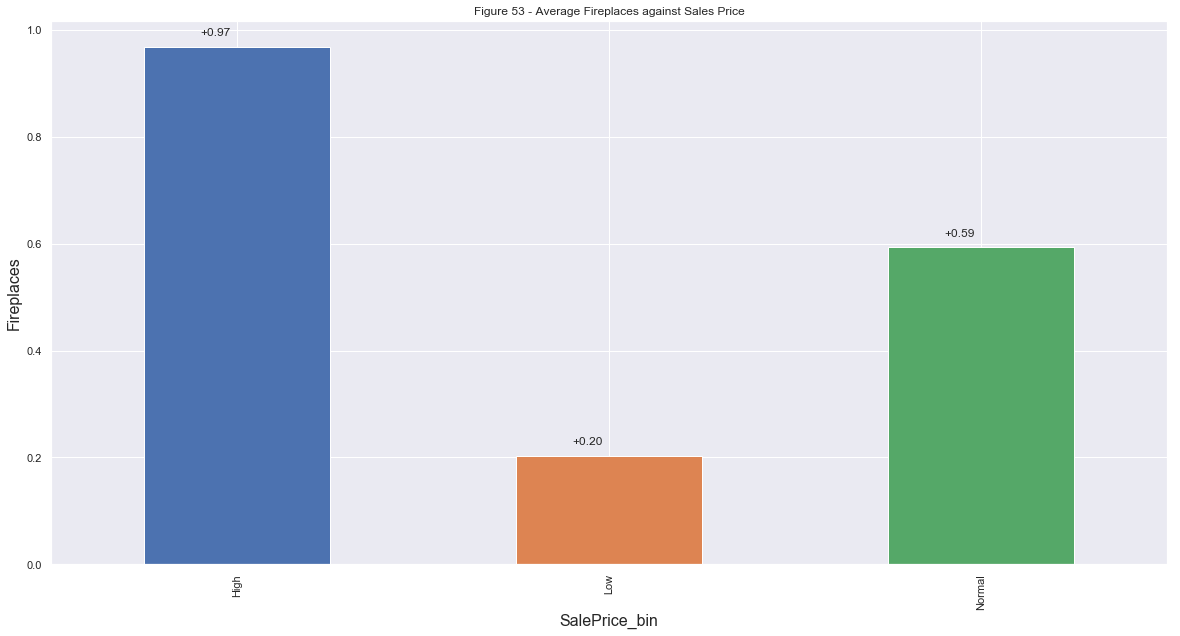

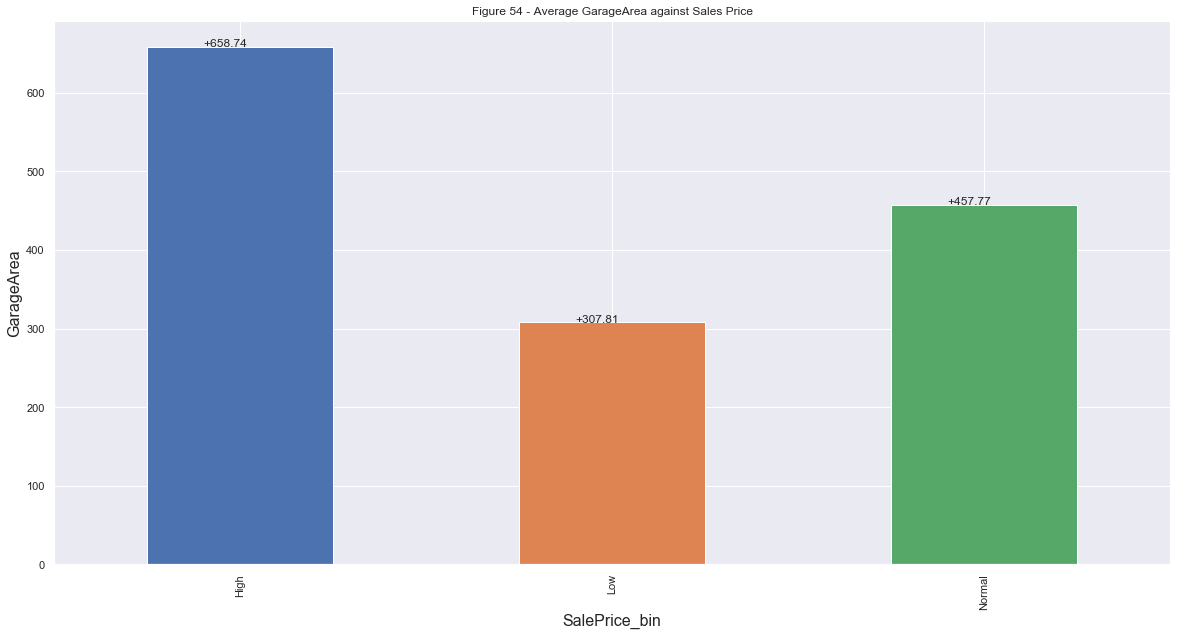

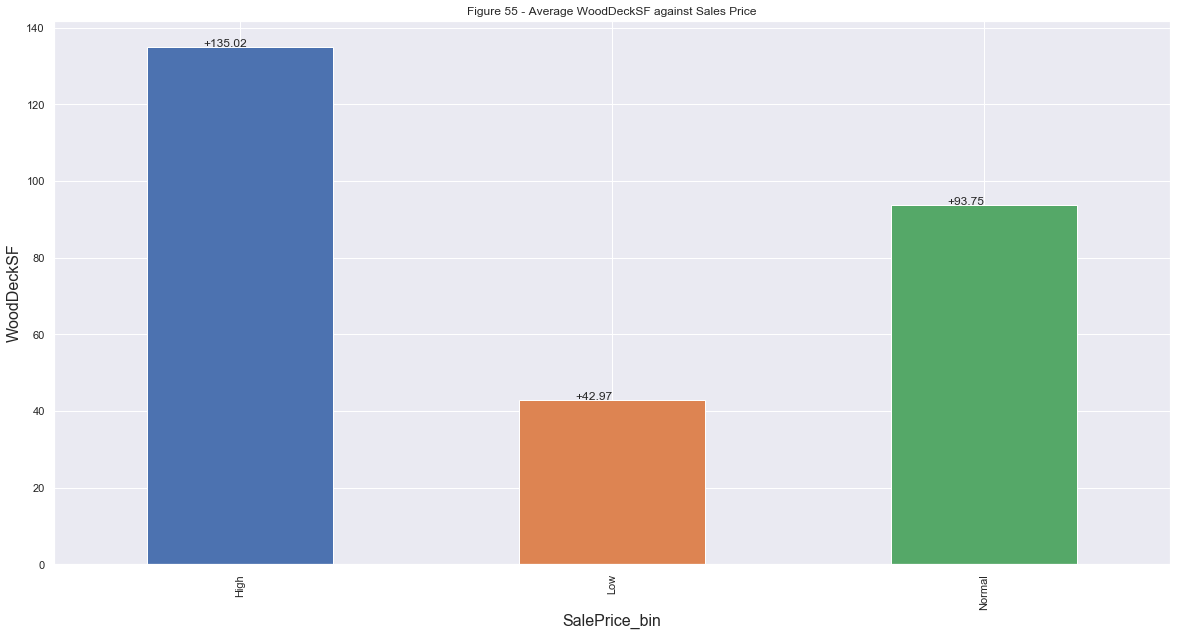

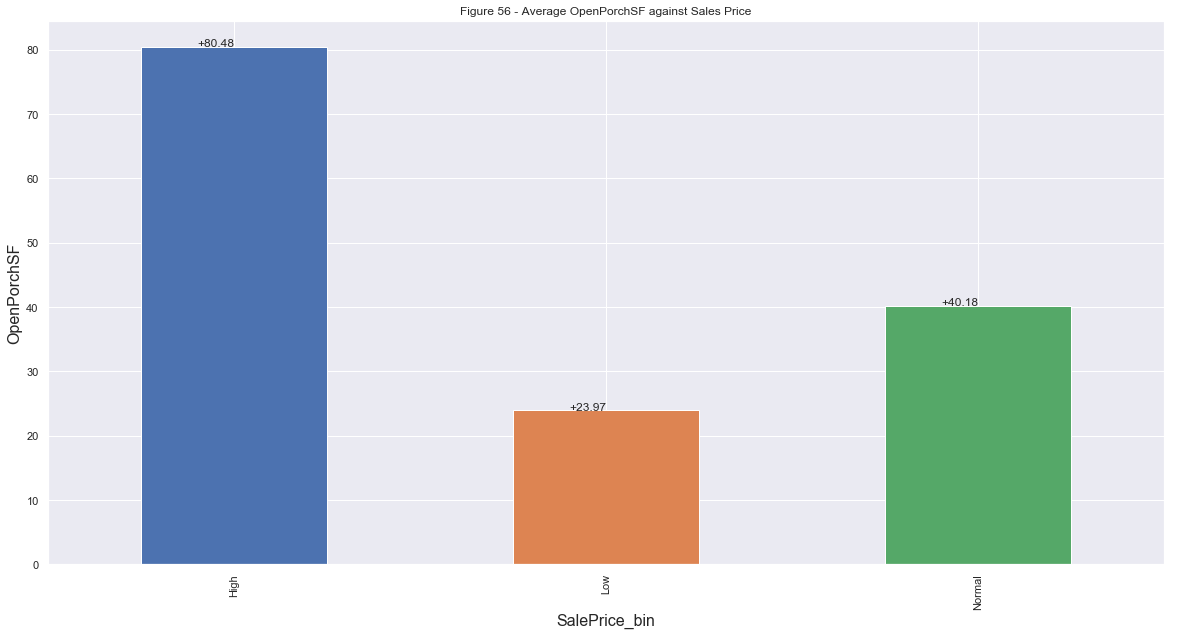

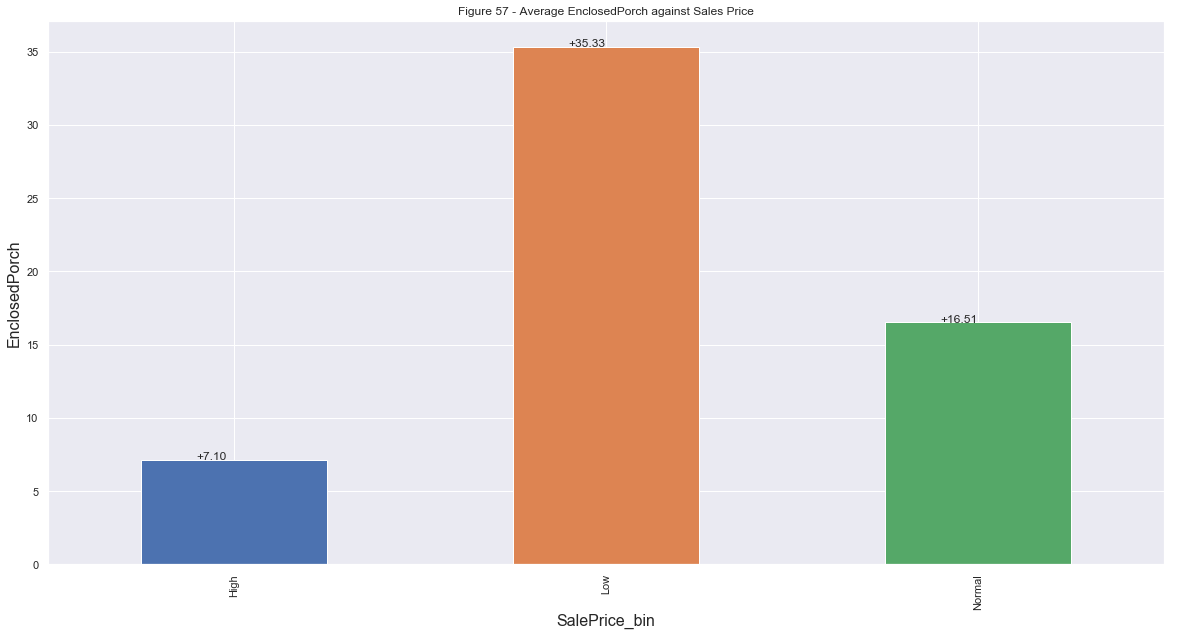

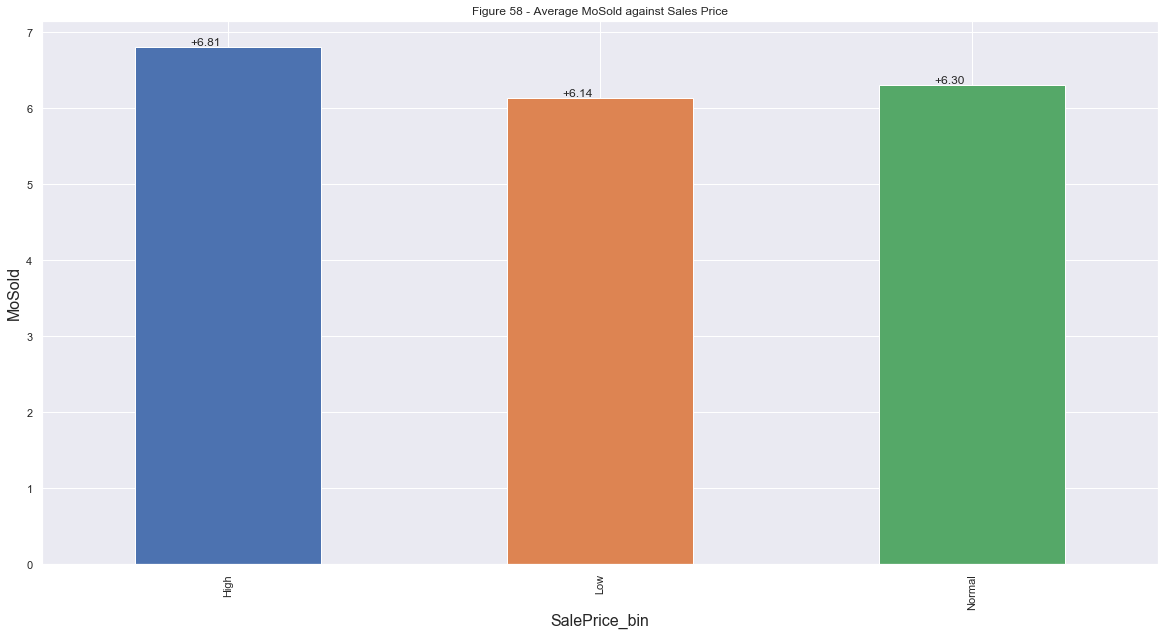

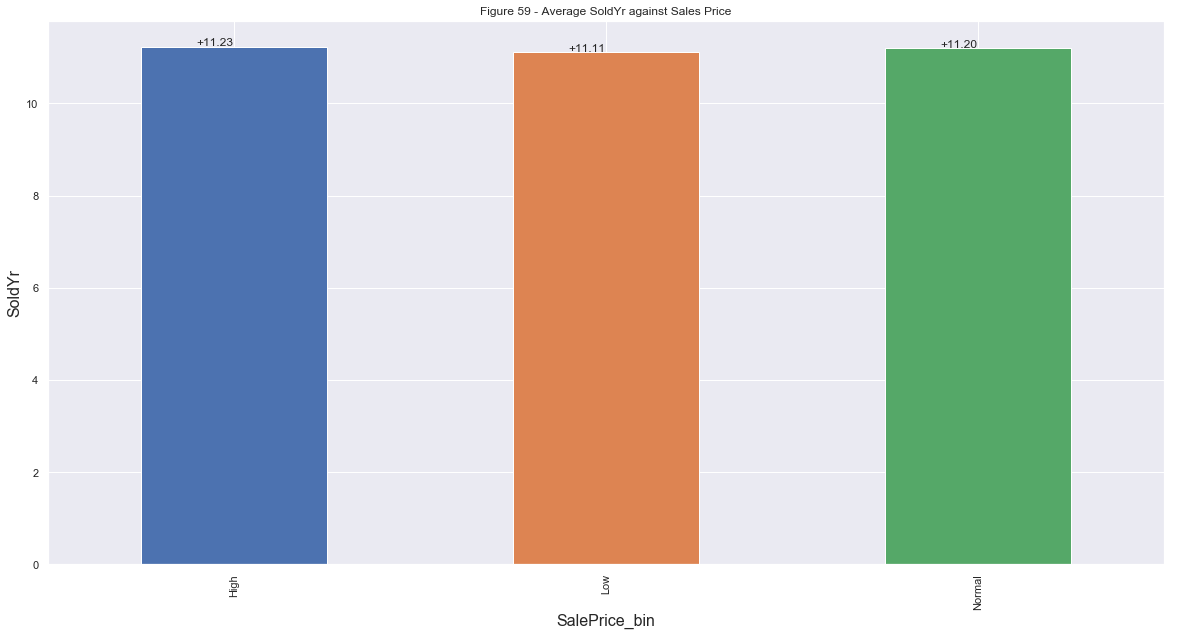

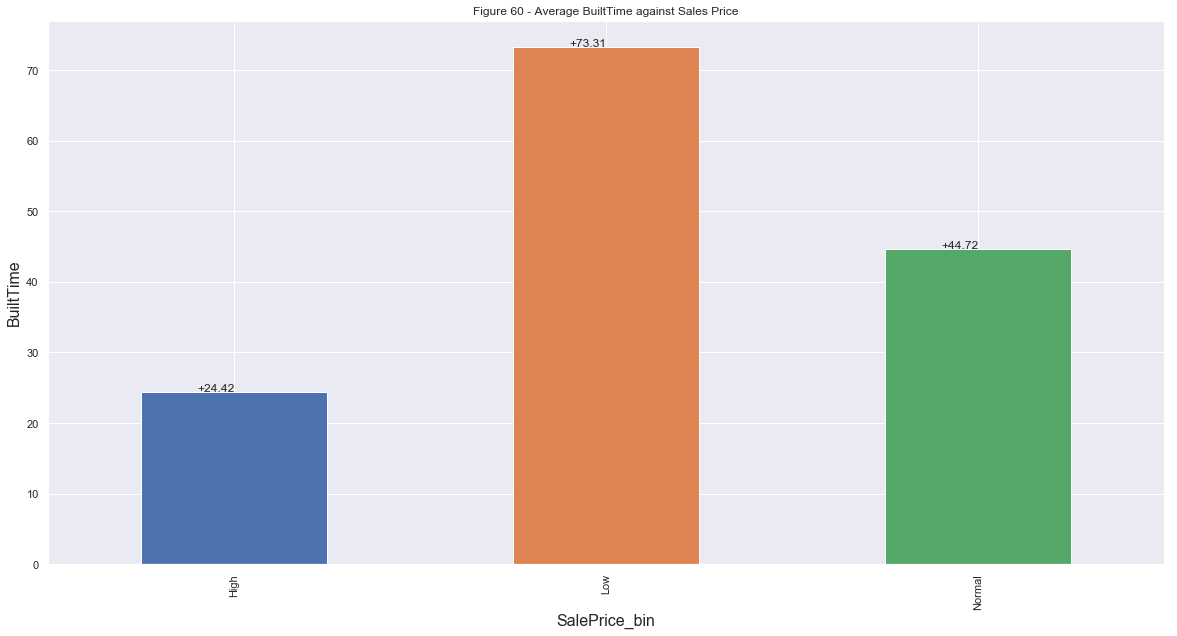

In [38]:
### ******** Visualize numeric columns against the Sales Price ********. | Start
num=37
for col in numCol:
    ## Visualize the MasVnrType against Sales Price| Start
    if(col!='Id' and col!='Remodelled' and col!='SalePrice'):
        df_viz_sp_fb = df_viz.groupby('SalePrice_bin')[col].mean().reset_index().set_index('SalePrice_bin')
        plotbar(df_viz_sp_fb[col],'SalePrice_bin',col,'Figure '+str(num) +' - Average '+ col+' against Sales Price')
        num=num+1
### ******** Visualize numeric columns against the Sales Price ********. | End

Text(0.5, 0, 'x (OverallQual)')

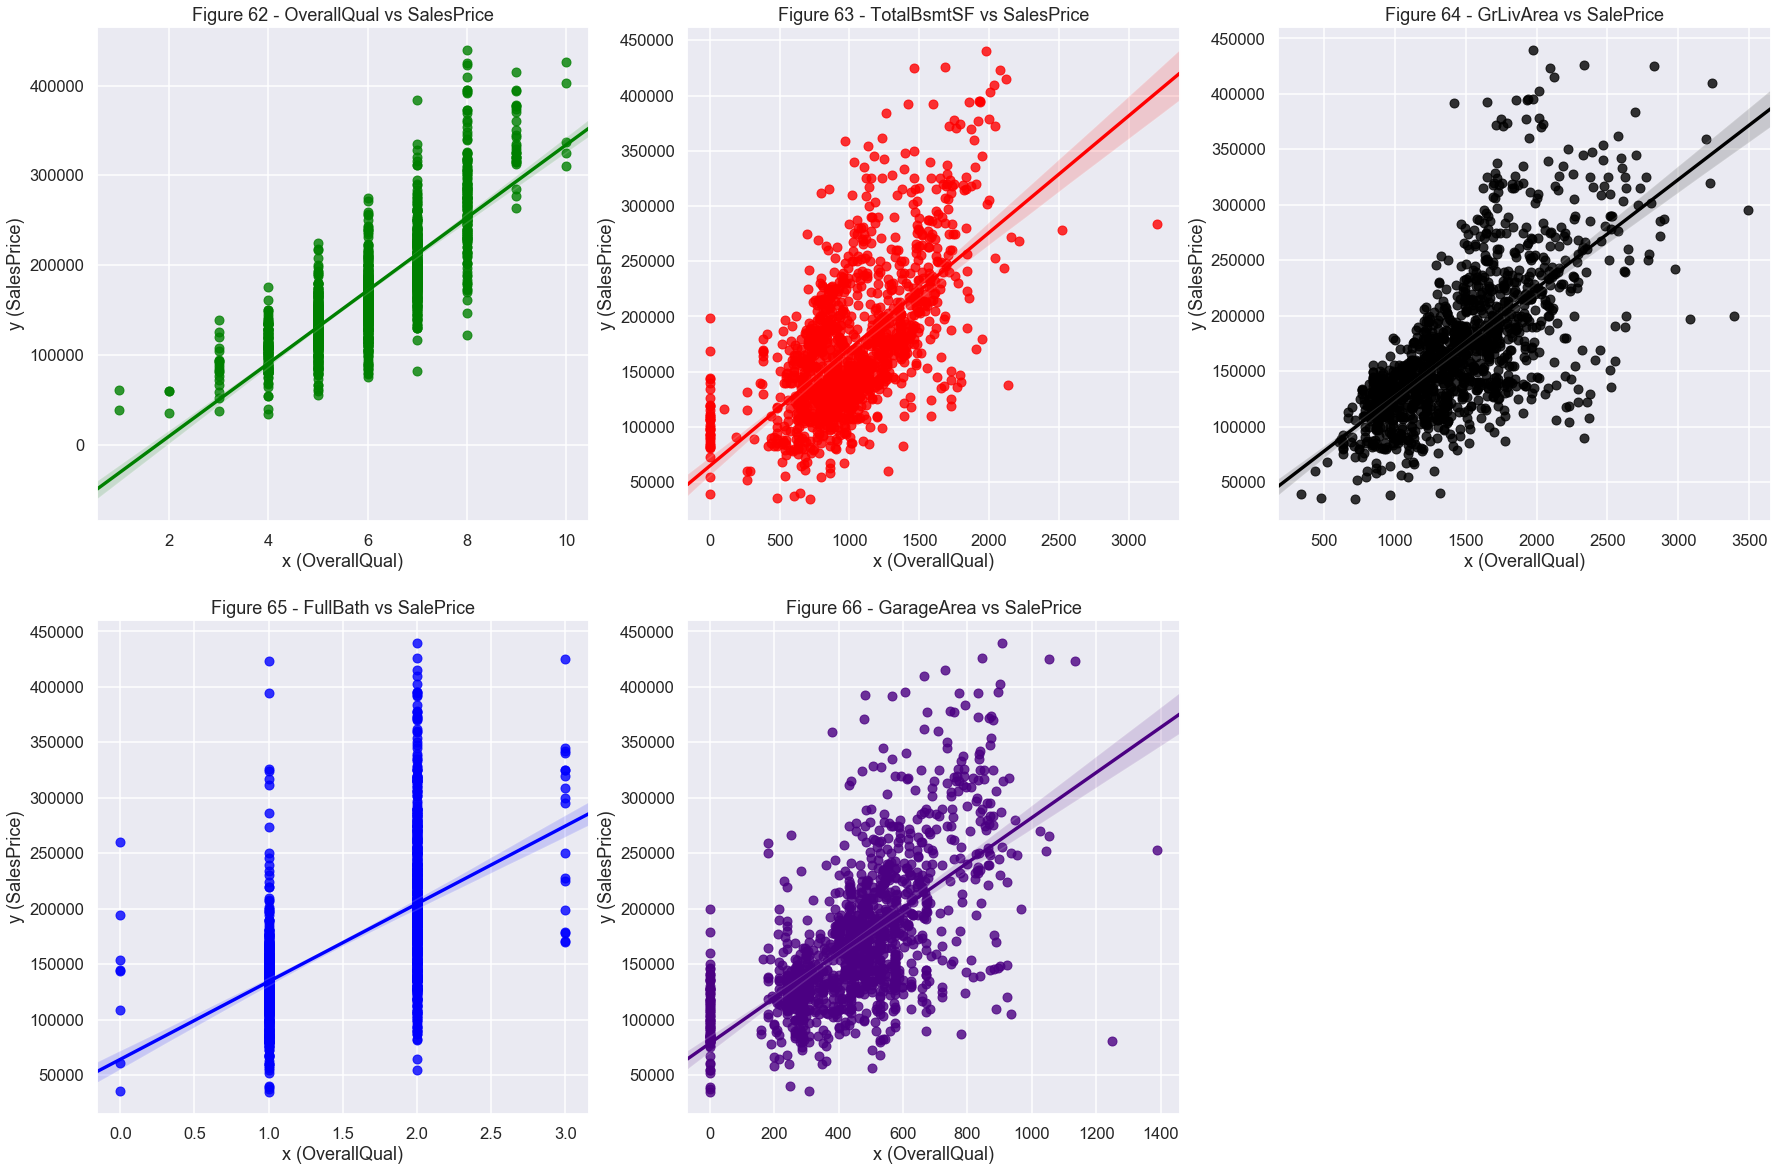

In [39]:
# Scatter plot for the variables , positively correlated to Price |Numerical Data
sns.set(style="darkgrid")
plt.figure(figsize = (30, 20))
sns.set_context('talk')



plt.subplot(2,3,1)
area = np.pi*3
sns.regplot(x=df_viz.OverallQual, y=df_viz.SalePrice,color='green')
plt.title('Figure 62 - OverallQual vs SalesPrice')
plt.ylabel('y (SalesPrice)')
plt.xlabel('x (OverallQual)')


plt.subplot(2,3,2)
area = np.pi*3
sns.regplot(x=df_viz.TotalBsmtSF, y=df_viz.SalePrice,color='red')
plt.title('Figure 63 - TotalBsmtSF vs SalesPrice')
plt.ylabel('y (SalesPrice)')
plt.xlabel('x (OverallQual)')


plt.subplot(2,3,3)
area = np.pi*3
sns.regplot(x=df_viz.GrLivArea, y=df_viz.SalePrice,color='black')
plt.title('Figure 64 - GrLivArea vs SalePrice')
plt.ylabel('y (SalesPrice)')
plt.xlabel('x (OverallQual)')


plt.subplot(2,3,4)
area = np.pi*3
sns.regplot(x=df_viz.FullBath, y=df_viz.SalePrice,color='blue')
plt.title('Figure 65 - FullBath vs SalePrice')
plt.ylabel('y (SalesPrice)')
plt.xlabel('x (OverallQual)')


plt.subplot(2,3,5)
area = np.pi*3
sns.regplot(x=df_viz.GarageArea, y=df_viz.SalePrice,color='indigo')
plt.title('Figure 66 - GarageArea vs SalePrice')
plt.ylabel('y (SalesPrice)')
plt.xlabel('x (OverallQual)')

# Scatter plot for the variables , positively correlated to Price |Numerical Data


<b> Comments: </b> 

<ul>
    <li> Mostly the houses are in normal price range, quarter of them are high priced (Figure 40) </li>
    <li> Higher the <b> Linear feet of street connected to property</b>, higher the price (Figure 38) </li>   
    <li> Higher the <b> Lot Area</b>, higher the price (Figure 39) </li>
    <li> Higher the <b> Rates the overall material and finish of the house</b>, higher the price (Figure 40)  </li>
    <li> Higher the <b> Masonry veneer area</b>, higher the price (Figure 42)  </li>
    <li> Higher the <b> Total Basement Area</b>, higher the price (Figure 46)   </li>
    <li> Higher the <b> basement full bathrooms</b>, higher the price (Figure 49)   </li>
    <li> More the <b> Fireplaces in the house</b>, higher the price (Figure 54)    </li>
    <li> More the <b> GarageArea</b>, higher the price (Figure 55)    </li>
    <li> More the <b> Porches </b>, LESS the price (Figure 58)    </li>
    <li> Lower the <b> Age of the house</b>, higher the price (Figure 61)     </li>
</ul>


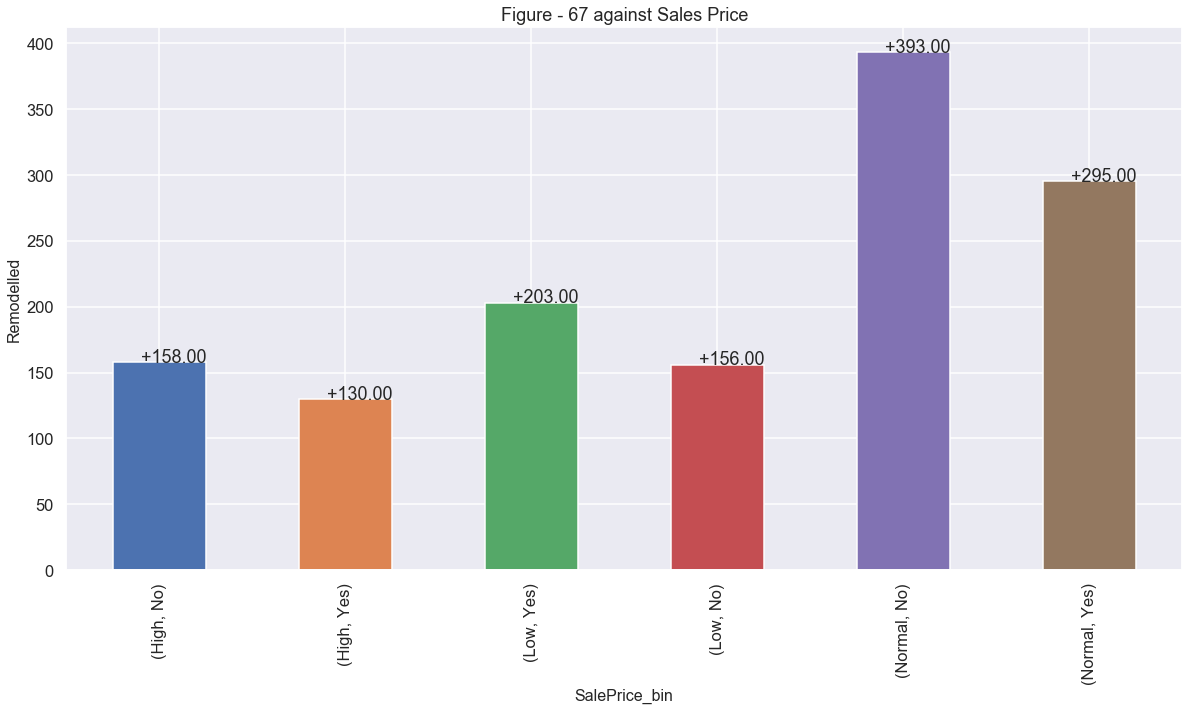

In [40]:
### ******** Visualize Remodelled column against the Sales Price ********. | Start
a=df_viz.groupby('SalePrice_bin')['Remodelled'].value_counts().to_frame()
plotbar(a.Remodelled,'SalePrice_bin','Remodelled','Figure - 67 against Sales Price')
### ******** Visualize Remodelled column against the Sales Price ********. | Start

<b> Comments: </b>
<ul>
    <li> Number of Houses with remodelling done and high price is about 190  </li>
    <li> Number of Houses with no remodelling done and normal price is about 417 </li>   
</ul>



#### <center> Bivariate Analysis | Start </center>

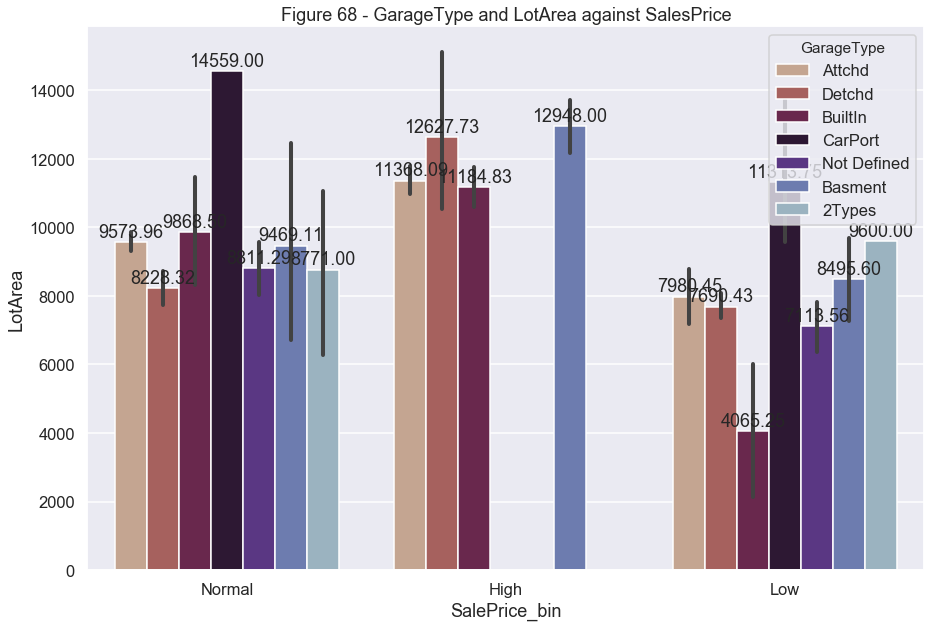

In [41]:
### **** Visualizing Salsprice, LotArea against GarageType | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='SalePrice_bin', y='LotArea', hue='GarageType',data=df_viz,palette=("twilight_r"))
plt.title('Figure 68 - GarageType and LotArea against SalesPrice')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Salsprice, LotArea against GarageType | End **** ###

<b> Comments: </b>
<ul>
    <li> High Priced houses have Garage types of Attached, Detached, Builtin and 2Types only  </li>
    <li> All the high priced houses have lotarea more than 1300  </li> 
    <li> The houses with Normal Sales Price have more Lotarea with 2Types Garages  </li>
</ul>

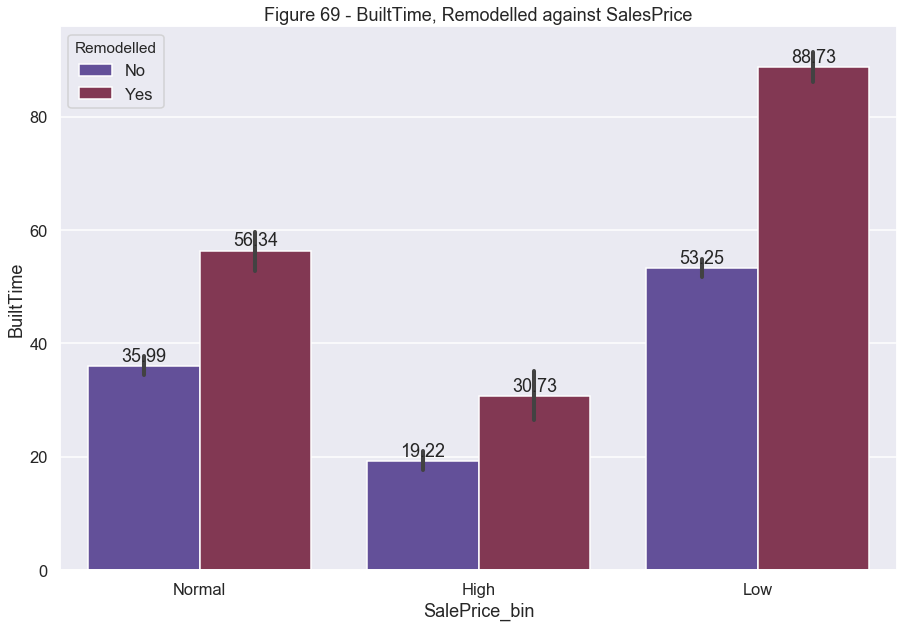

In [42]:
### **** Visualizing Salesprice, Builttime, Remodelled | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='SalePrice_bin', y='BuiltTime', hue='Remodelled',data=df_viz,palette=("twilight"))
plt.title('Figure 69 - BuiltTime, Remodelled against SalesPrice')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Salesprice, Builttime, Remodelled | End **** ###

<b> Comments: </b>
<ul>
    <li> The houses which are remodelled have higher price even if they are old houses  </li>
    <li> In the low selling price bracket the houses which were old were the most which got remodelled   </li> 
</ul>

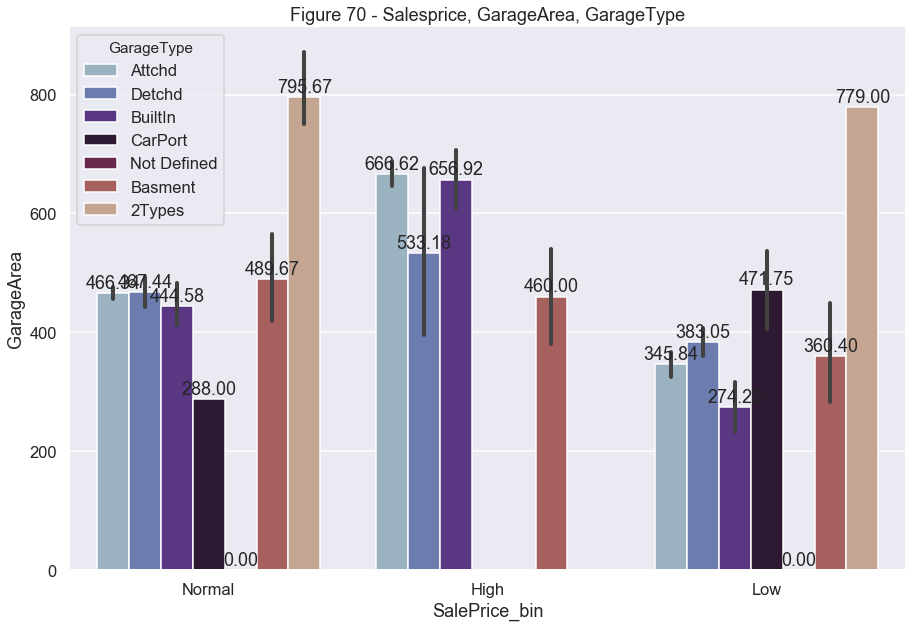

In [43]:
### **** Visualizing Salesprice, GarageArea, GarageType | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='SalePrice_bin', y='GarageArea', hue='GarageType',data=df_viz,palette=("twilight"))
plt.title('Figure 70 - Salesprice, GarageArea, GarageType')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Salesprice, GarageArea, GarageType | End **** ###

<b> Comments: </b>
<ul>
    <li> GarageArea for Normal & Low priced houses of type 2Types is the most  </li>
    <li> In the hiogh priced bracket the most preferred garage types are Attached and BuiltIn  </li> 
</ul>

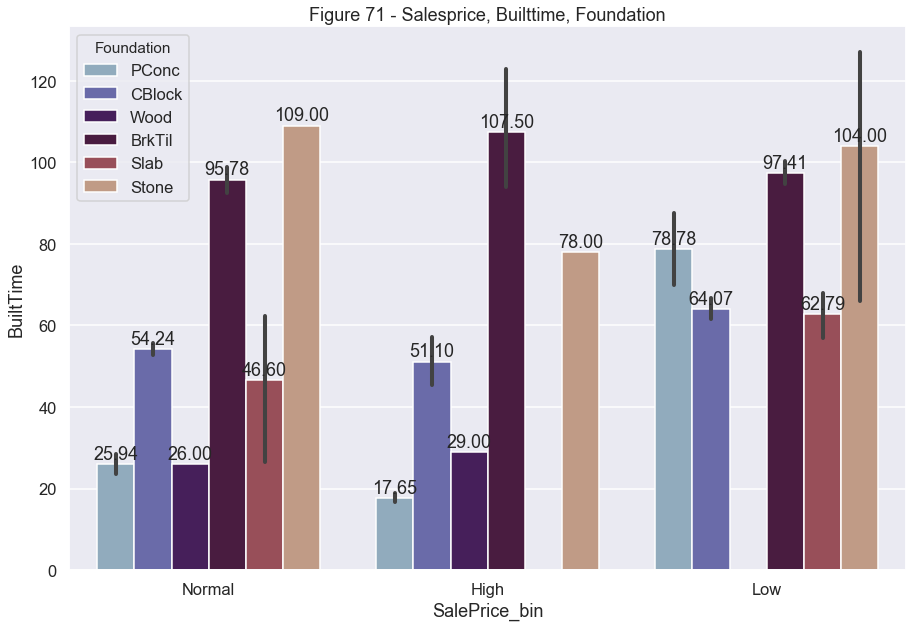

In [44]:
### **** Visualizing Salesprice, Builttime, Foundation | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='SalePrice_bin', y='BuiltTime', hue='Foundation',data=df_viz,palette=("twilight"))
plt.title('Figure 71 - Salesprice, Builttime, Foundation')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Salesprice, Builttime, Foundation | End **** ###

<b> Comments: </b>
<ul>
    <li> Accross the Sales Price Stone Foundation is more preferred where the houses are old  </li>
    <li> The houses which are comparitively newly built have Wood as the foundation are both Hogh/Normal price range  </li> 
    <li>In the Normal/Low price range slab is quite used foundation type</li>
</ul>

<br> <br> <center> <b> <u> Consolidated Commensts after Bivariate Analysis</u> : </b> </center>

<br>
    1. High Priced houses have Garage types of Attached, Detached, Builtin and 2Types only. <br>
    2. GarageArea for Normal & Low priced houses of type 2Types is the most <br>
    3. In the high priced bracket the most preferred garage types are Attached and BuiltIn <br>
    4. The houses with Normal Sales Price have more Lotarea with 2Types Garages <br>
    5. The houses which are comparitively newly built have Wood as the foundation are both Hogh/Normal price range <br>
    6. The houses which are remodelled have higher price even if they are old houses <br>

## 4. Model Creation 

### 4.1. Convert the SalePrice to log scale

In [45]:
df_viz["SalePrice_lm"] = np.log(df_viz["SalePrice"])

### 4.2. Categorical variable conversion to numeric

In [46]:
## Change the categorical variables to numeric | Start
df_mod = df_viz.drop(['SalePrice_bin','SalePrice'],axis=1)
dtypes = df_mod.dtypes 
numCol = dtypes[(dtypes == 'int64') | (dtypes == float)]
catCol = dtypes[dtypes == object]
## Change the categorical variables to numeric| End



In [47]:
pd.DataFrame(dtypes).reset_index().set_index(0).reset_index()[0].value_counts()

object     39
int64      23
float64     3
Name: 0, dtype: int64

In [48]:
numCols = list(numCol.index)
catCols = list(catCol.index)

In [49]:
for i in catCols:
    features = sorted(set(df_mod[i]))
    for j in features:
        features = list(features)
        df_mod.loc[df_mod[i] == j, i] = features.index(j)

In [50]:
df_mod.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
4   5          60         3         84.0    14260       1         0   
5   6          50         3         85.0    14115       1         0   

   LandContour  Utilities  LotConfig  ...  WoodDeckSF  OpenPorchSF  \
0            3          0          4  ...           0           61   
1            3          0          2  ...         298            0   
2            3          0          4  ...           0           42   
4            3          0          2  ...         192           84   
5            3          0          4  ...          40           30   

   EnclosedPorch  MoSold  SaleType  SaleCondition  SoldYr  BuiltTime  \
0              0       2         8              4      11         16   
1              0       5         8              4      12         43   
2              0       9         8              4      11         18   
4              0      12         8              4      11         19   
5              0      10         8              4      10         26   

   Remodelled  SalePrice_lm  
0           0     12.247694  
1           0     12.109011  
2           1     12.317167  
4           0     12.429216  
5           1     11.870600  

[5 rows x 65 columns]

### 4.2. Train Test Split

In [51]:
df_mod.SalePrice_lm.describe()

count    1335.000000
mean       11.988373
std         0.373474
min        10.460242
25%        11.759786
50%        11.970350
75%        12.220961
max        12.994530
Name: SalePrice_lm, dtype: float64

In [52]:
#X = df_dummy.drop(['Id','SalePrice'],axis=1)
X = df_mod.drop(["SalePrice_lm",'Id'], axis=1)
y = df_mod["SalePrice_lm"]

In [53]:
X_train,X_test,y_train, y_test = train_test_split(X,df_mod.SalePrice_lm,train_size=0.7,test_size=0.3,random_state=100)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(934, 63)
(401, 63)
(934,)
(401,)


In [55]:
df_mod.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition',
       'SoldYr', 'BuiltTime', 'Remodelled', 'SalePrice_lm'],
      dtype='object')

### 4.3. Dataset scaling

In [56]:
X_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1094          20         3    74.000000     5868       1         3   
170           50         4    70.049958    12358       1         0   
1300          60         3    70.049958    10762       1         0   
538           20         3    70.049958    11553       1         0   
62           120         3    44.000000     6442       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  PavedDrive  \
1094            3          0          4          0  ...           2   
170             3          0          4          0  ...           2   
1300            3          0          1          0  ...           2   
538             3          0          4          0  ...           2   
62              3          0          4          0  ...           2   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  SaleType  SaleCondition  \
1094           0            0             80       5         8              4   
170          237            0              0       5         8              4   
1300           0            0              0       5         8              4   
538          466            0              0       7         8              4   
62           120           49              0      10         8              4   

      SoldYr  BuiltTime  Remodelled  
1094       9         63           1  
170       12         78           1  
1300      10         20           0  
538       13         51           0  
62        12         13           0  

[5 rows x 63 columns]

In [57]:
numCols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'SoldYr',
 'BuiltTime',
 'SalePrice_lm']

In [58]:
## ******* Scale the numeric fields ******* | Start
std = StandardScaler()
numCols.remove('Id')
numCols.remove('SalePrice_lm')
#X_train[numCols] = std.fit_transform(X_train[numCols])
cols = list(X_train.columns)
X_train[cols] = std.fit_transform(X_train[cols])

## ******* Scale the numeric fields ******* | End
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
1094   -0.886796 -0.039004     0.357352 -0.994030  0.056766  0.703259   
170    -0.176040  1.478887     0.130319  0.869425  0.056766 -1.455046   
1300    0.060878 -0.039004     0.130319  0.411170  0.056766 -1.455046   
538    -0.886796 -0.039004     0.130319  0.638288  0.056766 -1.455046   
62      1.482389 -0.039004    -1.366929 -0.829219  0.056766 -1.455046   

      LandContour  Utilities  LotConfig  LandSlope  ...  PavedDrive  \
1094     0.285592        0.0   0.586681  -0.203756  ...    0.283369   
170      0.285592        0.0   0.586681  -0.203756  ...    0.283369   
1300     0.285592        0.0  -1.281364  -0.203756  ...    0.283369   
538      0.285592        0.0   0.586681  -0.203756  ...    0.283369   
62       0.285592        0.0   0.586681  -0.203756  ...    0.283369   

      WoodDeckSF  OpenPorchSF  EnclosedPorch    MoSold  SaleType  \
1094   -0.767336    -0.705839       1.064858 -0.519995  0.289829   
170     1.275897    -0.705839      -0.370112 -0.519995  0.289829   
1300   -0.767336    -0.705839      -0.370112 -0.519995  0.289829   
538     3.250161    -0.705839      -0.370112  0.213653  0.289829   
62      0.267212     0.044827      -0.370112  1.314125  0.289829   

      SaleCondition    SoldYr  BuiltTime  Remodelled  
1094       0.206446 -1.647641   0.508721    1.089658  
170        0.206446  0.616552   1.008419    1.089658  
1300       0.206446 -0.892910  -0.923745   -0.917719  
538        0.206446  1.371283   0.108963   -0.917719  
62         0.206446  0.616552  -1.156937   -0.917719  

[5 rows x 63 columns]

### 4.4. Model Building

#### 4.4.1. Approach 1 - Multiple Linear Regression using Cross Validation

In [59]:
### ****** Building the model using rfe | Start ******
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,80)
rfe=rfe.fit(X_train,y_train)
cols = list(X_train.columns[rfe.support_])
### ****** Building the model using rfe | End ******

In [60]:
## ******* Fit the selected columns in the Linear Regression model | Start ******
X_train_r = X_train[cols]
#modelFit(X_train_r,lm,y_train)
## ******* Fit the selected columns in the Linear Regression model | End ******
y_train

1094    11.767568
170     11.763684
1300    12.323856
538     11.970350
62      12.218495
1254    12.016122
372     11.736069
762     12.279323
1021    12.175613
1112    11.774520
765     12.484204
1342    12.339291
1313    12.716402
640     12.520883
208     12.531773
1376    11.418615
377     12.736701
1367    11.751942
792     12.505399
720     12.524526
1390    12.367341
940     11.924373
752     12.287653
180     12.083905
1347    12.554837
1397    11.831379
182     11.695247
669     11.831379
295     11.867097
66      12.100712
          ...    
671     11.548293
974     12.028739
2       12.317167
835     11.759786
1055    12.100712
856     11.898188
348     11.944708
52      11.608236
146     11.561716
913     11.884489
656     11.887931
1119    11.803354
666     11.767568
829     11.900905
1272    11.827736
983     12.452542
455     12.075394
422     11.635143
94      12.229545
1218    11.296012
999     12.235631
1370    11.561716
306     12.323856
822     12.323856
1098    11

##### Now in this approach we know there are few problems :
1. We have very less data to work with, dividing the data into train, test and validation will eat of the data
2. Also we are unknowingly allowing a data leak when we are allowing the test data to be peaked by the model.
3. We are using hyper-parameter of number of features to be selected in RFE, we can tune this paramter while building the model
<br>

<b> Lets use the Cross-Validation approach to overcome the same </b>

In [61]:
## ****** Calculate the cross validation score | Start *******
folds = KFold(n_splits = 5, random_state=100, shuffle=True)
score = cross_val_score(lm,X_train,y_train,scoring='r2',cv=5)
print(score)
#print(sorted(met.SCORERS.keys()))
## ****** Calculate the cross validation score | End *******

[0.8859729  0.86580643 0.86815893 0.90310123 0.89811529]


In [62]:
hyperparam = [{'n_features_to_select':list(range(2,80))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

gridCV = GridSearchCV(estimator=rfe,
                     param_grid = hyperparam,
                     scoring='r2',
                     cv=folds,
                     verbose=1,
                     return_train_score=True)
gridCV.fit(X_train,y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 390 out of 390 | elapsed:   12.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [63]:
modelCV_results=pd.DataFrame(gridCV.cv_results_)
modelCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.062424      0.004702         0.000869        0.000037   
1        0.057712      0.000378         0.000874        0.000018   
2        0.057540      0.000552         0.000948        0.000111   
3        0.057269      0.000717         0.000879        0.000022   
4        0.056481      0.000515         0.000909        0.000048   
5        0.055393      0.000282         0.000866        0.000002   
6        0.054790      0.000211         0.000904        0.000063   
7        0.054724      0.000551         0.000889        0.000026   
8        0.053734      0.000280         0.000898        0.000039   
9        0.053293      0.000240         0.000871        0.000003   
10       0.052828      0.000360         0.000918        0.000081   
11       0.051944      0.000377         0.000884        0.000022   
12       0.051300      0.000166         0.000899        0.000026   
13       0.050735      0.000490         0.000905        0.000046   
14       0.050576      0.000392         0.000873        0.000002   
15       0.049830      0.000496         0.000896        0.000037   
16       0.049131      0.000582         0.000917        0.000042   
17       0.048163      0.000366         0.000891        0.000030   
18       0.047944      0.000378         0.000876        0.000009   
19       0.046775      0.000261         0.000872        0.000002   
20       0.046276      0.000118         0.000878        0.000003   
21       0.045520      0.000277         0.000911        0.000051   
22       0.047320      0.004207         0.000923        0.000082   
23       0.056967      0.000625         0.001100        0.000050   
24       0.054359      0.000952         0.001133        0.000095   
25       0.047024      0.008549         0.000960        0.000136   
26       0.041971      0.000765         0.001005        0.000079   
27       0.040769      0.000280         0.000915        0.000046   
28       0.039670      0.000141         0.000897        0.000022   
29       0.038888      0.000279         0.000877        0.000003   
..            ...           ...              ...             ...   
48       0.019567      0.000171         0.000919        0.000077   
49       0.018370      0.000189         0.000880        0.000004   
50       0.017292      0.000534         0.001076        0.000397   
51       0.016002      0.000201         0.000907        0.000049   
52       0.014621      0.000100         0.000880        0.000002   
53       0.013380      0.000092         0.000889        0.000023   
54       0.012851      0.001001         0.000896        0.000021   
55       0.010934      0.000157         0.000890        0.000016   
56       0.009518      0.000109         0.000891        0.000028   
57       0.008177      0.000041         0.000887        0.000032   
58       0.006832      0.000081         0.000870        0.000004   
59       0.005502      0.000093         0.001054        0.000312   
60       0.004066      0.000036         0.000868        0.000027   
61       0.002636      0.000047         0.000828        0.000003   
62       0.002619      0.000029         0.000834        0.000024   
63       0.002659      0.000056         0.000829        0.000016   
64       0.002650      0.000060         0.000831        0.000007   
65       0.002612      0.000031         0.000855        0.000072   
66       0.002640      0.000025         0.000827        0.000010   
67       0.002644      0.000038         0.000850        0.000020   
68       0.002642      0.000038         0.000832        0.000014   
69       0.002636      0.000058         0.000856        0.000028   
70       0.002638      0.000036         0.000843        0.000036   
71       0.002640      0.000050         0.000836        0.000020   
72       0.002892      0.000479         0.000886        0.000083   
73       0.002757      0.000271         0.000845        0.000020   
74       0.002637      0.000041         0.000821        0.00

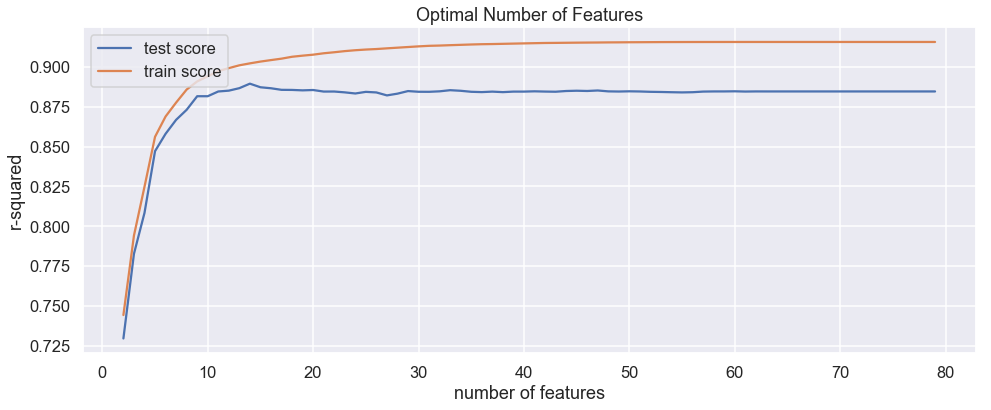

In [64]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(modelCV_results["param_n_features_to_select"], modelCV_results["mean_test_score"])
plt.plot(modelCV_results["param_n_features_to_select"], modelCV_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

 <center> From the above graph we can see that the optimal number of features can be 12-14, where the r-sqaured is coming around 0.86, which is preety good. so we can use 12 features (less features is good).<br>
    This graph also shows us that <b> there is no overfitting of the data </b> as the there is a very little gap between the train and the test scores and it plateaues out after a certain point

In [65]:
# ****** Lets build our final model | Start *******
n_features_optimal = 12

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)
# ****** Lets build our final model | End *******

## ***** Get the columns and the ranks, create a dataframe | Start ******
rfeCols=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_,lm.coef_)))
## ***** Get the columns and the ranks, create a dataframe | End ******

In [66]:
### ****** Get the first 12 columns based on the Rank | Start *******
rfeCols=rfeCols.rename(columns={0:'Column',1:'Strength',2:'Rank',3:'Coeffs'})
rfeCols=rfeCols.sort_values(by='Rank')
cols = list(rfeCols.Column[:12].values)

### ****** Get the first 12 columns based on the Rank | End *******

In [67]:
rfeCols[:15]

Column  Strength  Rank    Coeffs
39      GrLivArea      True     1  0.130417
36     CentralAir      True     1  0.022259
3         LotArea      True     1  0.030903
33    TotalBsmtSF      True     1  0.058235
32      BsmtUnfSF      True     1 -0.026245
61      BuiltTime      True     1 -0.062325
59  SaleCondition      True     1  0.029404
16    OverallCond      True     1  0.058311
15    OverallQual      True     1  0.083618
47     Fireplaces      True     1  0.018295
45    KitchenQual      True     1 -0.015984
50     GarageArea      True     1  0.027786
35      HeatingQC     False     2 -0.012009
20    Exterior2nd     False     3  0.023087
19    Exterior1st     False     4 -0.016754

<center><b> After we complete the Cross validation and optimal feature selection, we have selected 12 features and we shall use these 12 features to predict our test data (held-out data) </b></center>

In [68]:
### ****** Standardize the X_test data | Start ******
X_test = std.fit_transform(X_test)
### ****** Standardize the X_test data | End ******

In [69]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = met.r2_score(y_test, y_pred)
print(r2)

0.8802944999380841


In [70]:
# Get the R2 for train and test data respectively | Start
R2_train = (rfe.score(X_train, y_train))
R2_test = (rfe.score(X_test,y_test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))
# Get the R2 for train and test data respectively | End

R squared for train data is: 0.898
R squared for test data is: 0.880


In [71]:
## Get the RMSE for train and test data respectively | Start
RMSE_train = sqrt(np.mean((y_train - rfe.predict(X_train))**2))
RMSE_test = sqrt(np.mean((y_test - rfe.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))
## Get the RMSE for train and test data respectively | End

Root mean squared error for train data is: 0.118
Root mean sqaured error for test data is: 0.131


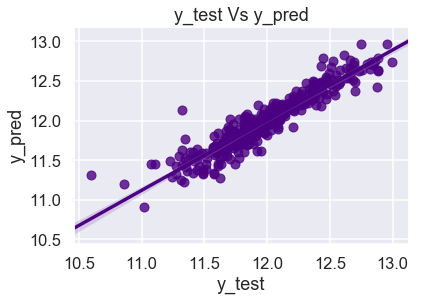

In [72]:
### **** Plot the y_test vs y_pred ***** | Start
area = np.pi*3
sns.regplot(x=y_test, y=y_pred,color='indigo')
plt.title('y_test Vs y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.show()
### **** Plot the y_test vs y_pred ***** | End

Text(0, 0.5, 'Residuals')

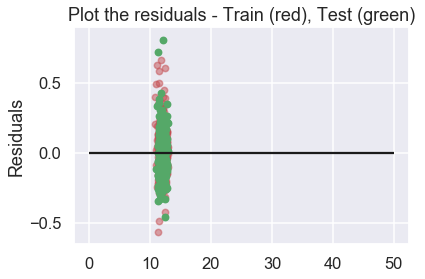

In [73]:
### ****** Plot the residuals - Train (red), Test (green) | Start *******
plt.scatter(rfe.predict(X_train), rfe.predict(X_train) - y_train, c='r', s=40, alpha=0.5)
plt.scatter(rfe.predict(X_test), rfe.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Plot the residuals - Train (red), Test (green)')
plt.ylabel('Residuals')
### ****** Plot the residuals - Train (red), Test (green) | End *******

The residuals of both the train and the test set seems to be close to each other and thus the model seems to have performed well on the test set as well

Text(0, 0.5, 'Index')

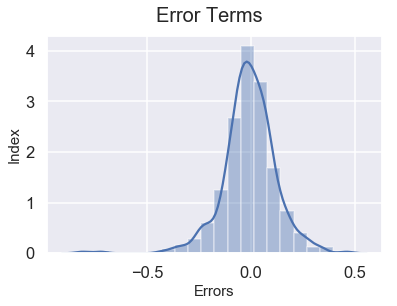

In [74]:
#### ****** Plot the residuals | Start *******
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Index', fontsize = 15)
#### ****** Plot the residuals | End *******

The error terms terms are almost normal also, which describes that we are good with the model prediction

In [75]:
## *** Get the RMSE and R2 values *** | Start
rmse_2 = round(sqrt(mean_squared_error(y_test, y_pred)),2)
print('Model RMSE value::',rmse_2)

r2_2=round(r2_score(y_test, y_pred),2)
print('Model R2 Score::',r2_2)
## *** Get the RMSE and R2 values *** | End

Model RMSE value:: 0.13
Model R2 Score:: 0.88


The root mean squared error (which should be less for a good model) is 0.13 and the R2 score of test data is 0.88, which is good enough for our prediction

In [76]:
rfeCols[:10]

Column  Strength  Rank    Coeffs
39      GrLivArea      True     1  0.130417
36     CentralAir      True     1  0.022259
3         LotArea      True     1  0.030903
33    TotalBsmtSF      True     1  0.058235
32      BsmtUnfSF      True     1 -0.026245
61      BuiltTime      True     1 -0.062325
59  SaleCondition      True     1  0.029404
16    OverallCond      True     1  0.058311
15    OverallQual      True     1  0.083618
47     Fireplaces      True     1  0.018295

<center> <b> Conclusions after Approach 1: </b> </center><br>
In this approach we have used the grid csearch cross validation to select the number of optimal paramters for the RFE and in the process also ensured the overfitting of the data is properly handled by performing K-Fold cross validation and later performing the prediction on the held out set. The <b> R2 score </b> of the prediction came out to be <b>0.88</b> and the <b>RMSE score</b> for the predicted data came out to be <b> 0.13 </b>, that means our prediction on the held out set went well. 


#### 4.4.2. Approach 2 - Multiple Linear Regression, Lasso using Cross Validation

In this approach we will use the GLM to arrive at the features using VIF and then use Lasso to assist us in the feature selection (as Lasso penalizes the variable to zero which are not important)

In [77]:
## Change the categorical variables to numeric | Start
df_mod1 = df_viz.drop(['SalePrice_bin','SalePrice'],axis=1)
dtypes = df_mod1.dtypes 
numCol = dtypes[(dtypes == 'int64') | (dtypes == 'float')]
catCol = dtypes[dtypes == 'object']
## Change the categorical variables to numeric| End
catColList=[]
numColList=[]
for col in df_mod1.columns:
    if df_mod1[col].dtypes == 'object':
        catColList.append(col)
    else:
        numColList.append(col)
print(numColList)
print(catColList)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SoldYr', 'BuiltTime', 'SalePrice_lm']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'Remodelled']


In [78]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_mod1[catColList], drop_first=True)

# Adding the results to the master dataframe
df_dummy = pd.concat([df_mod1, dummy1], axis=1)

## Dropping the main columns after dummification | Start
df_dummy = df_dummy.drop(catColList,axis=1)
## Dropping the main columns after dummification | end

In [79]:
df_dummy.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
4   5          60         84.0    14260            8            5       350.0   
5   6          50         85.0    14115            5            5         0.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLw  SaleType_New  \
0           0        150          856  ...               0             0   
1           0        284         1262  ...               0             0   
2           0        434          920  ...               0             0   
4           0        490         1145  ...               0             0   
5           0         64          796  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
4             0            1                      0                     0   
5             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
4                     0                     1                      0   
5                     0                     1                      0   

   Remodelled_Yes  
0               0  
1               0  
2               1  
4               0  
5               1  

[5 rows x 231 columns]

In [80]:
### ****** Building the model using rfe | Start ******
X = df_dummy.drop(["SalePrice_lm",'Id'], axis=1)
y = df_dummy["SalePrice_lm"]

## Create Test Train Split | Start
X_train,X_test,y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
## Create Test Train Split | End

## Scaling the datasets | Start
std = StandardScaler()

temp = ["SalePrice_lm",'Id']

numcolList_mod = [item for item in numColList if item not in temp]

X_train[numcolList_mod] = std.fit_transform(X_train[numcolList_mod])
X_test[numcolList_mod] = std.fit_transform(X_test[numcolList_mod])

## Scaling the datasets | End

#### **** Create the Linear Regression model using RFE selecting 100 columns | Start
lm1 = LinearRegression()
lm1.fit(X_train,y_train)
rfe1=RFE(lm1,100)  ## Selected 100 features 
rfe1=rfe1.fit(X_train,y_train)
cols_1 = list(X_train.columns[rfe1.support_])
#### **** Create the Linear Regression model using RFE selecting 100 columns | End


### ****** Building the model using rfe | End ******

In [81]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1094   -0.886796     0.357352 -0.994030    -0.773543     1.338145   -0.628245   
170    -0.176040     0.130319  0.869425    -0.773543     0.410973   -0.628245   
1300    0.060878     0.130319  0.411170     0.744291    -0.516198    1.936438   
538    -0.886796     0.130319  0.638288    -0.773543    -0.516198    0.773384   
62      1.482389    -1.366929 -0.829219     1.503209    -0.516198    0.698829   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  ...  SaleType_ConLw  \
1094    1.860455  -0.280294    -0.211068 -0.799678  ...               0   
170    -0.271366  -0.488029    -0.767669 -0.799678  ...               0   
1300   -0.271366  -0.667437    -0.102840  1.530666  ...               0   
538    -0.271366  -0.445538     0.085271 -0.799678  ...               0   
62     -0.271366   1.839555     0.907288 -0.799678  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
1094             0             0            1                      0   
170              0             0            1                      0   
1300             0             0            1                      0   
538              0             0            1                      0   
62               0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1094                     0                     0                     1   
170                      0                     0                     1   
1300                     0                     0                     1   
538                      0                     0                     1   
62                       0                     0                     1   

      SaleCondition_Partial  Remodelled_Yes  
1094                      0               1  
170                       0               1  
1300                      0               0  
538                       0               0  
62                        0               0  

[5 rows x 229 columns]

In [82]:
cols_1

['LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BuiltTime',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Utilities_NoSeWa',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition1_RRNn',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'RoofMatl_Metal',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_Stone',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_Stone'

### <center> **** First Run **** </center>

In [83]:
## ******* Fit the selected columns in the Linear Regression model | Start ******
X_train_la = X_train[cols_1]
modelFit(X_train_la,lm1,y_train)
## ******* Fit the selected columns in the Linear Regression model | End ******

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     140.1
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:09   Log-Likelihood:                 861.95
No. Observations:                 934   AIC:                            -1554.
Df Residuals:                     849   BIC:                            -1143.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [84]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                    Features     VIF
82  GarageFinish_Not Defined     inf
89             GarageCond_Gd     inf
59               BsmtCond_Po     inf
61  BsmtFinType1_Not Defined     inf
71            Electrical_Mix     inf
81    GarageType_Not Defined     inf
39       Exterior1st_CemntBd     inf
83             GarageQual_Fa     inf
84             GarageQual_Gd     inf
38        Exterior1st_CBlock     inf
86             GarageQual_Po     inf
87             GarageQual_TA     inf
88             GarageCond_Fa     inf
85    GarageQual_Not Defined     inf
90    GarageCond_Not Defined     inf
43        Exterior2nd_CBlock     inf
92             GarageCond_TA     inf
91             GarageCond_Po     inf
44       Exterior2nd_CmentBd     inf
58      BsmtCond_Not Defined     inf
56      BsmtQual_Not Defined     inf
11               Street_Pave  343.97
9                MSZoning_RL  171.35
30           RoofStyle_Gable  146.72
65          BsmtFinType2_Unf   42.98
97               SaleType_WD   35.21
1

<center><h3>Observations 1</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>ExterQual_Fa</b> have high p value  which is way above 0.05 also some more features like: <b> GarageFinish_Not Defined, GarageCond_Gd, BsmtCond_Po, BsmtFinType1_Not Defined etc </b> has high VIF values (infinity) </center>

### <center> **** 2nd Run **** </center>

In [85]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('ExterQual_Fa', axis=1)
## Drop the feature - SaleType | End


In [86]:
###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:09   Log-Likelihood:                 861.94
No. Observations:                 934   AIC:                            -1556.
Df Residuals:                     850   BIC:                            -1149.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [87]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                    Features     VIF
60  BsmtFinType1_Not Defined     inf
80    GarageType_Not Defined     inf
84    GarageQual_Not Defined     inf
81  GarageFinish_Not Defined     inf
85             GarageQual_Po     inf
86             GarageQual_TA     inf
87             GarageCond_Fa     inf
88             GarageCond_Gd     inf
89    GarageCond_Not Defined     inf
90             GarageCond_Po     inf
91             GarageCond_TA     inf
83             GarageQual_Gd     inf
82             GarageQual_Fa     inf
38        Exterior1st_CBlock     inf
39       Exterior1st_CemntBd     inf
70            Electrical_Mix     inf
43        Exterior2nd_CBlock     inf
44       Exterior2nd_CmentBd     inf
55      BsmtQual_Not Defined     inf
57      BsmtCond_Not Defined     inf
58               BsmtCond_Po     inf
11               Street_Pave  320.01
9                MSZoning_RL  170.99
30           RoofStyle_Gable  145.62
64          BsmtFinType2_Unf   42.83
96               SaleType_WD   35.05
1

<center><h3>Observations 2</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>Condition2_RRAn</b> have high p values  which is way above 0.05 </center>

### <center> **** 3rd Run **** </center>

In [88]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('Condition2_RRAn', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:10   Log-Likelihood:                 861.94
No. Observations:                 934   AIC:                            -1556.
Df Residuals:                     850   BIC:                            -1149.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 3</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.913 and 0.907 respectively, </b>but if we see the p values, <b>Exterior2nd_AsphShn</b> have high p values which is way above 0.05 </center>

### <center> **** 4th Run **** </center>

In [89]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('Exterior2nd_AsphShn', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     143.8
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:10   Log-Likelihood:                 861.70
No. Observations:                 934   AIC:                            -1557.
Df Residuals:                     851   BIC:                            -1156.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 4</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>RoofStyle_Hip</b> have high p which is way above 0.05 </center>

### <center> **** 5th Run **** </center>

In [90]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('RoofStyle_Hip', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     145.6
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:10   Log-Likelihood:                 861.37
No. Observations:                 934   AIC:                            -1559.
Df Residuals:                     852   BIC:                            -1162.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 5</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>Utilities_NoSeWa</b> have high p values which is way above 0.05 </center>

### <center> **** 6th Run **** </center>

In [91]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('Utilities_NoSeWa', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     145.6
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:11   Log-Likelihood:                 861.37
No. Observations:                 934   AIC:                            -1559.
Df Residuals:                     852   BIC:                            -1162.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 6</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>RoofStyle_Gable</b> have high p values which is way above 0.05 </center>

### <center> **** 7th Run **** </center>

In [92]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('RoofStyle_Gable', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:11   Log-Likelihood:                 861.25
No. Observations:                 934   AIC:                            -1561.
Df Residuals:                     853   BIC:                            -1169.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 7</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>Neighborhood_IDOTRR</b> have high p values which is way above 0.05 </center>

### <center> **** 8th Run **** </center>

In [93]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('Neighborhood_IDOTRR', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:11   Log-Likelihood:                 860.88
No. Observations:                 934   AIC:                            -1562.
Df Residuals:                     854   BIC:                            -1175.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 8</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>BsmtQual_Not Defined</b> have high p values which is way above 0.05 </center>

### <center> **** 9th Run **** </center>

In [94]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('BsmtQual_Not Defined', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:11   Log-Likelihood:                 860.88
No. Observations:                 934   AIC:                            -1562.
Df Residuals:                     854   BIC:                            -1175.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 9</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>BsmtCond_Not Defined</b> have high p values which is way above 0.05 </center>

### <center> **** 10th Run **** </center>

In [95]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('BsmtCond_Not Defined', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:11   Log-Likelihood:                 860.88
No. Observations:                 934   AIC:                            -1562.
Df Residuals:                     854   BIC:                            -1175.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<center><h3>Observations 10</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>but if we see the p values, <b>BsmtFinType1_Not Defined</b> have high p values which is way above 0.05 </center>

### <center> **** 11th Run **** </center>

In [96]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('BsmtFinType1_Not Defined', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:11   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [97]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                    Features     VIF
73             GarageQual_Fa     inf
81             GarageCond_Po     inf
61            Electrical_Mix     inf
34       Exterior1st_CemntBd     inf
33        Exterior1st_CBlock     inf
71    GarageType_Not Defined     inf
72  GarageFinish_Not Defined     inf
74             GarageQual_Gd     inf
75    GarageQual_Not Defined     inf
76             GarageQual_Po     inf
38       Exterior2nd_CmentBd     inf
78             GarageCond_Fa     inf
79             GarageCond_Gd     inf
80    GarageCond_Not Defined     inf
77             GarageQual_TA     inf
82             GarageCond_TA     inf
50               BsmtCond_Po     inf
37        Exterior2nd_CBlock     inf
11               Street_Pave  297.21
9                MSZoning_RL  144.06
87               SaleType_WD   34.86
10               MSZoning_RM   30.03
59              CentralAir_Y   27.97
55          BsmtFinType2_Unf   27.85
69            Functional_Typ   21.78
65            KitchenQual_TA   21.72
8

<center><h3>Observations 11</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>The VIF of GarageQual_Fa showing as inifinity, so we remove that</center>

### <center> **** 12th Run **** </center>

In [98]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('GarageQual_Fa', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:12   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [99]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                    Features     VIF
72  GarageFinish_Not Defined     inf
79    GarageCond_Not Defined     inf
34       Exterior1st_CemntBd     inf
33        Exterior1st_CBlock     inf
37        Exterior2nd_CBlock     inf
38       Exterior2nd_CmentBd     inf
71    GarageType_Not Defined     inf
74    GarageQual_Not Defined     inf
61            Electrical_Mix     inf
50               BsmtCond_Po     inf
11               Street_Pave  297.21
81             GarageCond_TA  288.32
9                MSZoning_RL  144.06
76             GarageQual_TA   51.67
86               SaleType_WD   34.86
10               MSZoning_RM   30.03
59              CentralAir_Y   27.97
55          BsmtFinType2_Unf   27.85
69            Functional_Typ   21.78
65            KitchenQual_TA   21.72
87      SaleCondition_Normal   14.76
49               BsmtQual_TA   13.70
64            KitchenQual_Gd   13.54
7                MSZoning_FV   10.39
48               BsmtQual_Gd   10.11
19           Condition1_Norm    9.10
7

<center><h3>Observations 12</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>The VIF of GarageFinish_Not Defined showing as inifinity, so we remove that</center>

### <center> **** 13th Run **** </center>


In [100]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('GarageFinish_Not Defined', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:12   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

In [101]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                  Features     VIF
73  GarageQual_Not Defined     inf
78  GarageCond_Not Defined     inf
33      Exterior1st_CBlock     inf
37      Exterior2nd_CBlock     inf
38     Exterior2nd_CmentBd     inf
50             BsmtCond_Po     inf
61          Electrical_Mix     inf
71  GarageType_Not Defined     inf
34     Exterior1st_CemntBd     inf
11             Street_Pave  297.21
80           GarageCond_TA  288.32
9              MSZoning_RL  144.06
75           GarageQual_TA   51.67
85             SaleType_WD   34.86
10             MSZoning_RM   30.03
59            CentralAir_Y   27.97
55        BsmtFinType2_Unf   27.85
69          Functional_Typ   21.78
65          KitchenQual_TA   21.72
86    SaleCondition_Normal   14.76
49             BsmtQual_TA   13.70
64          KitchenQual_Gd   13.54
7              MSZoning_FV   10.39
48             BsmtQual_Gd   10.11
19         Condition1_Norm    9.10
76           GarageCond_Fa    8.14
6                BuiltTime    6.46
79           GarageC

<center><h3>Observations 12</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, </b>The VIF of GarageQual_Not Defined Defined showing as inifinity, so we remove that</center>

### <center> **** 13th Run **** </center>

In [102]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('GarageQual_Not Defined', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:13   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

In [103]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                  Features     VIF
71  GarageType_Not Defined     inf
77  GarageCond_Not Defined     inf
37      Exterior2nd_CBlock     inf
38     Exterior2nd_CmentBd     inf
50             BsmtCond_Po     inf
61          Electrical_Mix     inf
34     Exterior1st_CemntBd     inf
33      Exterior1st_CBlock     inf
11             Street_Pave  297.21
79           GarageCond_TA  288.32
9              MSZoning_RL  144.06
74           GarageQual_TA   51.67
84             SaleType_WD   34.86
10             MSZoning_RM   30.03
59            CentralAir_Y   27.97
55        BsmtFinType2_Unf   27.85
69          Functional_Typ   21.78
65          KitchenQual_TA   21.72
85    SaleCondition_Normal   14.76
49             BsmtQual_TA   13.70
64          KitchenQual_Gd   13.54
7              MSZoning_FV   10.39
48             BsmtQual_Gd   10.11
19         Condition1_Norm    9.10
75           GarageCond_Fa    8.14
6                BuiltTime    6.46
78           GarageCond_Po    5.55
36     Exterior1st_W

<center><h3>Observations 13</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, The VIF of GarageType_Not Defined showing as inifinity, so we remove that</center>

### <center> **** 14th Run **** </center>

In [104]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('GarageType_Not Defined', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:14   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

In [105]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                  Features     VIF
34     Exterior1st_CemntBd     inf
50             BsmtCond_Po     inf
61          Electrical_Mix     inf
38     Exterior2nd_CmentBd     inf
37      Exterior2nd_CBlock     inf
33      Exterior1st_CBlock     inf
11             Street_Pave  297.21
78           GarageCond_TA  288.32
9              MSZoning_RL  144.06
73           GarageQual_TA   51.67
83             SaleType_WD   34.86
10             MSZoning_RM   30.03
59            CentralAir_Y   27.97
55        BsmtFinType2_Unf   27.85
69          Functional_Typ   21.78
65          KitchenQual_TA   21.72
76  GarageCond_Not Defined   16.16
84    SaleCondition_Normal   14.76
49             BsmtQual_TA   13.70
64          KitchenQual_Gd   13.54
7              MSZoning_FV   10.39
48             BsmtQual_Gd   10.11
19         Condition1_Norm    9.10
74           GarageCond_Fa    8.14
6                BuiltTime    6.46
77           GarageCond_Po    5.55
36     Exterior1st_Wd Sdng    5.40
41     Exterior2nd_W

<center><h3>Observations 15</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, the p values reduced and we check and remove the columns with high VIF - Exterior1st_CemntBd

In [106]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('Exterior1st_CemntBd', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:14   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

In [107]:
# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                  Features     VIF
36      Exterior2nd_CBlock     inf
33      Exterior1st_CBlock     inf
60          Electrical_Mix     inf
49             BsmtCond_Po     inf
11             Street_Pave  297.21
77           GarageCond_TA  288.32
9              MSZoning_RL  144.06
72           GarageQual_TA   51.67
82             SaleType_WD   34.86
10             MSZoning_RM   30.03
58            CentralAir_Y   27.97
54        BsmtFinType2_Unf   27.85
68          Functional_Typ   21.78
64          KitchenQual_TA   21.72
75  GarageCond_Not Defined   16.16
83    SaleCondition_Normal   14.76
48             BsmtQual_TA   13.70
63          KitchenQual_Gd   13.54
7              MSZoning_FV   10.39
47             BsmtQual_Gd   10.11
19         Condition1_Norm    9.10
73           GarageCond_Fa    8.14
6                BuiltTime    6.46
76           GarageCond_Po    5.55
35     Exterior1st_Wd Sdng    5.40
40     Exterior2nd_Wd Sdng    5.06
43        Foundation_PConc    5.00
71           GarageQ

<center><h3>Observations 15</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, the p values reduced and we check and remove the columns with high VIF - Exterior2nd_CBlock

In [108]:
### <center> **** 16th Run **** </center>

In [109]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('Exterior2nd_CBlock', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:15   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

                  Features     VIF
59          Electrical_Mix     inf
48             BsmtCond_Po     inf
11             Street_Pave  297.21
76           GarageCond_TA  288.32
9              MSZoning_RL  144.06
71           GarageQual_TA   51.67
81             SaleType_WD   34.86
10             MSZoning_RM   30.03
57            CentralAir_Y   27.97
53        BsmtFinType2_Unf   27.85
67          Functional_Typ   21.78
63          KitchenQual_TA   21.72
74  GarageCond_Not Defined   16.16
82    SaleCondition_Normal   14.76
47             BsmtQual_TA   13.70
62          KitchenQual_Gd   13.54
7              MSZoning_FV   10.39
46             BsmtQual_Gd   10.11
19         Condition1_Norm    9.10
72           GarageCond_Fa    8.14
6                BuiltTime    6.46
75           GarageCond_Po    5.55
35     Exterior1st_Wd Sdng    5.40
39     Exterior2nd_Wd Sdng    5.06
42        Foundation_PConc    5.00
70           GarageQual_Po    4.47
73           GarageCond_Gd    4.16
83   SaleCondition_P

<center><h3>Observations 16</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 and 0.926 respectively, the p values reduced and we check and remove the columns with high VIF - Electrical_Mix

### <center> **** 17th Run **** </center>

In [110]:
## Drop the feature - SaleType | Start
X_train_la = X_train_la.drop('Electrical_Mix', axis=1)
## Drop the feature - SaleType | End

###. Fit the model on modified dataset | Start
modelFit(X_train_la,lm1,y_train)
###. Fit the model on modified dataset | End

# Get the VIF Scores for the features | Start 
getVIF(X_train_la)
# Get the VIF Scores for the features | End

                            OLS Regression Results                            
Dep. Variable:           SalePrice_lm   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.5
Date:                Tue, 09 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:52:16   Log-Likelihood:                 860.63
No. Observations:                 934   AIC:                            -1563.
Df Residuals:                     855   BIC:                            -1181.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     11

                  Features     VIF
11             Street_Pave  297.21
75           GarageCond_TA  288.32
9              MSZoning_RL  144.06
70           GarageQual_TA   51.67
80             SaleType_WD   34.86
10             MSZoning_RM   30.03
57            CentralAir_Y   27.97
53        BsmtFinType2_Unf   27.85
66          Functional_Typ   21.78
62          KitchenQual_TA   21.72
73  GarageCond_Not Defined   16.16
81    SaleCondition_Normal   14.76
47             BsmtQual_TA   13.70
61          KitchenQual_Gd   13.54
7              MSZoning_FV   10.39
46             BsmtQual_Gd   10.11
19         Condition1_Norm    9.10
71           GarageCond_Fa    8.14
6                BuiltTime    6.46
74           GarageCond_Po    5.55
35     Exterior1st_Wd Sdng    5.40
39     Exterior2nd_Wd Sdng    5.06
42        Foundation_PConc    5.00
69           GarageQual_Po    4.47
72           GarageCond_Gd    4.16
82   SaleCondition_Partial    4.14
1              OverallQual    3.97
8              MSZon

<center><h3>Observations after manual iterative run and feature removal</h3><br><b>The R2 and adjusted R2 square values are as follows: 0.933 & 0.926 respectively, the p values reduced and the VIFs also reduced from before, </b>but we still have more variables and which will make our model more complex and we will have a chance of Overfitting as well and we also see some variables with high VIFs
<br>
So we need a Regularization technique so that or model becomes much more generalized and yet robust.
    <br> The reguklarization will help us to shrink the coeeficents to zero or will move towards zero by introducing a regularization paramater <b> Lambda </b></br>
    <br> We will apply <b> Lasso </b> regularization technique to our data, in this approach and later we will see the same using <b> Ridge</b> </b></br>
</center>

In [111]:
print(X_train_la.columns)
print(len(X_train_la.columns))
colsMod = list(X_train_la.columns)

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'BuiltTime', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Pave', 'LandSlope_Sev', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_RRAe', 'Condition1_RRNn', 'Condition2_PosA',
       'Condition2_RRAe', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Shed',
       'RoofMatl_Metal', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_Stone',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Sdng', 'MasVnrType_Stone',
       'ExterCond_Po', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_

In [112]:
## ****** Define the alpha values | Start ******
params = {'alpha': [0.001,0.002,0.005,0.009,0.01, 0.02, 0.03,0.04,0.05, 0.06]}
## ****** Define the alpha values | End ******

## ****** Define the cross validation with lasso | Start ******
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
## ****** Define the cross validation with lasso | End ******


## ****** Fit the data into the model | Start ******
model_cv.fit(X_train_la, y_train) 
## ****** Fit the data into the model | End ******

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.002, 0.005, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [113]:
## Getting the results for alpha values less than 200 | Start
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()
## Getting the results for alpha values less than 200 | End

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003800      0.000610         0.001194        0.000336       0.001   
1       0.002529      0.000249         0.000912        0.000256       0.002   
2       0.002232      0.000037         0.000825        0.000069       0.005   
3       0.002215      0.000059         0.000797        0.000028       0.009   
4       0.002154      0.000053         0.000772        0.000011        0.01   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.879588           0.886224           0.894733   
1  {'alpha': 0.002}           0.869036           0.877021           0.889589   
2  {'alpha': 0.005}           0.852671           0.854476           0.871153   
3  {'alpha': 0.009}           0.845455           0.842959           0.867993   
4   {'alpha': 0.01}           0.843394           0.840842           0.867352   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.896013  ...         0.896447        0.015825                1   
1           0.893788  ...         0.889576        0.016952                2   
2           0.885301  ...         0.873016        0.018593                3   
3           0.882641  ...         0.866986        0.020634                4   
4           0.881457  ...         0.865492        0.020966                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.914142            0.912532            0.913201   
1            0.906421            0.904546            0.904908   
2            0.889825            0.885548            0.885806   
3            0.880150            0.877283            0.877432   
4            0.878480            0.876014            0.875806   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.914369            0.903744          0.911598         0.003982  
1            0.904937            0.893159          0.902794         0.004861  
2            0.884713            0.871556          0.883489         0.006223  
3            0.874394            0.864701          0.874792         0.005364  
4            0.872130            0.862788          0.873044         0.005514  

[5 rows x 21 columns]

In [114]:
## ***** For the sake of simple interpretation, created separate dataframe with mean score with alpha | Start
mean_train_df=cv_results[["mean_train_score","param_alpha"]]
mean_test_df=cv_results[["mean_test_score","param_alpha"]]
## ***** For the sake of simple interpretation, created separate dataframe with mean score with alpha | End


In [115]:
mean_train_df.head(6)

mean_train_score param_alpha
0          0.911598       0.001
1          0.902794       0.002
2          0.883489       0.005
3          0.874792       0.009
4          0.873044        0.01
5          0.857519        0.02

In [116]:
mean_test_df.head(6)

mean_test_score param_alpha
0         0.896447       0.001
1         0.889576       0.002
2         0.873016       0.005
3         0.866986       0.009
4         0.865492        0.01
5         0.850489        0.02

In [117]:
### We filter out the score for alpha value less than 1.5 | Start

mean_test_df=mean_test_df[mean_test_df['param_alpha']<=1.5].set_index('param_alpha')
mean_train_df=mean_train_df[mean_train_df['param_alpha']<=1.5].set_index('param_alpha')

### We filter out the score for alpha value less than 1.5 | End

<font size=3px color=green> We have seen that the with the increase of the lambda the mean score reduces towards 0, which is understandable also, because we are making our model too much general for it to predict the output. Whereas for the test set the prediction evens out after certain lambda value (for us it is 0.01)

In [118]:
m_df=mean_test_df.reset_index()

In [119]:
mt_df=mean_train_df.reset_index()

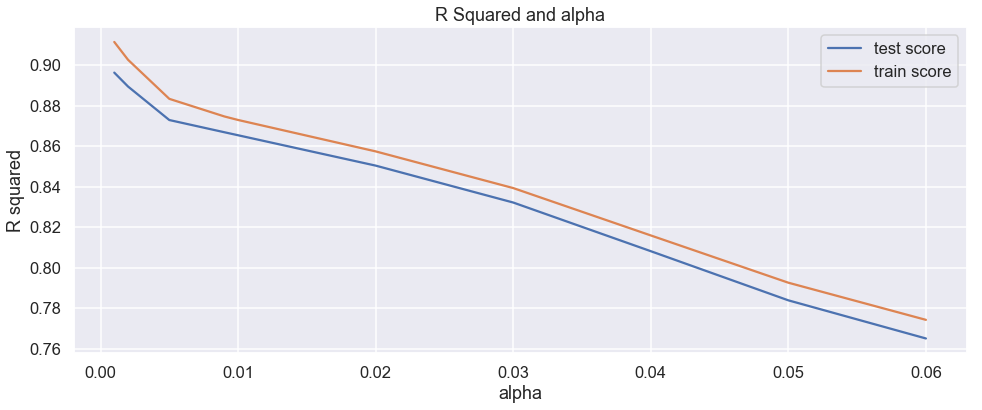

In [120]:
# plotting cv results
plt.figure(figsize=(16,6))
#cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
#plt.plot(mean_test_df)
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
#plt.plot(mean_train_df)
plt.xlabel('alpha')
plt.ylabel('R squared')
plt.title("R Squared and alpha")
plt.legend(['test score', 'train score'], loc='upper right')

<font size=3px color=green> We see here that the alpha paramater can be taken as 0.01, after which the values just plateaus out

In [121]:
### Set the alpha value to 0.01 | Start
alpha =0.01
### Set the alpha value to 0.01 | End

### Instantiate lasso with the set alpha value =0.3 | Start
lasso = Lasso(alpha=alpha)
### Instantiate lasso with the set alpha value =0.3 | End
        

### Fit the data into the lasso object | Start
lasso.fit(X_train_la, y_train) 
### Fit the data into the lasso object | End

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
lasso.coef_

array([ 0.03971119,  0.12602616,  0.05684561, -0.02100305,  0.06895384,
        0.12597657, -0.11108157,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00386433,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.  

In [123]:
## Get the columns along with the coeffs | Start
df_lasso = pd.DataFrame(X_train_la.columns,lasso.coef_).reset_index().rename(columns={0:'ColumnName','index':'Coeffs'})
df_lasso_final=df_lasso[df_lasso['Coeffs'] != 0]
df_lasso_final
## Get the columns along with the coeffs | End

Coeffs        ColumnName
0   0.039711           LotArea
1   0.126026       OverallQual
2   0.056846       OverallCond
3  -0.021003         BsmtUnfSF
4   0.068954       TotalBsmtSF
5   0.125977         GrLivArea
6  -0.111082         BuiltTime
42  0.003864  Foundation_PConc

In [124]:
colsMod

['LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BuiltTime',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition1_RRNn',
 'Condition2_PosA',
 'Condition2_RRAe',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Gambrel',
 'RoofStyle_Shed',
 'RoofMatl_Metal',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_Stone',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_Stone',
 'ExterCond_Po',
 'Foundation_PConc',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'BsmtFin

In [125]:
## Get the X_test modified as X_train columns | Start
X_test_la=X_test[colsMod]
## Get the X_test modified as X_train columns | End
X_test_la.head()

LotArea  OverallQual  OverallCond  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
13    0.424494     0.764325    -0.543824   2.087274     1.212255   0.074105   
1179 -0.268658    -0.768147    -0.543824  -1.222905    -2.635758  -0.753146   
1441 -1.438072    -0.001911    -0.543824  -0.888343    -0.451611  -1.370231   
1159 -0.033818    -0.001911     0.288517  -0.205923    -0.315102   0.928187   
173   0.288376    -0.001911    -0.543824   0.328049     0.872270  -0.221022   

      BuiltTime  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  \
13    -1.191931            0            0            1  ...   
1179   0.543209            0            0            1  ...   
1441  -1.125195            0            0            0  ...   
1159  -0.124153            0            0            1  ...   
173    0.309633            0            0            1  ...   

      GarageCond_Not Defined  GarageCond_Po  GarageCond_TA  PavedDrive_P  \
13                         0              0              1             0   
1179                       1              0              0             0   
1441                       0              0              1             0   
1159                       0              0              1             0   
173                        0              0              1             0   

      SaleType_CWD  SaleType_ConLD  SaleType_ConLw  SaleType_WD  \
13               0               0               0            0   
1179             0               0               0            1   
1441             0               0               0            1   
1159             0               0               0            1   
173              0               0               0            0   

      SaleCondition_Normal  SaleCondition_Partial  
13                       0                      1  
1179                     1                      0  
1441                     1                      0  
1159                     1                      0  
173                      1                      0  

[5 rows x 83 columns]

In [126]:
# predict prices of X_test
y_pred_1 = lasso.predict(X_test_la)
# predict prices of X_test

In [127]:
# evaluate the model on test set
r2 = met.r2_score(y_test, y_pred_1)
print(round(r2,2))

0.86


In [128]:
# Get the R2 for train and test data respectively | Start
R2_train = (lasso.score(X_train_la, y_train))
R2_test = (lasso.score(X_test_la,y_test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))
# Get the R2 for train and test data respectively | End

R squared for train data is: 0.873
R squared for test data is: 0.863


<center><h3>Observations after Lasso</h3><br><b>The R2 and adjusted R2 square values were as follows: 0.933 & 0.926 respectively before Lasso, because we have applied the regularization on technique using <b> Lasso </b> we have our R2 score as 0.87 for our Train Data and 0.863 for our test data, which is preety good. The following are the columns and the respective coefficients:<br>
    <table>
        <tr>
            <th bgcolor='grey'>Column Name</th>
            <th bgcolor='grey'>Coefficent</th>
        </tr>
        <tr>
            <td>LotArea</td>
            <td>0.039711</td>
        </tr>
        <tr>
            <td>OverallQual</td>
            <td>0.126026</td>
        </tr>
        <tr>
            <td>OverallCond</td>
            <td>0.056846</td>
        </tr>
        <tr>
            <td>BsmtUnfSF</td>
            <td>-0.021003</td>
        </tr>
        <tr>
            <td>TotalBsmtSF</td>
            <td>-0.021003</td>
        </tr>
        <tr>
            <td>GrLivArea</td>
            <td>0.125977</td>
        </tr>
        <tr>
            <td>BuiltTime</td>
            <td>0.125977</td>
        </tr>
        <tr>
            <td>Foundation_PConc</td>
            <td>0.003864</td>
        </tr>
    </table>
<br>
We have used the our lambda value as 0.01 and after Lasso we have received the following 
    <br> We will apply <b> Lasso </b> regularization technique to our data, in this approach and later we will see the same using <b> Ridge</b> </b></br>
</center>

### Residual Analysis after Lasso

In [129]:
## Get the RMSE for train and test data respectively | Start
RMSE_train = sqrt(np.mean((y_train - lasso.predict(X_train_la))**2))
RMSE_test = sqrt(np.mean((y_test - lasso.predict(X_test_la))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))
## Get the RMSE for train and test data respectively | End

Root mean squared error for train data is: 0.132
Root mean sqaured error for test data is: 0.140


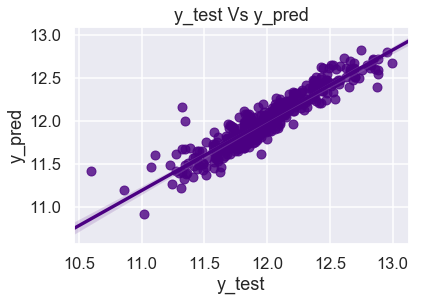

In [130]:
### **** Plot the y_test vs y_pred ***** | Start
area = np.pi*3
sns.regplot(x=y_test, y=y_pred_1,color='indigo')
plt.title('y_test Vs y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.show()
### **** Plot the y_test vs y_pred ***** | End

Text(0, 0.5, 'Residuals')

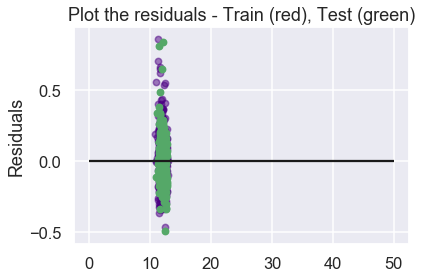

In [131]:
### ****** Plot the residuals - Train (red), Test (green) | Start *******
plt.scatter(lasso.predict(X_train_la), lasso.predict(X_train_la) - y_train, c='indigo', s=40, alpha=0.5)
plt.scatter(lasso.predict(X_test_la), lasso.predict(X_test_la) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Plot the residuals - Train (red), Test (green)')
plt.ylabel('Residuals')
### ****** Plot the residuals - Train (red), Test (green) | End *******

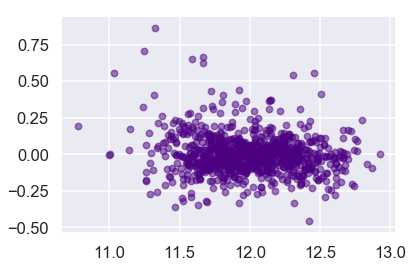

In [132]:
## Plot the train data graph | Start
plt.scatter(lasso.predict(X_train_la), lasso.predict(X_train_la) - y_train, c='indigo', s=40, alpha=0.5)
## Plot the train data graph | End

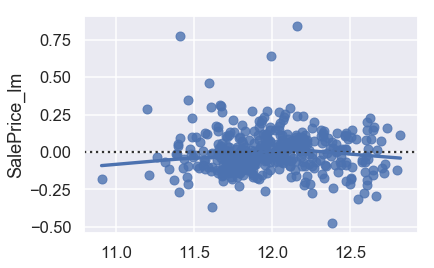

In [133]:
## Plot the test data graph | Start
sns.residplot(lasso.predict(X_test_la), lasso.predict(X_test_la) - y_test,lowess=True)
## Plot the test data graph | End

Text(0, 0.5, 'Index')

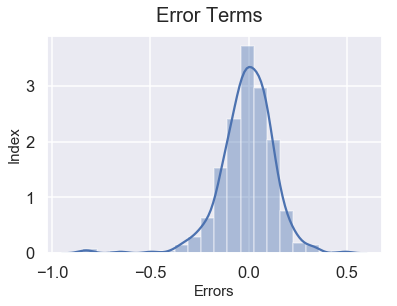

In [134]:
#### ****** Plot the residuals | Start *******
fig = plt.figure()
sns.distplot((y_test - y_pred_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Index', fontsize = 15)
#### ****** Plot the residuals | End *******

<center> <b> From the residual analysis we can observe that the Root mean squared error for train data is: 0.132
and test data is  0.140 respectively, which is almost same. Also the residuals show almost same formation for both the datasets.</b></center>

<center><h2> Observations after Lasso </h2><br>
    We have used alpha value as 0.01 which gave us an accuracy score of 0.87 for our Train Data and 0.863 for our test data, which is preety good. We have used the GridSearchCV to arrive at the alpha score. We have started with 100 features and after Lasso we have got our final 7 features. The model is now built with less features which is able to explain around 87% of the data and we also checked that we have low RMSE and the difference between Train and Test RMSE is minimal.Thus we can say that our model. We can conclude that oir model now is simple and robust

#### 4.4.3. Approach 3 - Multiple Linear Regression, Ridge using Cross Validation

In [135]:
print(X_train_la.columns)
print(len(X_train_la.columns))

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'BuiltTime', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Pave', 'LandSlope_Sev', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_RRAe', 'Condition1_RRNn', 'Condition2_PosA',
       'Condition2_RRAe', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Shed',
       'RoofMatl_Metal', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_Stone',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Sdng', 'MasVnrType_Stone',
       'ExterCond_Po', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_

In [136]:
## ****** Define the alpha values | Start ******
params = {'alpha': [0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
## ****** Define the alpha values | End ******

## ****** Define the cross validation with ridge | Start ******
ridge = Ridge()

model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
## ****** Define the cross validation with ridge | End ******


## ****** Fit the data into the model | Start ******
model_cv_ridge.fit(X_train_la, y_train) 
## ****** Fit the data into the model | End ******

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [137]:
## Getting the results for alpha values less than 200 | Start
cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()
## Getting the results for alpha values less than 200 | End

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003367      0.001531         0.001431        0.000730        0.05   
1       0.002147      0.000063         0.000839        0.000033         0.1   
2       0.002482      0.000312         0.000981        0.000157         0.2   
3       0.002156      0.000055         0.000840        0.000044         0.3   
4       0.002164      0.000056         0.000891        0.000141         0.4   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.05}           0.906464           0.877068           0.879290   
1   {'alpha': 0.1}           0.906167           0.878298           0.880006   
2   {'alpha': 0.2}           0.905362           0.880295           0.881293   
3   {'alpha': 0.3}           0.904514           0.881834           0.882409   
4   {'alpha': 0.4}           0.903712           0.883043           0.883382   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.883137  ...         0.891011        0.013874               22   
1           0.884672  ...         0.893249        0.015573               20   
2           0.886858  ...         0.895795        0.017268               19   
3           0.888349  ...         0.897178        0.017840               18   
4           0.889439  ...         0.898035        0.017962               16   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.932453            0.937657            0.935270   
1            0.932278            0.937477            0.935182   
2            0.931852            0.936986            0.934909   
3            0.931424            0.936431            0.934564   
4            0.931026            0.935867            0.934188   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.938125            0.931283          0.934957         0.002727  
1            0.937940            0.930711          0.934718         0.002836  
2            0.937436            0.929470          0.934130         0.003053  
3            0.936872            0.928348          0.933528         0.003223  
4            0.936309            0.927379          0.932954         0.003349  

[5 rows x 21 columns]

In [138]:
## ***** For the sake of simple interpretation, created separate dataframe with mean score with alpha | Start
mean_train_df=cv_results[["mean_train_score","param_alpha"]]
mean_test_df=cv_results[["mean_test_score","param_alpha"]]
## ***** For the sake of simple interpretation, created separate dataframe with mean score with alpha | End

In [139]:
mean_train_df

mean_train_score param_alpha
0           0.934957        0.05
1           0.934718         0.1
2           0.934130         0.2
3           0.933528         0.3
4           0.932954         0.4
5           0.932418         0.5
6           0.931919         0.6
7           0.931456         0.7
8           0.931024         0.8
9           0.930621         0.9
10          0.930244           1
11          0.927407           2
12          0.925508           3
13          0.924061           4
14          0.922875           5
15          0.921858           6
16          0.920961           7
17          0.920153           8
18          0.919415           9
19          0.918732          10
20          0.913635          20
21          0.904945          50
22          0.896046         100

In [140]:
mean_test_df

mean_test_score param_alpha
0          0.891011        0.05
1          0.893249         0.1
2          0.895795         0.2
3          0.897178         0.3
4          0.898035         0.4
5          0.898614         0.5
6          0.899031         0.6
7          0.899345         0.7
8          0.899590         0.8
9          0.899786         0.9
10         0.899946           1
11         0.900697           2
12         0.900915           3
13         0.900959           4
14         0.900911           5
15         0.900808           6
16         0.900669           7
17         0.900504           8
18         0.900321           9
19         0.900126          10
20         0.897991          20
21         0.892594          50
22         0.885846         100

<font size=3px color=green> We have seen that the with the increase of the lambda the mean score reduces which is understandable also, because we are regularizing the model by addong the lambda to our model and thus the error increases and predictability decreases.

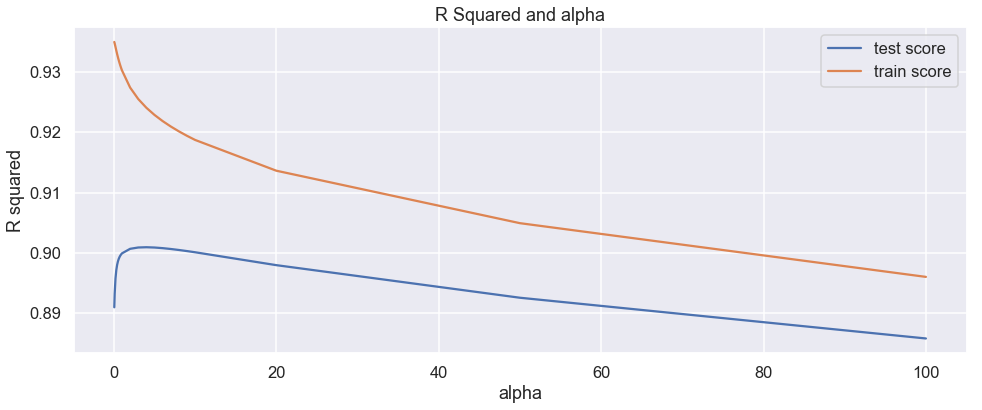

In [141]:
# plotting cv results
plt.figure(figsize=(16,6))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(mean_test_df["param_alpha"], cv_results["mean_test_score"])
#plt.plot(mean_test_df)
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
#plt.plot(mean_train_df)
plt.xlabel('alpha')
plt.ylabel('R squared')
plt.title("R Squared and alpha")
plt.legend(['test score', 'train score'], loc='upper right')

We use the alphas as 10 for our case

In [142]:
### Set the alpha value to 0.1 | Start
alpha =10
### Set the alpha value to 0.1 | End

### Instantiate ridge with the set alpha value =0.3 | Start
ridge = Ridge(alpha=alpha)
### Instantiate ridge with the set alpha value =0.3 | End
        

### Fit the data into the ridge object | Start
ridge.fit(X_train_la, y_train) 
### Fit the data into the ridge object | End

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [143]:
ridge.coef_

array([ 0.03509379,  0.08385098,  0.05901451, -0.03579783,  0.07497297,
        0.13605085, -0.08210865,  0.07993412,  0.02440599,  0.05663621,
        0.00081596,  0.03744583, -0.00887115, -0.03728169,  0.08761078,
       -0.03166216, -0.05990695,  0.04160864,  0.04568363,  0.03203925,
       -0.05242649,  0.01609398,  0.        , -0.01344187, -0.03846695,
        0.00666694,  0.02861595,  0.01855086, -0.01113745,  0.00809274,
        0.        , -0.04331904,  0.05756012, -0.00491167, -0.01195492,
       -0.02643513,  0.00844988,  0.00953249,  0.03997393,  0.035389  ,
        0.02182113,  0.        ,  0.04964622,  0.00570086,  0.        ,
       -0.03083103, -0.03758433, -0.0469325 , -0.00757047,  0.03984478,
        0.01470225,  0.00498461, -0.01233105,  0.03050099, -0.02731401,
        0.00153611,  0.00407805,  0.07568952, -0.00936683,  0.        ,
       -0.05799019, -0.03680762, -0.05909887, -0.03477884, -0.03463126,
       -0.03600052,  0.05094675, -0.0038294 ,  0.03198971, -0.00

In [144]:
## Get the columns along with the coeffs | Start
df_ridge = pd.DataFrame(X_train_la.columns,ridge.coef_).reset_index().rename(columns={0:'ColumnName','index':'Coeffs'})
df_ridge_final=df_ridge[df_ridge['Coeffs'] != 0]
df_ridge_final
## Get the columns along with the coeffs | End

Coeffs              ColumnName
0   0.035094                 LotArea
1   0.083851             OverallQual
2   0.059015             OverallCond
3  -0.035798               BsmtUnfSF
4   0.074973             TotalBsmtSF
5   0.136051               GrLivArea
6  -0.082109               BuiltTime
7   0.079934             MSZoning_FV
8   0.024406             MSZoning_RH
9   0.056636             MSZoning_RL
10  0.000816             MSZoning_RM
11  0.037446             Street_Pave
12 -0.008871           LandSlope_Sev
13 -0.037282     Neighborhood_BrDale
14  0.087611    Neighborhood_Crawfor
15 -0.031662    Neighborhood_Edwards
16 -0.059907    Neighborhood_MeadowV
17  0.041609    Neighborhood_NridgHt
18  0.045684    Neighborhood_StoneBr
19  0.032039         Condition1_Norm
20 -0.052426         Condition1_RRAe
21  0.016094         Condition1_RRNn
23 -0.013442         Condition2_RRAe
24 -0.038467       HouseStyle_2.5Fin
25  0.006667       HouseStyle_2.5Unf
26  0.028616         HouseStyle_SLvl
27  0.018551       RoofStyle_Gambrel
28 -0.011137          RoofStyle_Shed
29  0.008093          RoofMatl_Metal
31 -0.043319     Exterior1st_BrkComm
..       ...                     ...
52 -0.012331        BsmtFinType2_Rec
53  0.030501        BsmtFinType2_Unf
54 -0.027314            Heating_Grav
55  0.001536            Heating_OthW
56  0.004078            HeatingQC_Po
57  0.075690            CentralAir_Y
58 -0.009367        Electrical_FuseF
60 -0.057990          KitchenQual_Fa
61 -0.036808          KitchenQual_Gd
62 -0.059099          KitchenQual_TA
63 -0.034779         Functional_Maj2
64 -0.034631          Functional_Mod
65 -0.036001          Functional_Sev
66  0.050947          Functional_Typ
67 -0.003829      GarageType_BuiltIn
68  0.031990           GarageQual_Gd
69 -0.007795           GarageQual_Po
70  0.014615           GarageQual_TA
71 -0.005517           GarageCond_Fa
72  0.020768           GarageCond_Gd
73 -0.057801  GarageCond_Not Defined
74  0.011920           GarageCond_Po
75  0.009662           GarageCond_TA
76 -0.025681            PavedDrive_P
77  0.003694            SaleType_CWD
78  0.030122          SaleType_ConLD
79  0.017066          SaleType_ConLw
80  0.002003             SaleType_WD
81  0.072127    SaleCondition_Normal
82  0.101130   SaleCondition_Partial

[78 rows x 2 columns]

In [145]:
colsMod

['LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BuiltTime',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_MeadowV',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition1_RRNn',
 'Condition2_PosA',
 'Condition2_RRAe',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Gambrel',
 'RoofStyle_Shed',
 'RoofMatl_Metal',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_Stone',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_CmentBd',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_Stone',
 'ExterCond_Po',
 'Foundation_PConc',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'BsmtFin

In [146]:
## Get the X_test modified as X_train columns | Start
X_test_ra=X_test[colsMod]
## Get the X_test modified as X_train columns | End
X_test_la.head()

LotArea  OverallQual  OverallCond  BsmtUnfSF  TotalBsmtSF  GrLivArea  \
13    0.424494     0.764325    -0.543824   2.087274     1.212255   0.074105   
1179 -0.268658    -0.768147    -0.543824  -1.222905    -2.635758  -0.753146   
1441 -1.438072    -0.001911    -0.543824  -0.888343    -0.451611  -1.370231   
1159 -0.033818    -0.001911     0.288517  -0.205923    -0.315102   0.928187   
173   0.288376    -0.001911    -0.543824   0.328049     0.872270  -0.221022   

      BuiltTime  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  \
13    -1.191931            0            0            1  ...   
1179   0.543209            0            0            1  ...   
1441  -1.125195            0            0            0  ...   
1159  -0.124153            0            0            1  ...   
173    0.309633            0            0            1  ...   

      GarageCond_Not Defined  GarageCond_Po  GarageCond_TA  PavedDrive_P  \
13                         0              0              1             0   
1179                       1              0              0             0   
1441                       0              0              1             0   
1159                       0              0              1             0   
173                        0              0              1             0   

      SaleType_CWD  SaleType_ConLD  SaleType_ConLw  SaleType_WD  \
13               0               0               0            0   
1179             0               0               0            1   
1441             0               0               0            1   
1159             0               0               0            1   
173              0               0               0            0   

      SaleCondition_Normal  SaleCondition_Partial  
13                       0                      1  
1179                     1                      0  
1441                     1                      0  
1159                     1                      0  
173                      1                      0  

[5 rows x 83 columns]

In [147]:
# predict prices of X_test
y_pred_2 = lasso.predict(X_test_ra)
# predict prices of X_test

In [148]:
y_pred_2

array([12.25654464, 11.53925498, 11.84441545, 12.11705999, 11.96023973,
       12.08053037, 12.10515593, 11.72492278, 11.73530059, 11.40437709,
       11.68823446, 12.2268184 , 11.40063422, 11.85358458, 12.47316018,
       11.82377252, 12.07089915, 12.02245194, 11.86967785, 11.51151908,
       11.37317418, 12.04896667, 11.99622986, 11.80280405, 11.81758422,
       11.87658398, 11.89546949, 11.64901975, 12.27005861, 12.41223576,
       11.82540223, 12.04786029, 11.94786299, 12.03899447, 12.43641545,
       11.65158622, 10.90897899, 11.93406679, 11.95947723, 12.60629116,
       11.96040765, 12.02180961, 12.38416089, 11.79039451, 12.06605397,
       12.14891083, 11.73293669, 11.46125039, 12.14470602, 11.5695348 ,
       11.8373138 , 11.59788995, 11.78623419, 11.8836326 , 11.82612859,
       12.19669537, 12.1724857 , 12.0791892 , 12.51069732, 12.53993577,
       12.5796278 , 12.59917253, 11.60673439, 12.13447165, 11.98440461,
       12.35833234, 11.97696429, 12.2022551 , 11.85333342, 12.11

In [149]:
# Get the R2 for train and test data respectively | Start
R2_train_ridge = (ridge.score(X_train_la, y_train))
R2_test_ridge = (ridge.score(X_test_ra,y_test))
print('R squared for train data is: %.3f' %(R2_train_ridge))
print('R squared for test data is: %.3f' %(R2_test_ridge))
# Get the R2 for train and test data respectively | End

R squared for train data is: 0.919
R squared for test data is: 0.902


### Residual Analysis after Ridge

In [150]:
## Get the RMSE for train and test data respectively | Start
RMSE_train = sqrt(np.mean((y_train - ridge.predict(X_train_la))**2))
RMSE_test = sqrt(np.mean((y_test - ridge.predict(X_test_ra))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))
## Get the RMSE for train and test data respectively | End

Root mean squared error for train data is: 0.106
Root mean sqaured error for test data is: 0.119


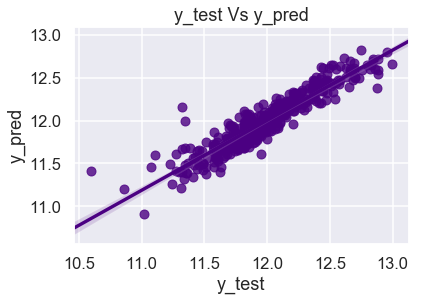

In [151]:
### **** Plot the y_test vs y_pred ***** | Start
area = np.pi*3
sns.regplot(x=y_test, y=y_pred_2,color='indigo')
plt.title('y_test Vs y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.show()
### **** Plot the y_test vs y_pred ***** | End

Text(0, 0.5, 'Residuals')

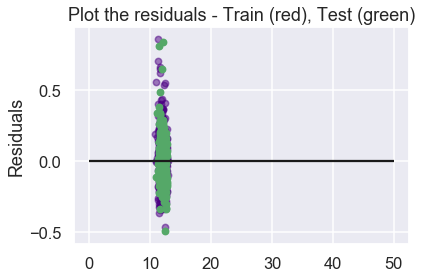

In [152]:
### ****** Plot the residuals - Train (red), Test (green) | Start *******
plt.scatter(lasso.predict(X_train_la), lasso.predict(X_train_la) - y_train, c='indigo', s=40, alpha=0.5)
plt.scatter(lasso.predict(X_test_ra), lasso.predict(X_test_ra) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Plot the residuals - Train (red), Test (green)')
plt.ylabel('Residuals')
### ****** Plot the residuals - Train (red), Test (green) | End *******

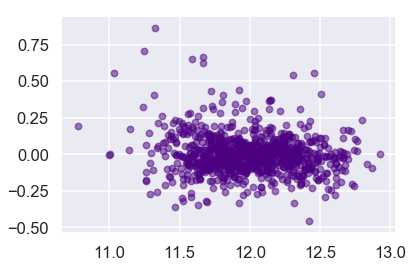

In [153]:
## Plot the train data graph | Start
plt.scatter(lasso.predict(X_train_la), lasso.predict(X_train_la) - y_train, c='indigo', s=40, alpha=0.5)
## Plot the train data graph | End


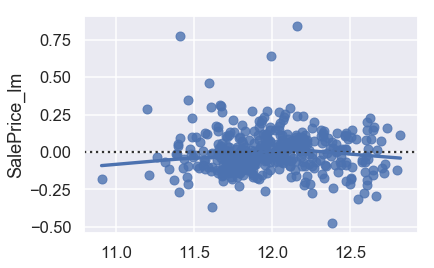

In [154]:
## Plot the test data graph | Start
sns.residplot(lasso.predict(X_test_ra), lasso.predict(X_test_ra) - y_test,lowess=True)
## Plot the test data graph | End

Text(0, 0.5, 'Index')

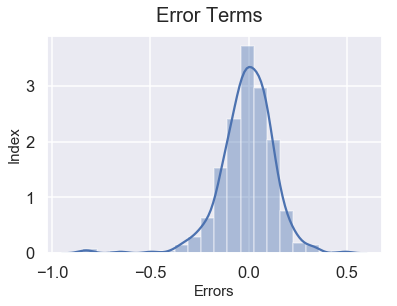

In [155]:
#### ****** Plot the residuals | Start *******
fig = plt.figure()
sns.distplot((y_test - y_pred_2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 15)
plt.ylabel('Index', fontsize = 15)
#### ****** Plot the residuals | End *******

<center><h3>Observations after Ridge</h3><br>The R2 and adjusted R2 square values were as follows: 0.933 & 0.926 respectively before Ridge, because we have applied the regularization on technique using <b> Ridge </b> we have our <b> R2 score as 0.919 for Train Data and 0.902 for Test Data </b> which is preety good. The following are the columns and the respective coefficients.<br>
    We also plotted the Train and Test data and found that they predicted values are preety close to actual values and we also have seen <b> Root mean squared error for train data is: 0.106 and 0.119 for test data </b>, which seems preety good as well after applying regularization on the data.
</center>

In [156]:
df_ridge_final

Coeffs              ColumnName
0   0.035094                 LotArea
1   0.083851             OverallQual
2   0.059015             OverallCond
3  -0.035798               BsmtUnfSF
4   0.074973             TotalBsmtSF
5   0.136051               GrLivArea
6  -0.082109               BuiltTime
7   0.079934             MSZoning_FV
8   0.024406             MSZoning_RH
9   0.056636             MSZoning_RL
10  0.000816             MSZoning_RM
11  0.037446             Street_Pave
12 -0.008871           LandSlope_Sev
13 -0.037282     Neighborhood_BrDale
14  0.087611    Neighborhood_Crawfor
15 -0.031662    Neighborhood_Edwards
16 -0.059907    Neighborhood_MeadowV
17  0.041609    Neighborhood_NridgHt
18  0.045684    Neighborhood_StoneBr
19  0.032039         Condition1_Norm
20 -0.052426         Condition1_RRAe
21  0.016094         Condition1_RRNn
23 -0.013442         Condition2_RRAe
24 -0.038467       HouseStyle_2.5Fin
25  0.006667       HouseStyle_2.5Unf
26  0.028616         HouseStyle_SLvl
27  0.018551       RoofStyle_Gambrel
28 -0.011137          RoofStyle_Shed
29  0.008093          RoofMatl_Metal
31 -0.043319     Exterior1st_BrkComm
..       ...                     ...
52 -0.012331        BsmtFinType2_Rec
53  0.030501        BsmtFinType2_Unf
54 -0.027314            Heating_Grav
55  0.001536            Heating_OthW
56  0.004078            HeatingQC_Po
57  0.075690            CentralAir_Y
58 -0.009367        Electrical_FuseF
60 -0.057990          KitchenQual_Fa
61 -0.036808          KitchenQual_Gd
62 -0.059099          KitchenQual_TA
63 -0.034779         Functional_Maj2
64 -0.034631          Functional_Mod
65 -0.036001          Functional_Sev
66  0.050947          Functional_Typ
67 -0.003829      GarageType_BuiltIn
68  0.031990           GarageQual_Gd
69 -0.007795           GarageQual_Po
70  0.014615           GarageQual_TA
71 -0.005517           GarageCond_Fa
72  0.020768           GarageCond_Gd
73 -0.057801  GarageCond_Not Defined
74  0.011920           GarageCond_Po
75  0.009662           GarageCond_TA
76 -0.025681            PavedDrive_P
77  0.003694            SaleType_CWD
78  0.030122          SaleType_ConLD
79  0.017066          SaleType_ConLw
80  0.002003             SaleType_WD
81  0.072127    SaleCondition_Normal
82  0.101130   SaleCondition_Partial

[78 rows x 2 columns]

<center>
We have used the our lambda value as 10 and after Ridge we have received the above columns </center>


In [157]:
## Get the columns after ridge regularization | Start
ridgeCols=list(df_ridge_final.ColumnName)
## Get the columns after ridge regularization | End

#### But now also we do not have the columns for our model, we can use RFE to arrive at the final features for the model using Ridge

In [158]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
4          60         84.0    14260            8            5       350.0   
5          50         85.0    14115            5            5         0.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  ...  SaleType_ConLw  \
0           0        150          856       854  ...               0   
1           0        284         1262         0  ...               0   
2           0        434          920       866  ...               0   
4           0        490         1145      1053  ...               0   
5           0         64          796       566  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
4             0             0            1                      0   
5             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
4                     0                     0                     1   
5                     0                     0                     1   

   SaleCondition_Partial  Remodelled_Yes  
0                      0               0  
1                      0               0  
2                      0               1  
4                      0               0  
5                      0               1  

[5 rows x 229 columns]

In [159]:
## The columns in column lists selected by Ridge those are Numerical, not dummies | Start
numColsRidge=['LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BuiltTime']
## The columns in column lists selected by Ridge those are Numerical, not dummies | End

In [160]:

### ****** Building the model using rfe | Start ******
X = df_dummy.drop(["SalePrice_lm",'Id'], axis=1)
X=X[ridgeCols]
y = df_dummy["SalePrice_lm"]

## Create Test Train Split | Start
X_train_new,X_test_new,y_train_new, y_test_new = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
## Create Test Train Split | End


## Scaling the datasets | Start
std = StandardScaler()

temp = ["SalePrice_lm",'Id']



X_train_new[numColsRidge] = std.fit_transform(X_train_new[numColsRidge])
X_test_new[numColsRidge] = std.fit_transform(X_test_new[numColsRidge])

## Scaling the datasets | End


In [161]:

#params = {'alpha': [1,2,5,7,10,13,15,20,30]}

## ****** Define the alpha values | Start ******
hyperparam = [{'n_features_to_select':list(range(10,50))}]
## ****** Define the alpha values | End ******

folds = KFold(n_splits = 5, random_state=100, shuffle=True)


lm_2 = LinearRegression()
lm_2.fit(X_train_new, y_train_new)
rfe_2 = RFE(lm_2)

gridCV_2 = GridSearchCV(estimator=rfe_2,
                     param_grid = hyperparam,
                     scoring='r2',
                     cv=folds,
                     verbose=1,
                     return_train_score=True)
gridCV_2.fit(X_train_new,y_train_new)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   13.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [162]:
modelCV_results_2=pd.DataFrame(gridCV_2.cv_results_)
modelCV_results_2.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.082322      0.005430         0.000972        0.000030   
1       0.075955      0.000699         0.000944        0.000002   
2       0.076446      0.000714         0.000989        0.000046   
3       0.099737      0.016158         0.001179        0.000011   
4       0.089068      0.016768         0.001114        0.000174   

  param_n_features_to_select                        params  split0_test_score  \
0                         10  {'n_features_to_select': 10}           0.634914   
1                         11  {'n_features_to_select': 11}           0.632648   
2                         12  {'n_features_to_select': 12}           0.632632   
3                         13  {'n_features_to_select': 13}           0.661745   
4                         14  {'n_features_to_select': 14}           0.667824   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.448106           0.459111           0.123103  ...   
1           0.472960           0.459018           0.404454  ...   
2           0.454430           0.445903           0.435886  ...   
3           0.454885           0.474501           0.435679  ...   
4           0.453905           0.474267           0.466090  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.420781        0.165620               40            0.732087   
1         0.481618        0.079004               39            0.736840   
2         0.491641        0.072797               38            0.737426   
3         0.515185        0.082809               37            0.759723   
4         0.522259        0.080105               36            0.763198   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.491091            0.540584            0.272197   
1            0.529235            0.541489            0.515001   
2            0.568249            0.545908            0.551858   
3            0.569191            0.577579            0.552798   
4            0.570533            0.578095            0.580276   

   split4_train_score  mean_train_score  std_train_score  
0            0.500147          0.507221         0.146441  
1            0.501184          0.564750         0.087101  
2            0.531120          0.586912         0.076191  
3            0.559680          0.603794         0.078416  
4            0.561024          0.610625         0.076584  

[5 rows x 21 columns]

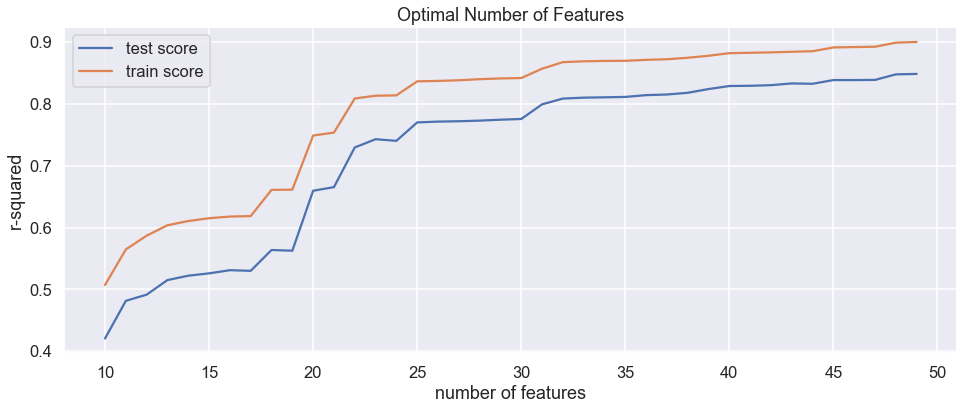

In [163]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(modelCV_results_2["param_n_features_to_select"], modelCV_results_2["mean_test_score"])
plt.plot(modelCV_results_2["param_n_features_to_select"], modelCV_results_2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

We choose optimal number of features as 35

In [164]:
rfe_3 = RFE(lm_2, n_features_to_select=35)             
rfe_3 = rfe_3.fit(X_train_new, y_train_new)
# ****** Lets build our final model | End *******
## ***** Get the columns and the ranks, create a dataframe | Start ******
rfeCols1=pd.DataFrame(list(zip(X_train_new.columns,rfe_3.ranking_,lm_2.coef_,rfe_3.support_)))
## ***** Get the columns and the ranks, create a dataframe | End ******

rfeCols1=rfeCols1.rename(columns={0:'Column',1:'Rank',2:'Coeffs',3:'Strength'})

# predict prices of X_test
y_pred_3 = rfe_3.predict(X_test_new)

# evaluate the model on test set
r2 = met.r2_score(y_test_new, y_pred_3)
print(round(r2,2))

0.79


In [165]:
len(rfeCols1[rfeCols1.Strength == True])

35

In [166]:
### Set of columns selected by Ridge ####
rfeCols1[rfeCols1.Strength == True]
### Set of columns selected by Ridge ####

Column  Rank    Coeffs  Strength
1              OverallQual     1  0.061337      True
5                GrLivArea     1  0.142301      True
7              MSZoning_FV     1  0.434792      True
8              MSZoning_RH     1  0.376582      True
9              MSZoning_RL     1  0.388835      True
10             MSZoning_RM     1  0.341155      True
12           LandSlope_Sev     1 -0.153796      True
13     Neighborhood_BrDale     1 -0.086330      True
14    Neighborhood_Crawfor     1  0.115958      True
22         Condition2_RRAe     1 -0.377126      True
23       HouseStyle_2.5Fin     1 -0.129452      True
24       HouseStyle_2.5Unf     1  0.144644      True
27          RoofStyle_Shed     1  0.172678      True
28          RoofMatl_Metal     1  0.229572      True
29     Exterior1st_BrkComm     1 -0.474847      True
31      Exterior1st_CBlock     1 -0.096282      True
40        Foundation_Stone     1  0.166121      True
44             BsmtCond_Po     1 -0.264448      True
45         BsmtExposure_Gd     1  0.044104      True
50            Heating_Grav     1 -0.299494      True
53            CentralAir_Y     1  0.088273      True
55          KitchenQual_Fa     1 -0.108956      True
56          KitchenQual_Gd     1 -0.085943      True
57          KitchenQual_TA     1 -0.115022      True
58         Functional_Maj2     1 -0.153795      True
60          Functional_Sev     1 -0.459443      True
63           GarageQual_Gd     1  0.098336      True
64           GarageQual_Po     1 -0.349102      True
66           GarageCond_Fa     1 -0.146827      True
67           GarageCond_Gd     1 -0.081870      True
68  GarageCond_Not Defined     1 -0.158905      True
69           GarageCond_Po     1  0.490433      True
70           GarageCond_TA     1 -0.109486      True
71            PavedDrive_P     1 -0.066321      True
74          SaleType_ConLw     1  0.204321      True

In [167]:
## Get the RMSE for train and test data respectively | Start
RMSE_train = sqrt(np.mean((y_train_new - rfe_3.predict(X_train_new))**2))
RMSE_test = sqrt(np.mean((y_test_new - y_pred_3)**2))
#RMSE_test = sqrt(np.mean((y_test_new - y_pred_3)**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))
## Get the RMSE for train and test data respectively | End

Root mean squared error for train data is: 0.136
Root mean sqaured error for test data is: 0.175


In [168]:
# Get the R2 for train and test data respectively | Start
R2_train = (rfe_3.score(X_train_new, y_train))
R2_test = (rfe_3.score(X_test_new,y_test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))
# Get the R2 for train and test data respectively | End

R squared for train data is: 0.866
R squared for test data is: 0.788


<b> We can see from the above observations that our prediction using 35 features is quite good as far as test data prediction goes. The R2 for the test data came out to be 0.79 (rounded) and we achieved our prediction score as 0.79, which is equal. The RMSE is 0.175 compared to 0.13 for the train data, which is also very muchj the same. So the model turned out to be a good fit

<center><h2>Final Observation</h2><br> 
<table>
    <tr>
        <th bgcolor='grey'>Sl No.</th>
        <th bgcolor='grey'>Approach</th>
        <th bgcolor='grey'>RMSE Train</th>
        <th bgcolor='grey'>RMSE Test</th>
        <th bgcolor='grey'>R2 Train</th>
        <th bgcolor='grey'>R2 Test</th>
        <th bgcolor='grey'>Prediction Score</th>
        <th bgcolor='grey'>Lambda</th>
        <th bgcolor='grey'>No of Optimal Features</th>
    </tr>
    <tr>
        <td>1.</td>
        <td>Multiple Linear Regression with CV</td>
        <td>0.118</td>
        <td>0.131</td>
        <td>0.898</td>
        <td>0.880</td>
        <td>0.88</td>
        <td>NA</td>
        <td>12</td>
    </tr>
    <tr>
        <td>2.</td>
        <td>Multiple Linear Regression, Lasso using CV</td>
        <td>0.132</td>
        <td>0.140</td>
        <td>0.87</td>
        <td>0.863</td>
        <td>0.86</td>
        <td>0.01</td>
        <td>8</td>
    </tr>
    <tr>
        <td>2.</td>
        <td>Multiple Linear Regression, Ridge using CV</td>
        <td>0.136</td>
        <td>0.175</td>
        <td>0.866</td>
        <td>0.788</td>
        <td>0.79</td>
        <td>10</td>
        <td>35</td>
    </tr>
</table>
<br>
    From the above table we can see that the approach with Lasso is the most suitable as the approach not only introduced the regularization into our model to generalize it, which helped us to select the features from all the set of features and also handled the overfitting well enough by having a lambda of 0.01. The model R2 score and the RMSE was well captured and was in line with the RMSE and R2 of the dataset. The Lasso helped to select the necessary features and remove the unnecessary features thus also redeuced the model complexity by selecting 8 features from set features. 
    <br><br> <b> The set of the features to predict the Sale Price of the house are as follows: </b><br><br>
    <table>
        <tr>
            <th bgcolor='grey'>Column Name</th>
            <th bgcolor='grey'>Coefficent</th>
        </tr>
        <tr>
            <td>LotArea</td>
            <td>0.039711</td>
        </tr>
        <tr>
            <td>OverallQual</td>
            <td>0.126026</td>
        </tr>
        <tr>
            <td>OverallCond</td>
            <td>0.056846</td>
        </tr>
        <tr>
            <td>BsmtUnfSF</td>
            <td>-0.021003</td>
        </tr>
        <tr>
            <td>TotalBsmtSF</td>
            <td>-0.021003</td>
        </tr>
        <tr>
            <td>GrLivArea</td>
            <td>0.125977</td>
        </tr>
        <tr>
            <td>BuiltTime</td>
            <td>0.125977</td>
        </tr>
        <tr>
            <td>Foundation_PConc</td>
            <td>0.003864</td>
        </tr>
    </table>
</center>